In [1]:
import xmltodict
import json
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
import json

# Y- >Divide the axis by 200, put label ((such as prportion of simulation) 

# X -> state of the top goal 

# Make label for the top row 

 

# Make a new plot, split result by completion (ex t0 and t1 of each file side by side, has gm and doesn’t have gm) 


In [2]:
def df_to_dict(df):
    if df.ndim == 1:
        return df.to_dict()

    ret = {}
    for key in df.index.get_level_values(0):
        
        sub_df = df.xs(key)
        ret[key + 1] = df_to_dict(sub_df)
    return ret

In [3]:
path = os.path.expanduser("E:/Downloads/tree_loc.csv")

data = pd.read_csv(path,engine='python')
data.rename(columns={'ï»¿above00':'above00'}, inplace=True)
tree_loc = df_to_dict(data)


In [4]:
def process_states(obj, states):
    for state in states:
        if state['@name'] == 'completed':
            obj['completed'].append(state['@value'])
        elif state['@name'] == 'pending':
            obj['pending'].append(state['@value'])
        elif state['@name'] == 'active':
            obj['active'].append(state['@value'])

In [63]:
def process_steps(obj, steps):
#     obj['max_steps'].append(steps['Max']['@value'])
#     obj['min_steps'].append(steps['Min']['@value'])
    obj['avg_steps'].append(steps['Average']['@value'])

In [6]:
def get_file_name(num):
    if(num > 9):
        return 'forest-0' + str(num)
    else:
        return 'forest-00' + str(num)

In [66]:
def create_dataset(starting_path,stochastic_num, xml_ending, algo):
    summary = {
        'forest_name': [],
        'goal_name': [],
        'stochasticity':[],
        'algo':[],
        'completed':[],
        'pending':[],
        'active':[],
#         'max_steps':[],
#         'min_steps':[],
        'avg_steps':[]
    }
    
    for i in range(1, 31):
        
        file_name = get_file_name(i)
        
        try:
#             print(starting_path +  "/forests/" + file_name + \
#                                       "/perfMeasures-config-"+ algo +"-" + file_name +".xml.xml-"+ xml_ending + ".xml")
# #             E:\Downloads\experiment-trees-00-results\00-above3\forests
# 'E:/Downloads/manual-trees/forests-fifo-new/new2Roots1-2Goals-
            
            path = os.path.expanduser(starting_path + "/forests/" + file_name + \
                                      "/perfMeasures-config-"+ algo +"-" + file_name +".xml.xml-"+ xml_ending + ".xml")
            with open(path) as fd:
                tree = xmltodict.parse(fd.read())
        except:
            continue
        goals = tree['PerformanceReport']['GoalMeasures']['Goal']
        
        if(not isinstance(goals, list)):
            states = goals['State']
#             steps = goals['Steps']


            process_states(summary, states)
            process_steps(summary, steps)

            summary['forest_name'].append(file_name)
            summary['goal_name'].append(goals['@name'])
            summary['stochasticity'].append(stochastic_num)
            summary['algo'].append(algo)
        else:
            for goal in goals:
                states = goal['State']
                steps = goal['Steps']

                process_states(summary, states)
                process_steps(summary, steps)

                summary['forest_name'].append(file_name)
                summary['goal_name'].append(goal['@name'])
                summary['stochasticity'].append(stochastic_num)
                summary['algo'].append(algo)
        
    df = pd.DataFrame(summary, columns=summary.keys())

    return df


In [67]:
def plot_status(df, title):
    df = df[['completed', 'pending', 'active']]
    ax = df.astype(float).mean().plot(kind='bar', title=title)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))
    

In [68]:
def get_failed_by_retries(row):
    calculated_attempt = int(row['completed']) + int(row['pending']) + int(row['active'])
    return 200 - calculated_attempt
  


In [69]:
def apply_column(df):
    df['failed_by_retries'] = df.apply (lambda row: get_failed_by_retries(row), axis=1)
    

In [70]:
def get_proportion_df(df):
    df_new = df.copy()
    df_new['completed'] = df['completed'].div(200)
    df_new['pending'] = df['pending'].div(200)
    df_new['active'] = df['active'].div(200)
    df_new['failed_by_retries'] = df['failed_by_retries'].div(200)
    
    return df_new

In [79]:
df00above_00_ff = create_dataset('E:/Downloads/experiment-trees-00-results/00-above3', '0', '00', 'fifo')
df00above_01_ff = create_dataset('E:/Downloads/experiment-trees-00-results/00-above3','1', '1', 'fifo')
df00above_05_ff = create_dataset('E:/Downloads/experiment-trees-00-results/00-above3','05', '05', 'fifo')

df00bellow_00_ff = create_dataset('E:/Downloads/experiment-trees-00-results/00-bellow3', '0', '00', 'fifo')
df00bellow_01_ff = create_dataset('E:/Downloads/experiment-trees-00-results/00-bellow3','1', '1', 'fifo')
df00bellow_05_ff = create_dataset('E:/Downloads/experiment-trees-00-results/00-bellow3','05', '05', 'fifo')

df00above_00_rr = create_dataset('E:/Downloads/experiment-trees-00-results/00-above3', '0', '00', 'rr')
df00above_01_rr = create_dataset('E:/Downloads/experiment-trees-00-results/00-above3','1', '1', 'rr')
df00above_05_rr = create_dataset('E:/Downloads/experiment-trees-00-results/00-above3','05', '05', 'rr')

df00bellow_00_rr = create_dataset('E:/Downloads/experiment-trees-00-results/00-bellow3', '0', '00', 'rr')
df00bellow_01_rr = create_dataset('E:/Downloads/experiment-trees-00-results/00-bellow3','1', '1', 'rr')
df00bellow_05_rr = create_dataset('E:/Downloads/experiment-trees-00-results/00-bellow3','05', '05', 'rr')

df00above_00_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-00/00-above3', '0', '00', 'custom')
df00above_01_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-00/00-above3','1', '1', 'custom')
df00above_05_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-00/00-above3','05', '05', 'custom')

df00bellow_00_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-00/00-bellow3', '0', '00', 'custom')
df00bellow_01_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-00/00-bellow3','1', '1', 'custom')
df00bellow_05_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-00/00-bellow3','05', '05', 'custom')

#####################################

df04above_00_ff = create_dataset('E:/Downloads/experiment-trees-04-results/04-above3', '0', '00', 'fifo')
df04above_01_ff = create_dataset('E:/Downloads/experiment-trees-04-results/04-above3','1', '1', 'fifo')
df04above_05_ff = create_dataset('E:/Downloads/experiment-trees-04-results/04-above3','05', '05', 'fifo')

df04bellow_00_ff = create_dataset('E:/Downloads/experiment-trees-04-results/04-bellow3', '0', '00', 'fifo')
df04bellow_01_ff = create_dataset('E:/Downloads/experiment-trees-04-results/04-bellow3','1', '1', 'fifo')
df04bellow_05_ff = create_dataset('E:/Downloads/experiment-trees-04-results/04-bellow3','05', '05', 'fifo')

df04above_00_rr = create_dataset('E:/Downloads/experiment-trees-04-results/04-above3', '0', '00', 'rr')
df04above_01_rr = create_dataset('E:/Downloads/experiment-trees-04-results/04-above3','1', '1', 'rr')
df04above_05_rr = create_dataset('E:/Downloads/experiment-trees-04-results/04-above3','05', '05', 'rr')


#E:\Downloads\experiment-trees-04-results\04-bellow3
df04bellow_00_rr = create_dataset('E:/Downloads/experiment-trees-04-results/04-bellow3', '0', '00', 'rr')
df04bellow_01_rr = create_dataset('E:/Downloads/experiment-trees-04-results/04-bellow3','1', '1', 'rr')
df04bellow_05_rr = create_dataset('E:/Downloads/experiment-trees-04-results/04-bellow3','05', '05', 'rr')

df04above_00_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-04/04-above3', '0', '00', 'custom')
df04above_01_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-04/04-above3','1', '1', 'custom')
df04above_05_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-04/04-above3','05', '05', 'custom')

df04bellow_00_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-04/04-bellow3', '0', '00', 'custom')
df04bellow_01_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-04/04-bellow3','1', '1', 'custom')
df04bellow_05_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-04/04-bellow3','05', '05', 'custom')

######################################

df75above_00_ff = create_dataset('E:/Downloads/experiment-trees-75-results/75-above3', '0', '00', 'fifo')
df75above_01_ff = create_dataset('E:/Downloads/experiment-trees-75-results/75-above3','1', '1', 'fifo')
df75above_05_ff = create_dataset('E:/Downloads/experiment-trees-75-results/75-above3','05', '05', 'fifo')

df75bellow_00_ff = create_dataset('E:/Downloads/experiment-trees-75-results/75-bellow3', '0', '00', 'fifo')
df75bellow_01_ff = create_dataset('E:/Downloads/experiment-trees-75-results/75-bellow3','1', '1', 'fifo')
df75bellow_05_ff = create_dataset('E:/Downloads/experiment-trees-75-results/75-bellow3','05', '05', 'fifo')

df75above_00_rr = create_dataset('E:/Downloads/experiment-trees-75-results/75-above3', '0', '00', 'rr')
df75above_01_rr = create_dataset('E:/Downloads/experiment-trees-75-results/75-above3','1', '1', 'rr')
df75above_05_rr = create_dataset('E:/Downloads/experiment-trees-75-results/75-above3','05', '05', 'rr')

df75bellow_00_rr = create_dataset('E:/Downloads/experiment-trees-75-results/75-bellow3', '0', '00', 'rr')
df75bellow_01_rr = create_dataset('E:/Downloads/experiment-trees-75-results/75-bellow3','1', '1', 'rr')
df75bellow_05_rr = create_dataset('E:/Downloads/experiment-trees-75-results/75-bellow3','05', '05', 'rr')

df75above_00_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-75/75-above3', '0', '00', 'custom')
df75above_01_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-75/75-above3','1', '1', 'custom')
df75above_05_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-75/75-above3','05', '05', 'custom')


df75bellow_00_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-75/75-bellow3', '0', '00', 'custom')
df75bellow_01_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-75/75-bellow3','1', '1', 'custom')
df75bellow_05_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-75/75-bellow3','05', '05', 'custom')


#######################################################################




In [82]:
# df75above_00_cus 

In [39]:
# df04above_01_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-04/04-above3','1', '1', 'custom')
# df04above_01_cus

In [153]:
df00above_00_ff = df00above_00_ff.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df00above_05_ff = df00above_05_ff.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df00above_01_ff = df00above_01_ff.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})

df00bellow_00_ff = df00bellow_00_ff.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df00bellow_05_ff = df00bellow_05_ff.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df00bellow_01_ff = df00bellow_01_ff.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})

df00above_00_cus = df00above_00_cus.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df00above_05_cus = df00above_05_cus.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df00above_01_cus = df00above_01_cus.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})

df00bellow_00_cus = df00bellow_00_cus.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df00bellow_05_cus = df00bellow_05_cus.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df00bellow_01_cus = df00bellow_01_cus.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})

df00above_00_rr = df00above_00_rr.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df00above_05_rr = df00above_05_rr.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df00above_01_rr = df00above_01_rr.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})

df00bellow_00_rr = df00bellow_00_rr.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df00bellow_05_rr= df00bellow_05_rr.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df00bellow_01_rr = df00bellow_01_rr.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})

###################################


df04above_00_ff = df04above_00_ff.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df04above_05_ff = df04above_05_ff.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df04above_01_ff = df04above_01_ff.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})

df04bellow_00_ff = df04bellow_00_ff.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df04bellow_05_ff = df04bellow_05_ff.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df04bellow_01_ff = df04bellow_01_ff.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})

df04bellow_00_cus = df04bellow_00_cus.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df04bellow_05_cus = df04bellow_05_cus.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df04bellow_01_cus = df04bellow_01_cus.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})

df04above_00_rr = df04above_00_rr.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df04above_05_rr = df04above_05_rr.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df04above_01_rr = df04above_01_rr.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})

df04bellow_00_rr = df04bellow_00_rr.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df04bellow_05_rr= df04bellow_05_rr.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df04bellow_01_rr = df04bellow_01_rr.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})

df04above_00_cus = df04above_00_cus.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df04above_05_cus= df04above_05_cus.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df04above_01_cus = df04above_01_cus.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})

df04bellow_00_cus = df04bellow_00_cus.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df04bellow_05_cus = df04bellow_05_cus.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df04bellow_01_cus = df04bellow_01_cus.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})

##############################

df75above_00_ff = df75above_00_ff.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df75above_05_ff = df75above_05_ff.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df75above_01_ff = df75above_01_ff.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})

df75bellow_00_ff = df75bellow_00_ff.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df75bellow_05_ff = df75bellow_05_ff.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df75bellow_01_ff = df75bellow_01_ff.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})

df75above_00_rr = df75above_00_rr.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df75above_05_rr = df75above_05_rr.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df75above_01_rr = df75above_01_rr.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})

df75bellow_00_rr = df75bellow_00_rr.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df75bellow_05_rr= df75bellow_05_rr.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df75bellow_01_rr = df75bellow_01_rr.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})

df75above_00_cus = df75above_00_cus.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df75above_05_cus = df75above_05_cus.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df75above_01_cus = df75above_01_cus.astype({"completed": int, "pending": int, 'active': int})

df75bellow_00_cus = df75bellow_00_cus.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df75bellow_05_cus= df75bellow_05_cus.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df75bellow_01_cus = df75bellow_01_cus.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})



In [154]:
apply_column(df00above_00_ff)
apply_column(df00above_01_ff)
apply_column(df00above_05_ff)

apply_column(df00bellow_00_ff)
apply_column(df00bellow_01_ff)
apply_column(df00bellow_05_ff)

apply_column(df00above_00_rr)
apply_column(df00above_01_rr)
apply_column(df00above_05_rr)

apply_column(df00bellow_00_rr)
apply_column(df00bellow_01_rr)
apply_column(df00bellow_05_rr)

apply_column(df00above_00_cus)
apply_column(df00above_01_cus)
apply_column(df00above_05_cus)

apply_column(df00bellow_00_cus)
apply_column(df00bellow_01_cus)
apply_column(df00bellow_05_cus)

df00above_all = pd.concat([df00above_00_ff, df00above_05_ff, df00above_01_ff, \
                      df00above_00_rr, df00above_05_rr, df00above_01_rr], ignore_index=True)

df00above_ff = pd.concat([df00above_00_ff, df00above_05_ff, df00above_01_ff], ignore_index=True)

df00above_rr = pd.concat([df00above_00_rr, df00above_05_rr, df00above_01_rr], ignore_index=True)

df00above_cus = pd.concat([df00above_00_cus, df00above_05_cus, df00above_01_cus], ignore_index=True)


df00bellow_all = pd.concat([df00bellow_00_ff, df00bellow_05_ff, df00bellow_01_ff,
                     df00bellow_00_rr, df00bellow_05_rr, df00bellow_01_rr], ignore_index=True)


df00bellow_ff = pd.concat([df00bellow_00_ff, df00bellow_05_ff, df00bellow_01_ff], ignore_index=True)

df00bellow_rr = pd.concat([df00bellow_00_rr, df00bellow_05_rr, df00bellow_01_rr], ignore_index=True)

df00bellow_cus = pd.concat([df00bellow_00_cus, df00bellow_05_cus, df00bellow_01_cus], ignore_index=True)


df00_all = pd.concat([df00above_all, df00bellow_all], ignore_index=True)

df00_ff = pd.concat([df00above_ff, df00bellow_ff], ignore_index=True)

df00_rr = pd.concat([df00above_rr, df00bellow_rr], ignore_index=True)

##########################

apply_column(df04above_00_ff)
apply_column(df04above_01_ff)
apply_column(df04above_05_ff)

apply_column(df04bellow_00_ff)
apply_column(df04bellow_01_ff)
apply_column(df04bellow_05_ff)

apply_column(df04above_00_rr)
apply_column(df04above_01_rr)
apply_column(df04above_05_rr)

apply_column(df04bellow_00_rr)
apply_column(df04bellow_01_rr)
apply_column(df04bellow_05_rr)

apply_column(df04above_00_cus)
apply_column(df04above_01_cus)
apply_column(df04above_05_cus)

apply_column(df04bellow_00_cus)
apply_column(df04bellow_01_cus)
apply_column(df04bellow_05_cus)


df04above_all = pd.concat([df04above_00_ff, df04above_05_ff, df04above_01_ff, \
                      df04above_00_rr, df04above_05_rr, df04above_01_rr, \
                          df04above_00_cus, df04above_05_cus, df04above_01_cus], ignore_index=True)

df04above_ff = pd.concat([df04above_00_ff, df04above_05_ff, df04above_01_ff], ignore_index=True)

df04above_rr = pd.concat([df04above_00_rr, df04above_05_rr, df04above_01_rr], ignore_index=True)

df04above_cus = pd.concat([df04above_00_cus, df04above_05_cus, df04above_01_cus], ignore_index=True)


df04bellow_all = pd.concat([df04bellow_00_ff, df04bellow_05_ff, df04bellow_01_ff,
                     df04bellow_00_rr, df04bellow_05_rr, df04bellow_01_rr,
                     df04bellow_00_cus, df04bellow_05_cus, df04bellow_01_cus], ignore_index=True)

df04bellow_ff = pd.concat([df04bellow_00_ff, df04bellow_05_ff, df04bellow_01_ff], ignore_index=True)

df04bellow_rr = pd.concat([df04bellow_00_rr, df04bellow_05_rr, df04bellow_01_rr], ignore_index=True)

df04bellow_cus = pd.concat([df04bellow_00_cus, df04bellow_05_cus, df04bellow_01_cus], ignore_index=True)

df04_all = pd.concat([df04above_all, df04bellow_all], ignore_index=True)

df04_ff = pd.concat([df04above_ff, df04bellow_ff], ignore_index=True)
df04_rr = pd.concat([df04above_rr, df04bellow_rr], ignore_index=True)


##################################


apply_column(df75above_00_ff)
apply_column(df75above_01_ff)
apply_column(df75above_05_ff)

apply_column(df75bellow_00_ff)
apply_column(df75bellow_01_ff)
apply_column(df75bellow_05_ff)

apply_column(df75above_00_rr)
apply_column(df75above_01_rr)
apply_column(df75above_05_rr)

apply_column(df75bellow_00_rr)
apply_column(df75bellow_01_rr)
apply_column(df75bellow_05_rr)

apply_column(df75above_00_cus)
apply_column(df75above_01_cus)
apply_column(df75above_05_cus)

apply_column(df75bellow_00_cus)
apply_column(df75bellow_01_cus)
apply_column(df75bellow_05_cus)

df75above_all = pd.concat([df75above_00_ff, df75above_05_ff, df75above_01_ff, \
                      df75above_00_rr, df75above_05_rr, df75above_01_rr], ignore_index=True)

df75above_ff = pd.concat([df75above_00_ff, df75above_05_ff, df75above_01_ff], ignore_index=True)

df75above_rr = pd.concat([df75above_00_rr, df75above_05_rr, df75above_01_rr], ignore_index=True)

df75above_cus = pd.concat([df75above_00_cus, df75above_05_cus, df75above_01_cus], ignore_index=True)


df75bellow_all = pd.concat([df75bellow_00_ff, df75bellow_05_ff, df75bellow_01_ff,
                     df75bellow_00_rr, df75bellow_05_rr, df75bellow_01_rr], ignore_index=True)

df75bellow_ff = pd.concat([df75bellow_00_ff, df75bellow_05_ff, df75bellow_01_ff], ignore_index=True)

df75bellow_rr = pd.concat([df75bellow_00_rr, df75bellow_05_rr, df75bellow_01_rr], ignore_index=True)

df75bellow_cus = pd.concat([df75bellow_00_cus, df75bellow_05_cus, df75bellow_01_cus], ignore_index=True)

df75_all = pd.concat([df75above_all, df75bellow_all], ignore_index=True)

df75_ff = pd.concat([df75above_ff, df75bellow_ff], ignore_index=True)
df75_rr = pd.concat([df75above_rr, df75bellow_rr], ignore_index=True)



In [17]:
def plot_all(df_list, titles, title):
    nrow=2
    ncol=3
    fig, axes = plt.subplots(nrow, ncol)
    fig.suptitle(title, fontsize=16)


    count=0
    for r in range(nrow):
        for c in range(ncol):
            
            
            df = df_list[count][['completed', 'pending', 'active', 'failed_by_retries']]
            
            df_new = get_proportion_df(df)
            
            
            ax = df_new.astype(float).plot(ax=axes[r,c], kind='box', title=titles[count] , figsize=(12,8))
            for p in ax.patches:
                ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))

            plt.sca(axes[r,c])
            plt.xticks(np.arange(1, 5), ("C", "P", "A", "R"))

            count = count + 1
    
#     plt.title(title, x= -0.7, y = 2.4)
    plt.show()

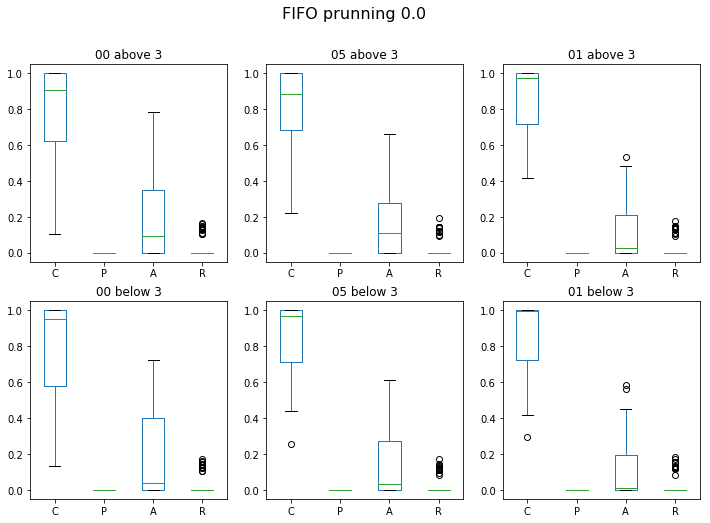

In [87]:
plot_all([df00above_00_ff ,df00above_05_ff, df00above_01_ff,df00bellow_00_ff ,df00bellow_05_ff, df00bellow_01_ff], \
             ['00 above 3', '05 above 3','01 above 3','00 below 3', '05 below 3','01 below 3'], "FIFO prunning 0.0")

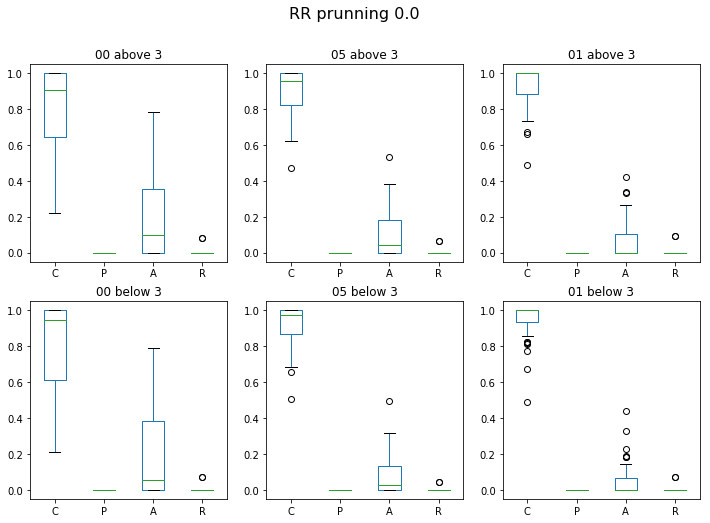

In [88]:
plot_all([df00above_00_rr ,df00above_05_rr, df00above_01_rr,df00bellow_00_rr ,df00bellow_05_rr, df00bellow_01_rr], \
             ['00 above 3', '05 above 3','01 above 3','00 below 3', '05 below 3','01 below 3'], "RR prunning 0.0")

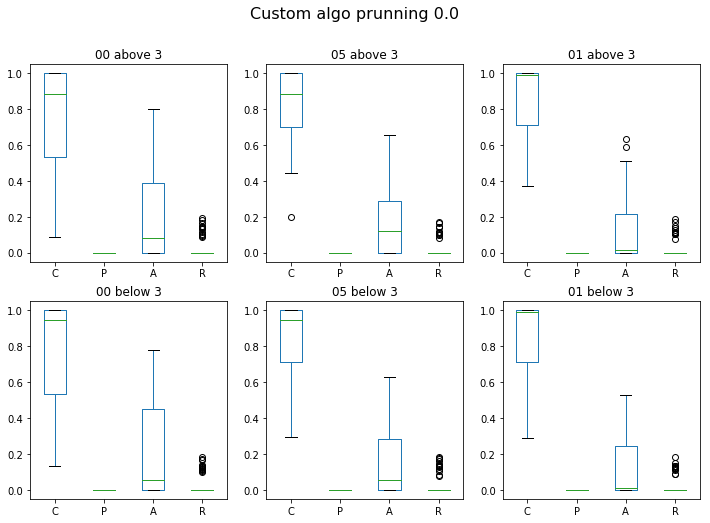

In [86]:
plot_all([df00above_00_cus ,df00above_05_cus, df00above_01_cus,df00bellow_00_cus ,df00bellow_05_cus, df00bellow_01_cus], \
             ['00 above 3', '05 above 3','01 above 3','00 below 3', '05 below 3','01 below 3'], "Custom algo prunning 0.0")

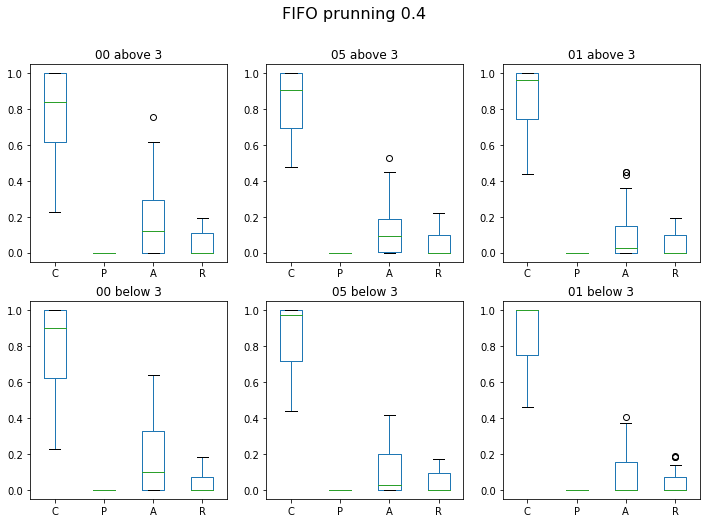

In [89]:
plot_all([df04above_00_ff ,df04above_05_ff, df04above_01_ff,df04bellow_00_ff ,df04bellow_05_ff, df04bellow_01_ff], \
             ['00 above 3', '05 above 3','01 above 3','00 below 3', '05 below 3','01 below 3'], "FIFO prunning 0.4")

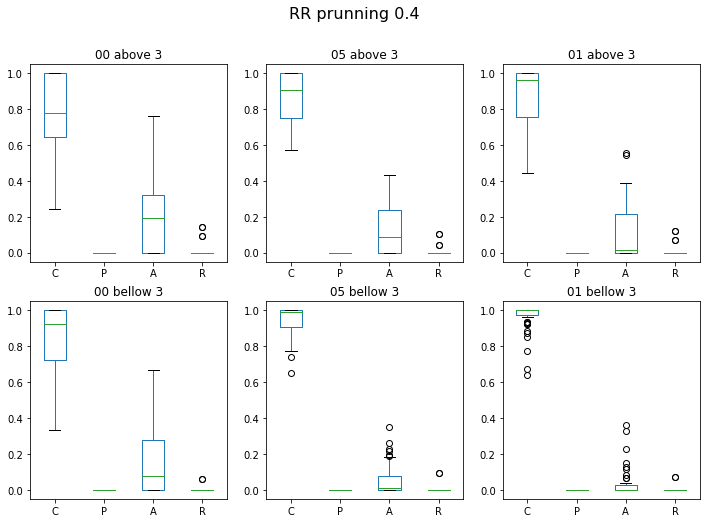

In [21]:
plot_all([df04above_00_rr ,df04above_05_rr, df04above_01_rr,df04bellow_00_rr ,df04bellow_05_rr, df04bellow_01_rr], \
             ['00 above 3', '05 above 3','01 above 3','00 bellow 3', '05 bellow 3','01 bellow 3'], "RR prunning 0.4")

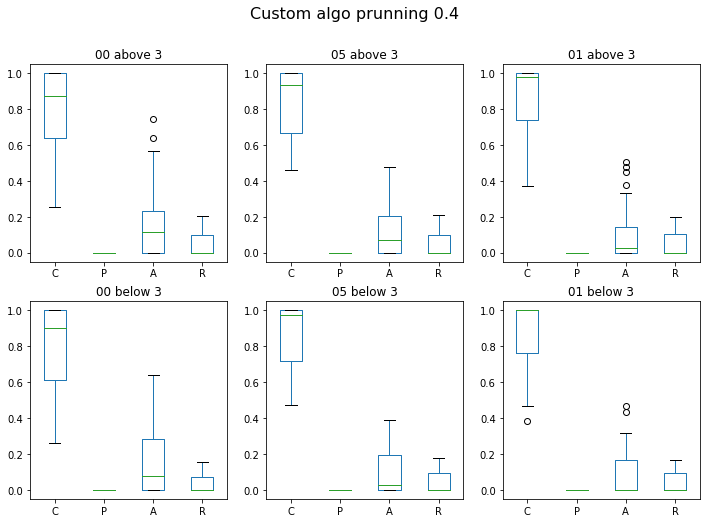

In [90]:
plot_all([df04above_00_cus ,df04above_05_cus, df04above_01_cus,df04bellow_00_cus ,df04bellow_05_cus, df04bellow_01_cus], \
             ['00 above 3', '05 above 3','01 above 3','00 below 3', '05 below 3','01 below 3'], "Custom algo prunning 0.4")

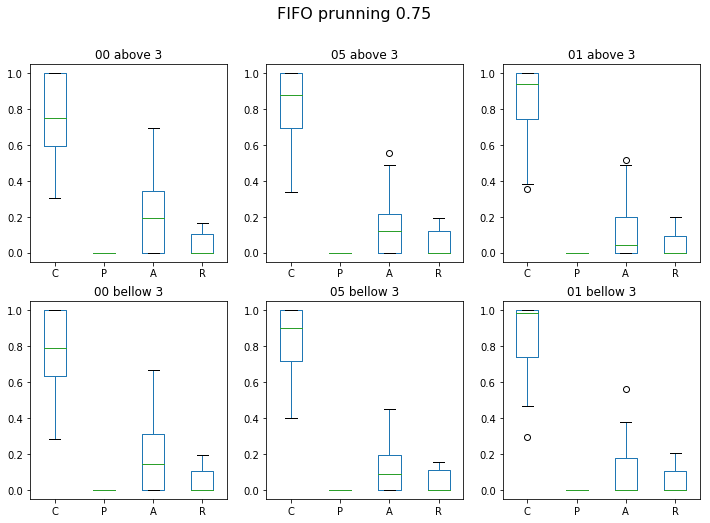

In [22]:
plot_all([df75above_00_ff ,df75above_05_ff, df75above_01_ff,df75bellow_00_ff ,df75bellow_05_ff, df75bellow_01_ff], \
             ['00 above 3', '05 above 3','01 above 3','00 bellow 3', '05 bellow 3','01 bellow 3'], "FIFO prunning 0.75")

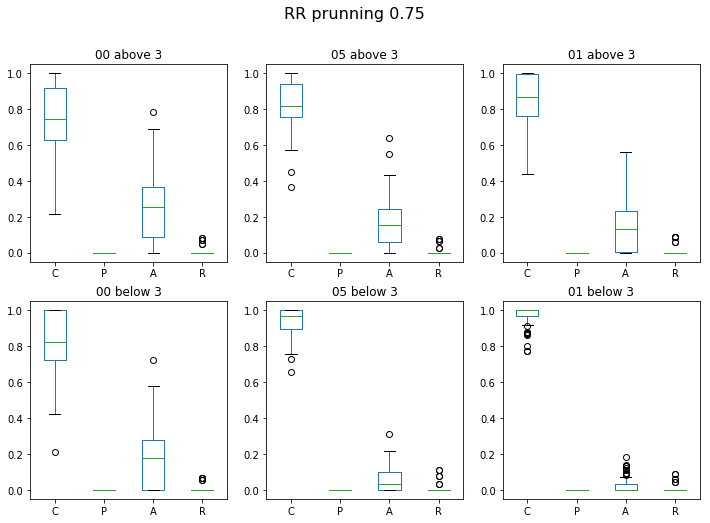

In [91]:
plot_all([df75above_00_rr ,df75above_05_rr, df75above_01_rr,df75bellow_00_rr ,df75bellow_05_rr, df75bellow_01_rr], \
             ['00 above 3', '05 above 3','01 above 3','00 below 3', '05 below 3','01 below 3'], "RR prunning 0.75")

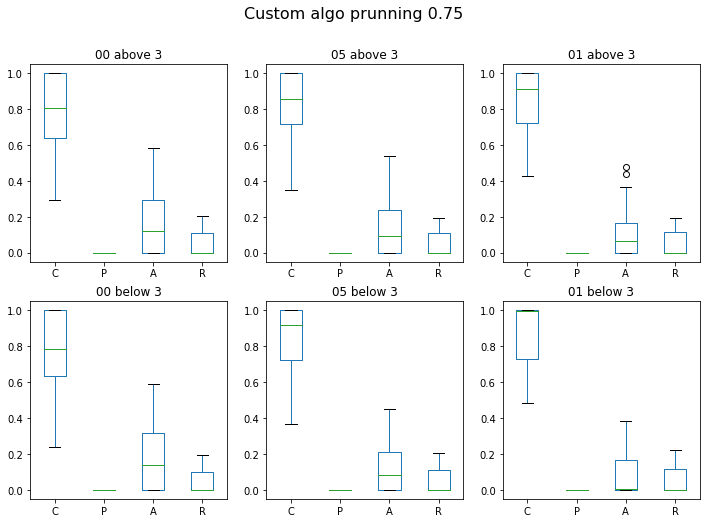

In [92]:
plot_all([df75above_00_cus ,df75above_05_cus, df75above_01_cus,df75bellow_00_cus ,df75bellow_05_cus, df75bellow_01_cus], \
             ['00 above 3', '05 above 3','01 above 3','00 below 3', '05 below 3','01 below 3'], "Custom algo prunning 0.75")

In [112]:
def plot_many(df0, df1, df2, title0, title1, title2, category):
    
    trees = ['T0-G0', 'T1-G0']
    
    for i in range(1,31):
        
        file_name = get_file_name(i)
        
        try:
            df0_copy = df0.copy()
            df1_copy = df1.copy()
            df2_copy = df2.copy()
            
            df0_copy = df0_copy[['stochasticity','goal_name','completed', 'pending', 'active', 'failed_by_retries']]
            df1_copy = df1_copy[['stochasticity','goal_name','completed', 'pending', 'active', 'failed_by_retries']]
            df2_copy = df2_copy[['stochasticity','goal_name','completed', 'pending', 'active', 'failed_by_retries']]
            
                        
            df0_new = get_proportion_df(df0_copy)
            df1_new = get_proportion_df(df1_copy)
            df2_new = get_proportion_df(df2_copy)
            
            df0_new.drop(df0_new.loc[df0['forest_name']!= file_name].index, inplace=True)
            df1_new.drop(df1_new.loc[df1['forest_name']!= file_name].index, inplace=True)
            df2_new.drop(df2_new.loc[df1['forest_name']!= file_name].index, inplace=True)

            fig, axs = plt.subplots(1,3, constrained_layout=True, figsize=(10,4))

            df0_new.groupby(['stochasticity', 'goal_name']).sum().plot(kind='bar' , ax=axs[0])

            axs[0].set_title(title0)
            fig.suptitle((file_name + " " + category), fontsize=14)
            df1_new.groupby(['stochasticity', 'goal_name']).sum().plot(kind='bar' , ax=axs[1])

            axs[1].set_title(title1)
            
            df2_new.groupby(['stochasticity', 'goal_name']).sum().plot(kind='bar' , ax=axs[2])

            axs[2].set_title(title2)
            
            plt.setp( axs[0].xaxis.get_majorticklabels(), rotation=45 )
            plt.setp( axs[1].xaxis.get_majorticklabels(), rotation=45 )
            plt.setp( axs[2].xaxis.get_majorticklabels(), rotation=45 )


            plt.show()
        except:
            print(file_name + " not found")

        

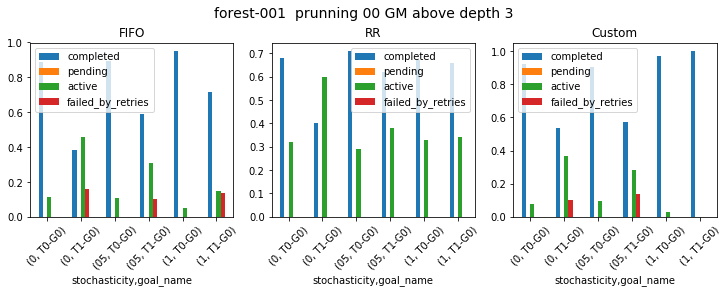

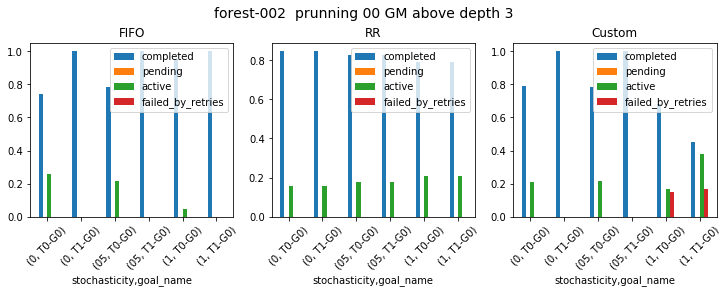

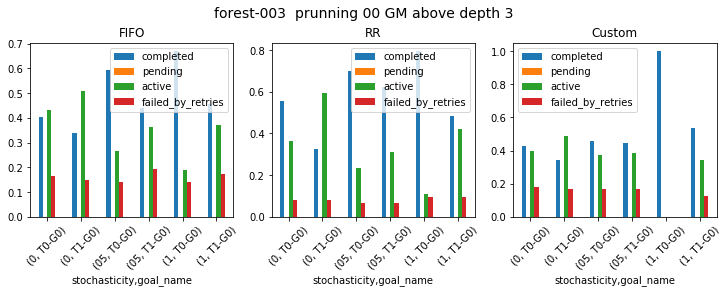

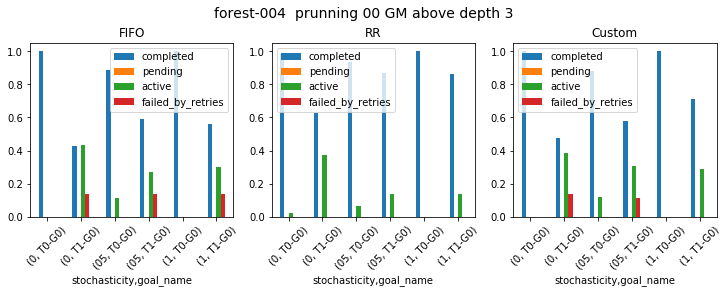

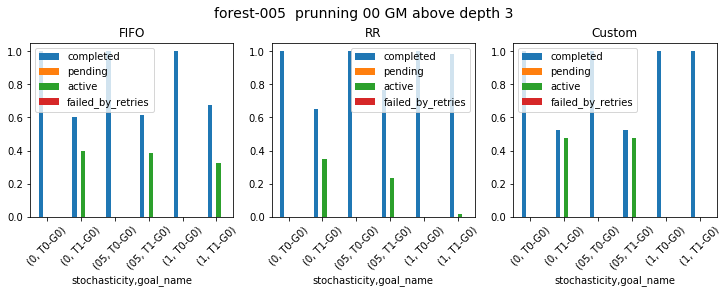

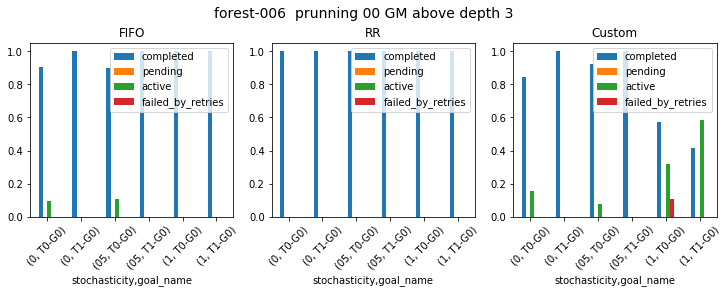

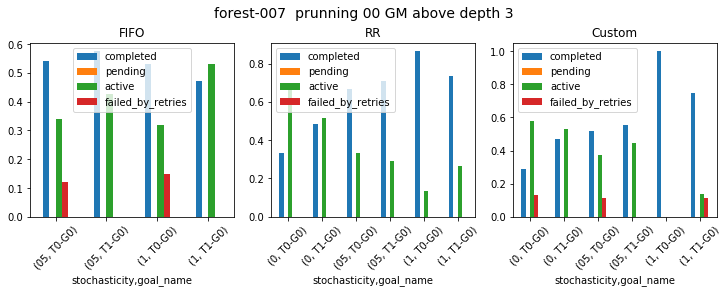

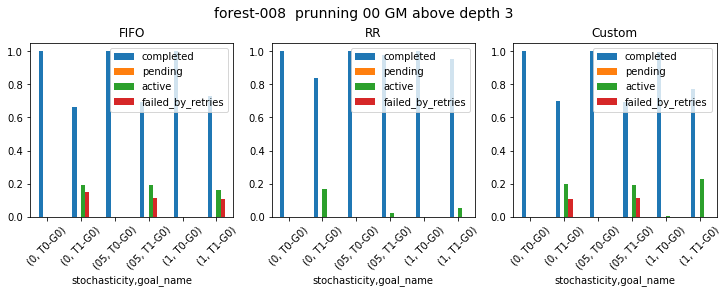

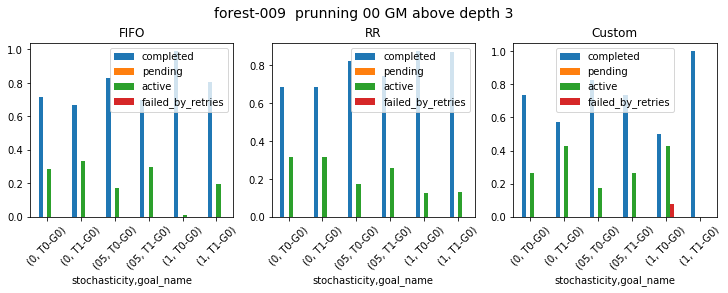

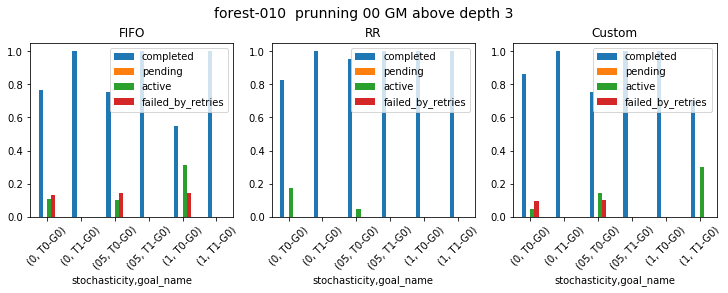

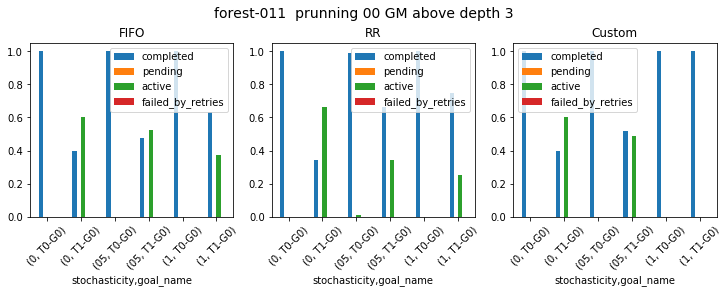

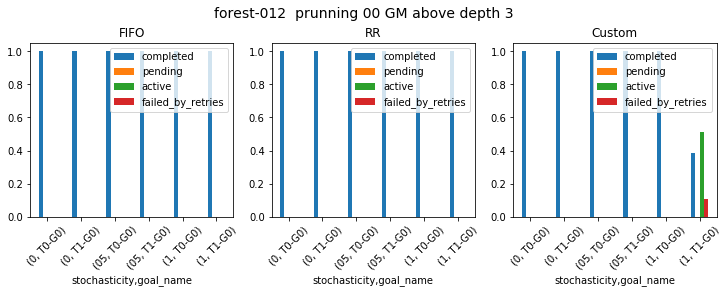

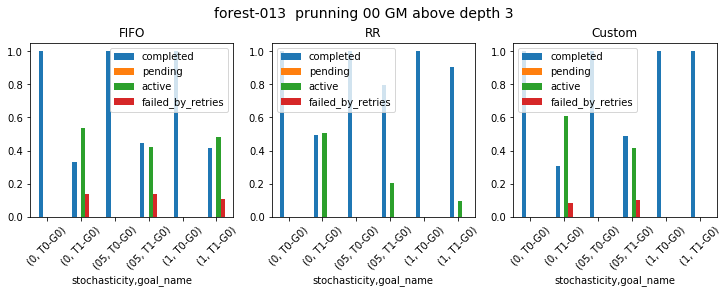

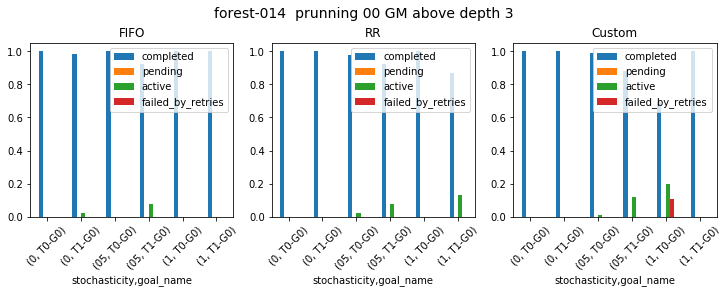

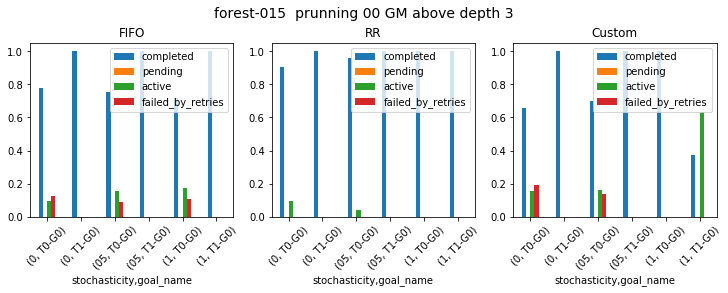

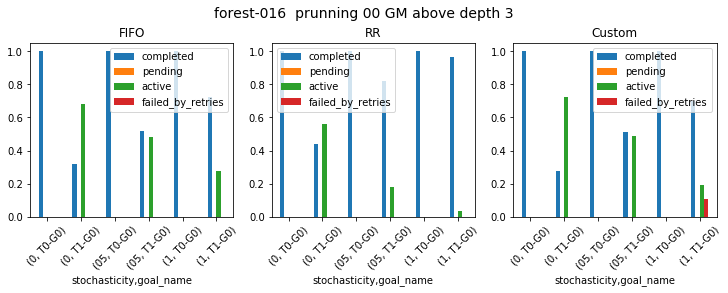

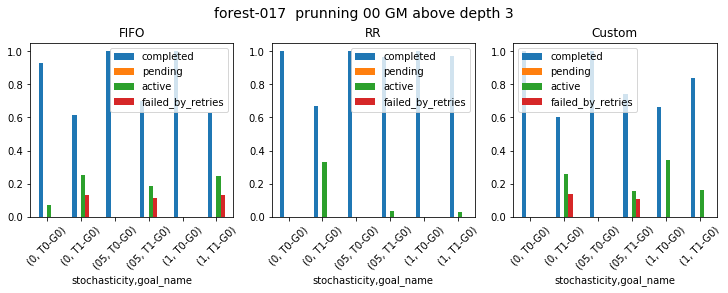

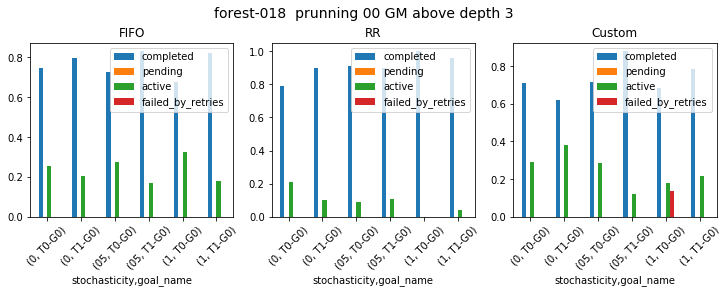

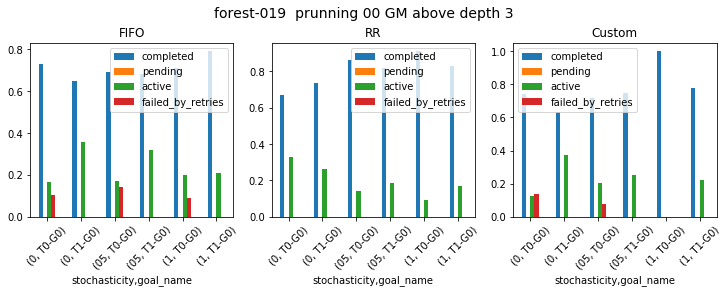

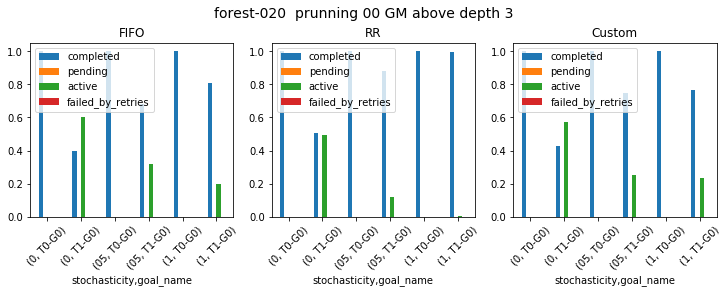

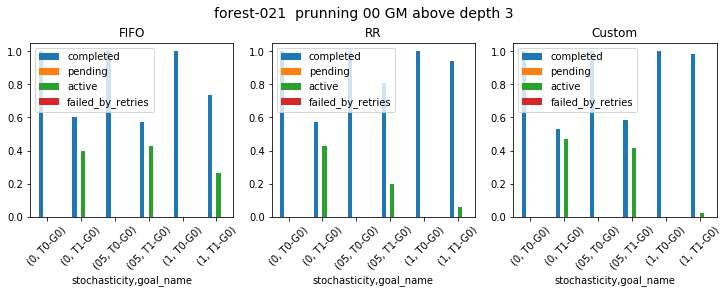

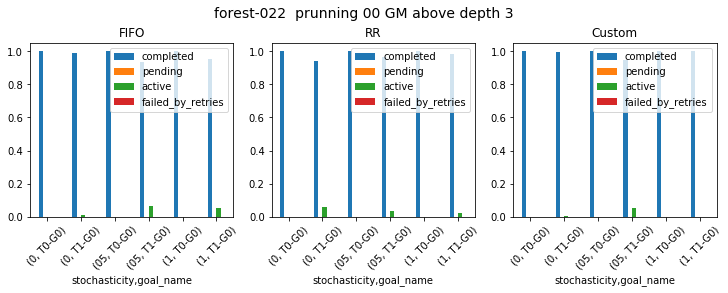

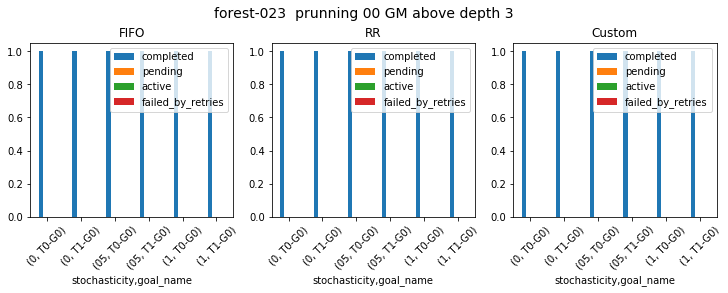

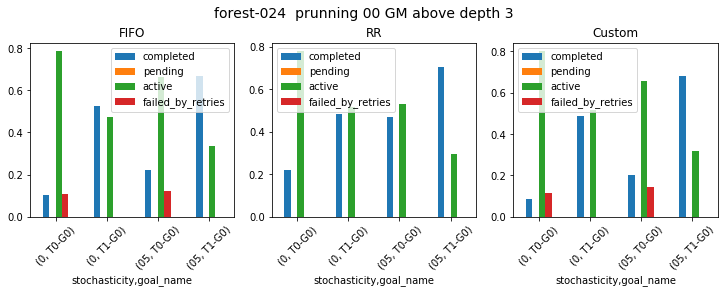

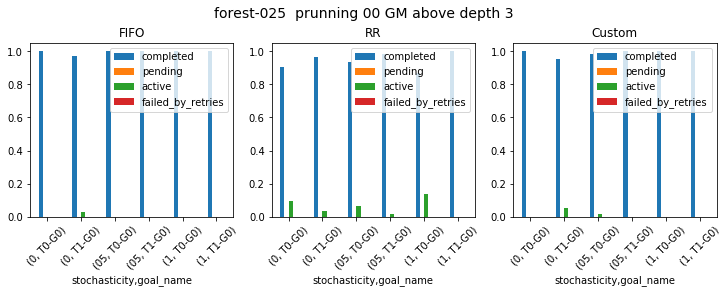

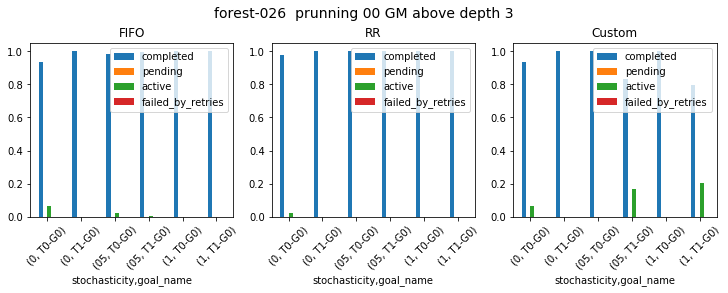

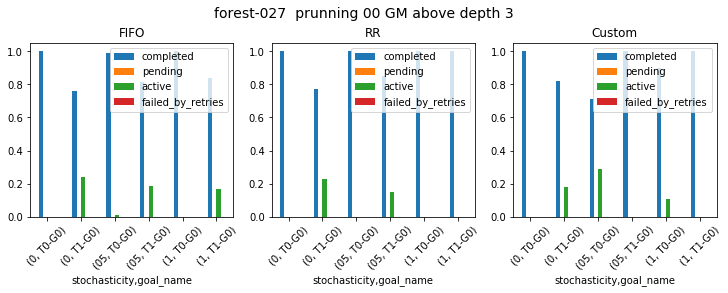

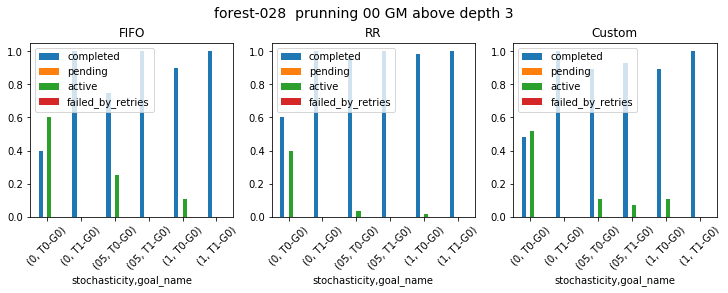

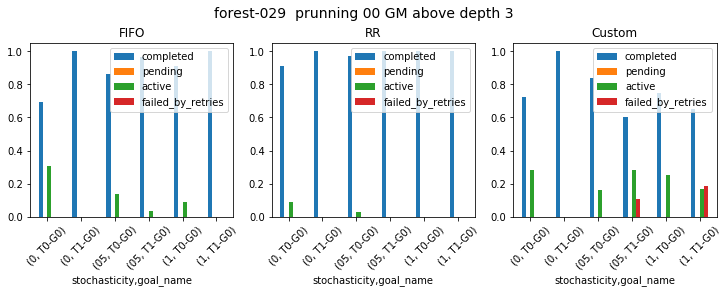

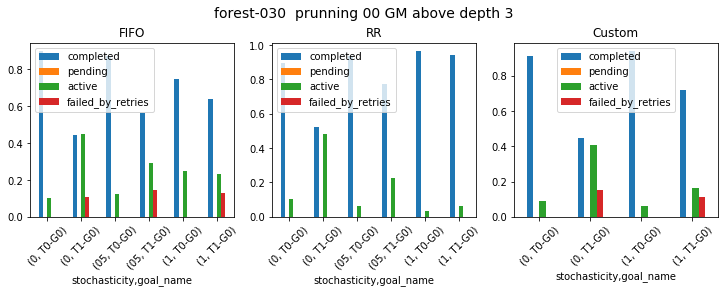

In [113]:
plot_many(df00above_ff, df00above_rr, df00above_cus, "FIFO", "RR", "Custom", " prunning 00 GM above depth 3")

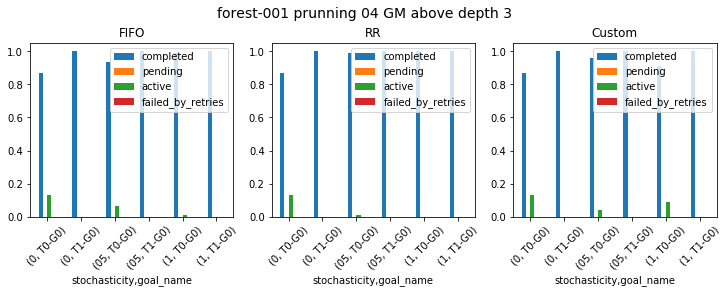

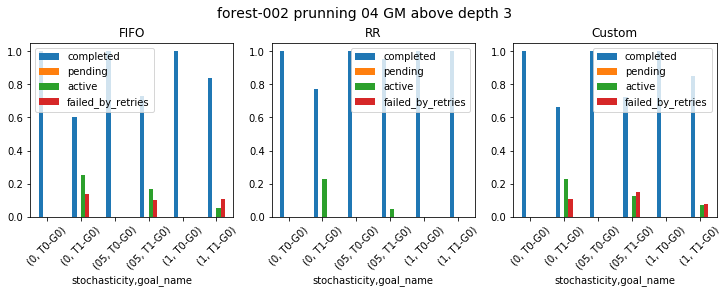

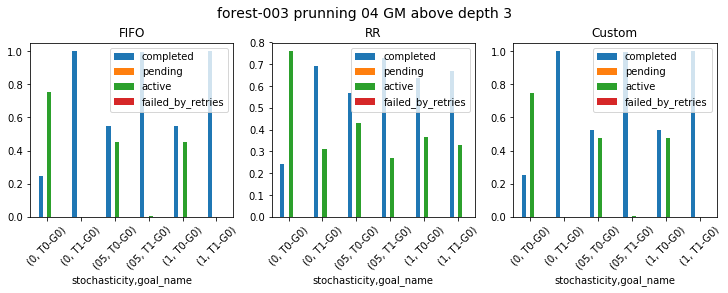

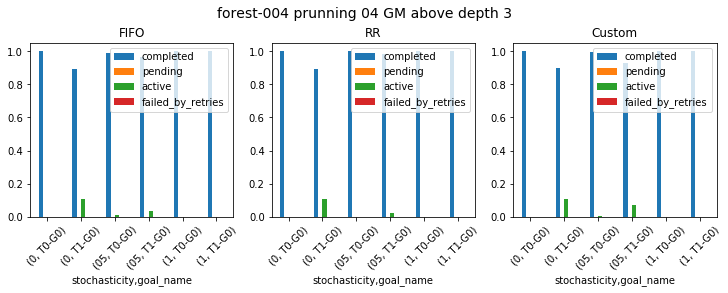

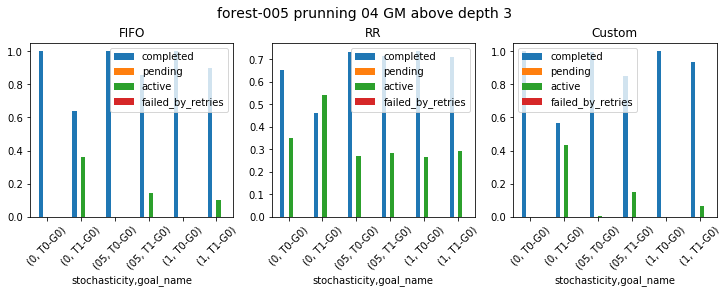

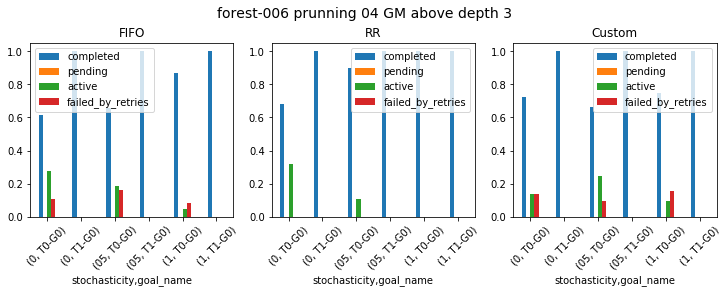

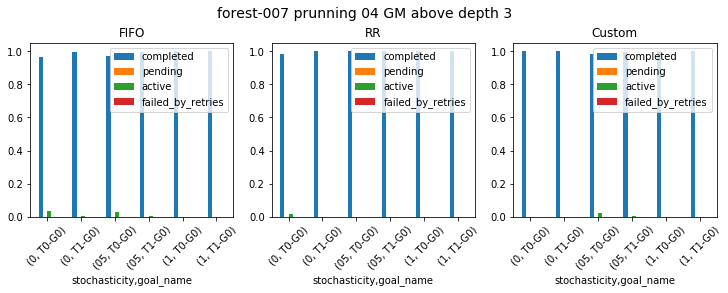

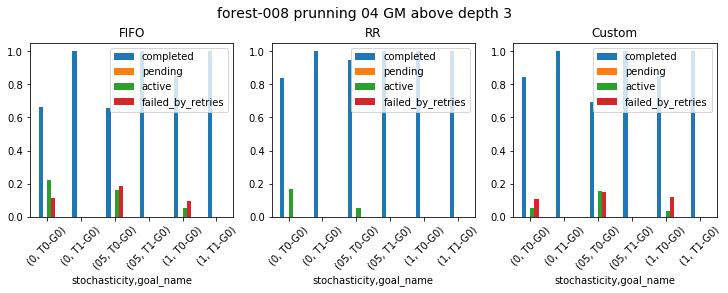

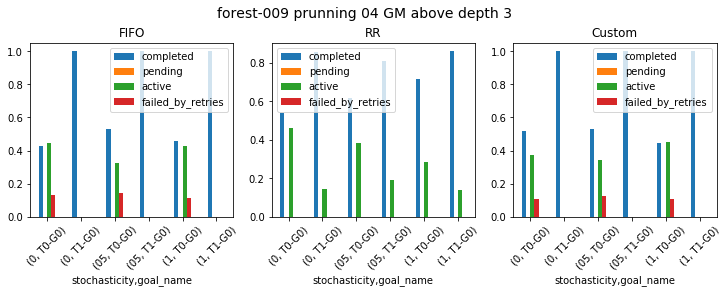

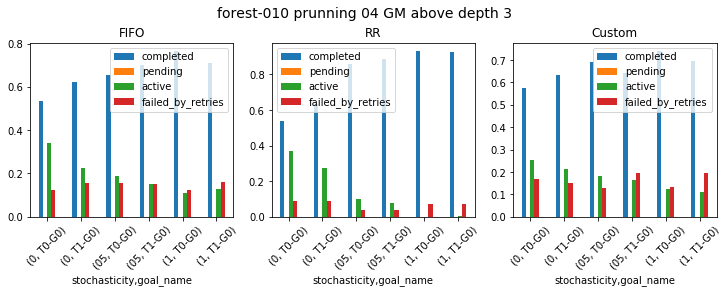

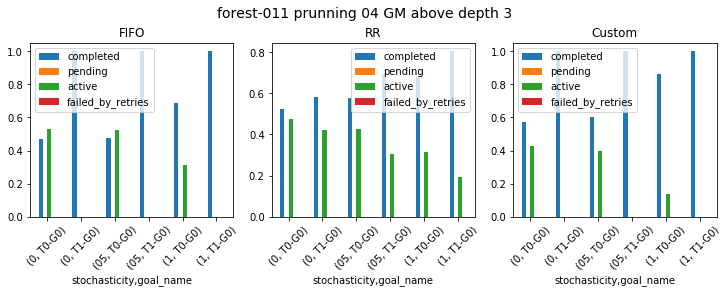

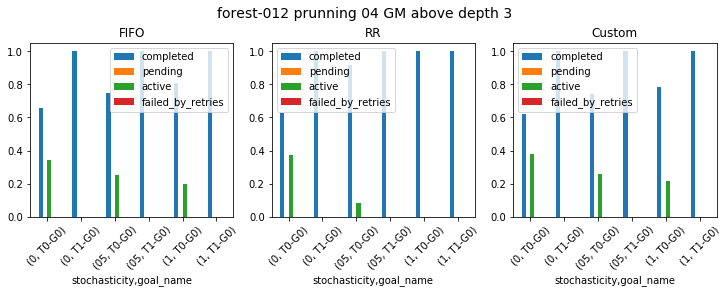

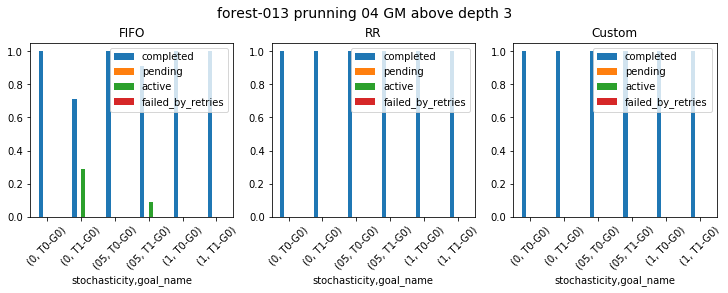

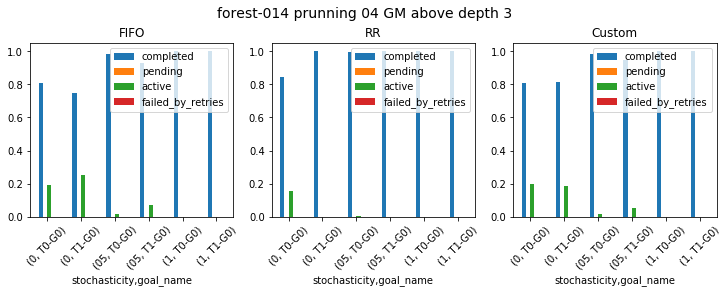

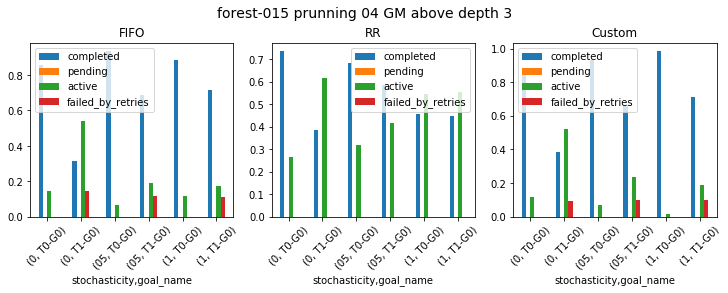

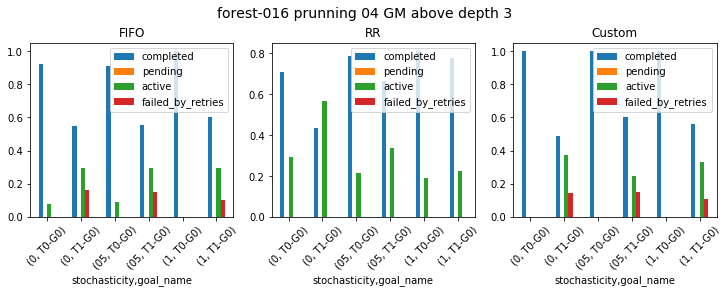

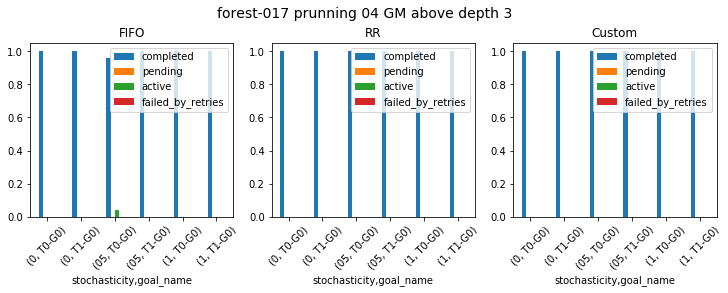

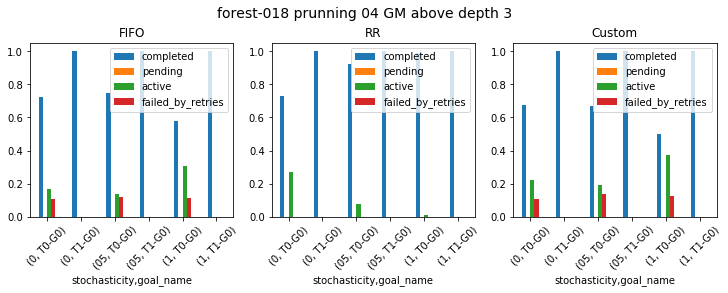

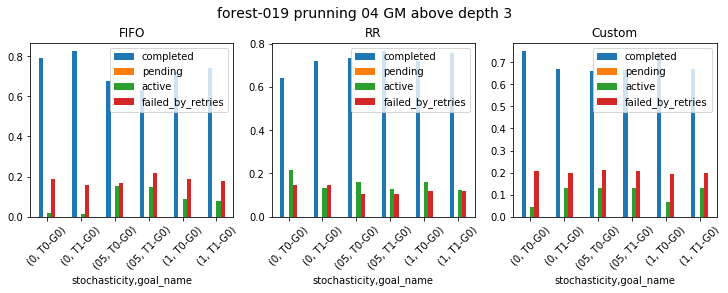

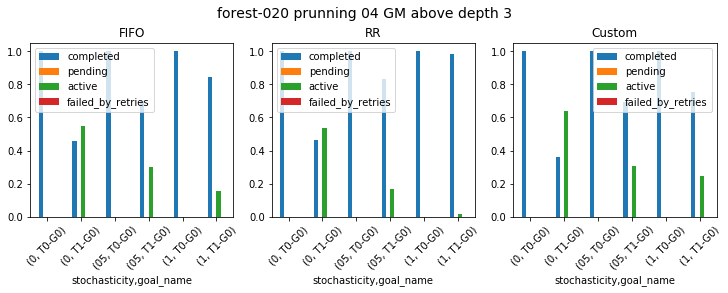

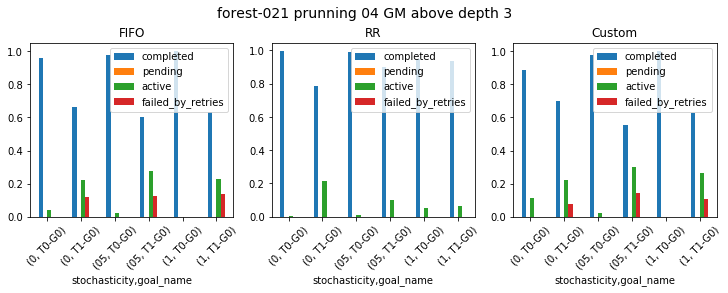

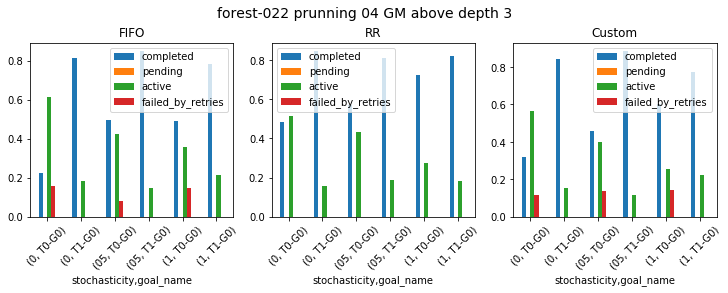

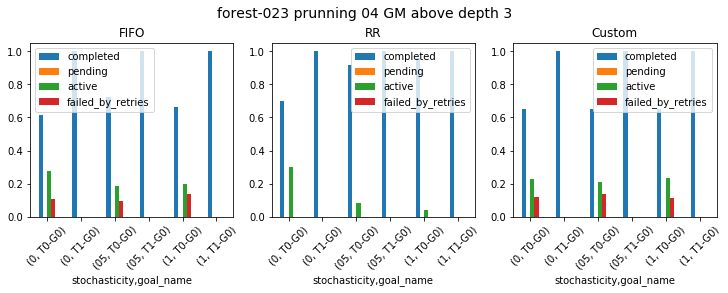

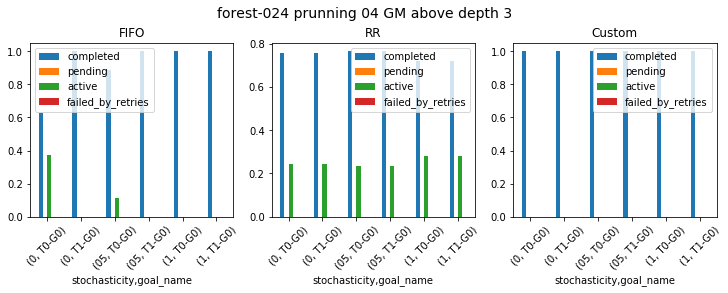

forest-025 not found


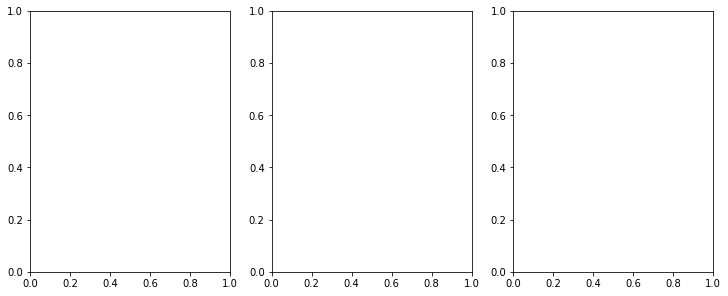

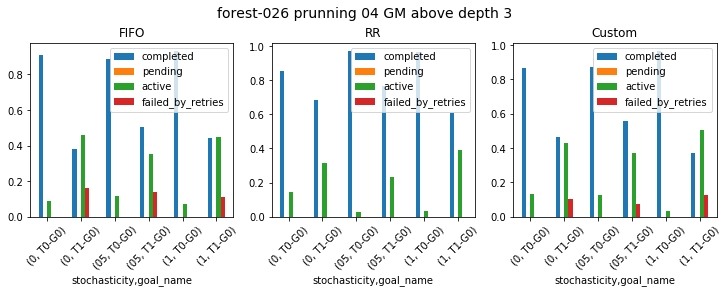

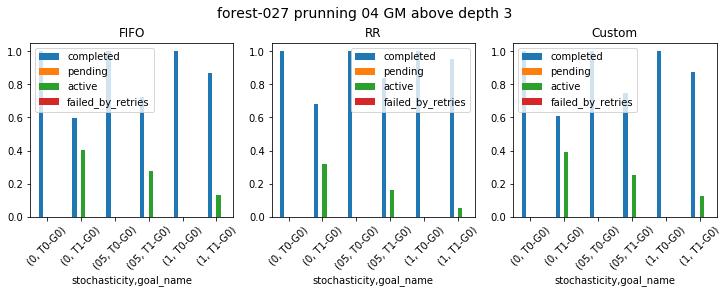

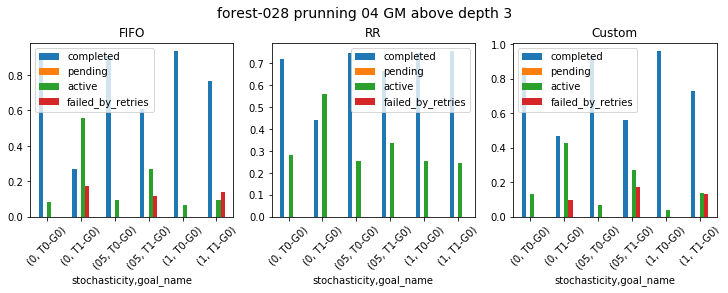

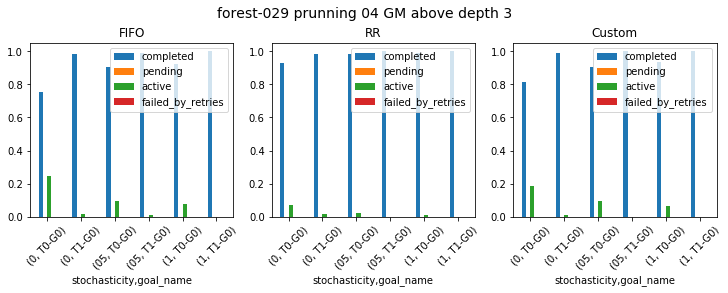

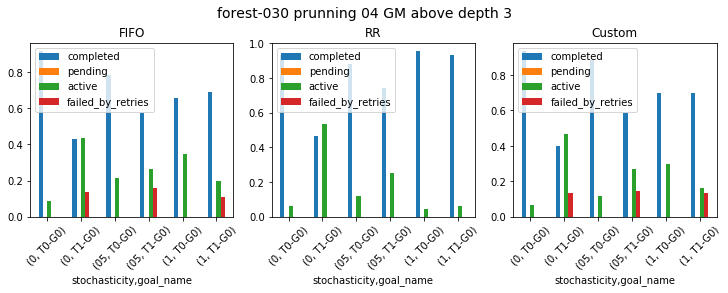

In [114]:
plot_many(df04above_ff, df04above_rr, df04above_cus, "FIFO", "RR", "Custom", "prunning 04 GM above depth 3")

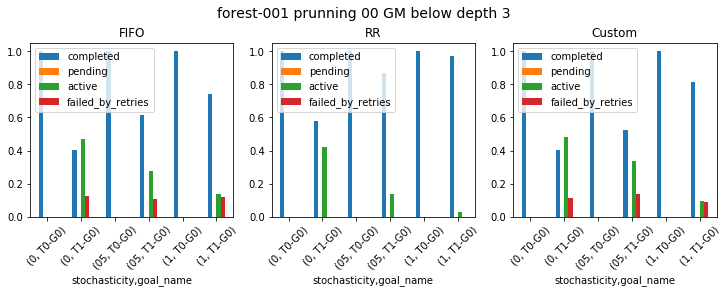

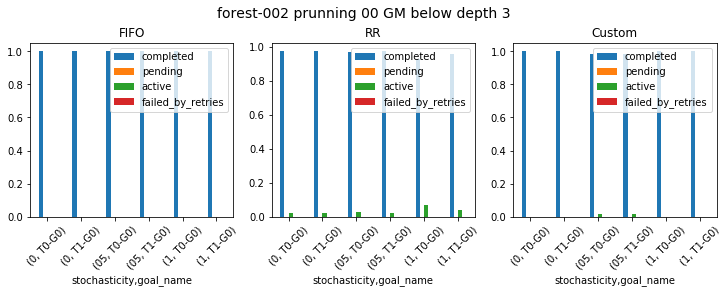

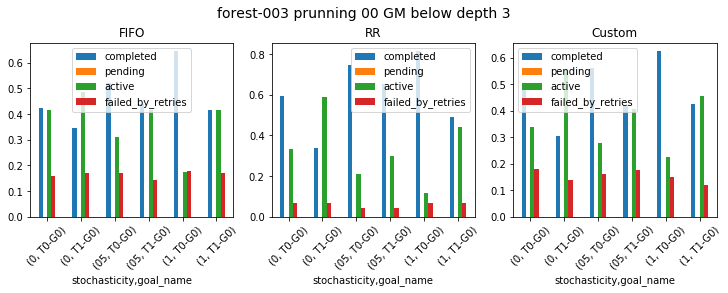

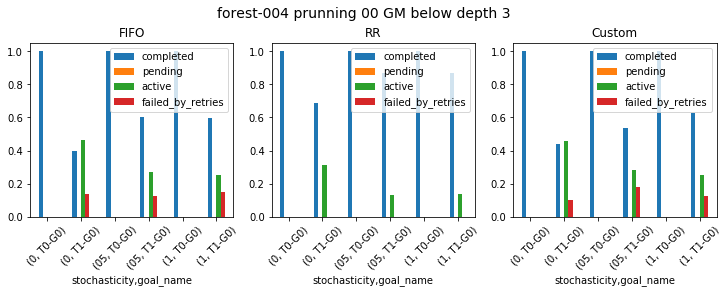

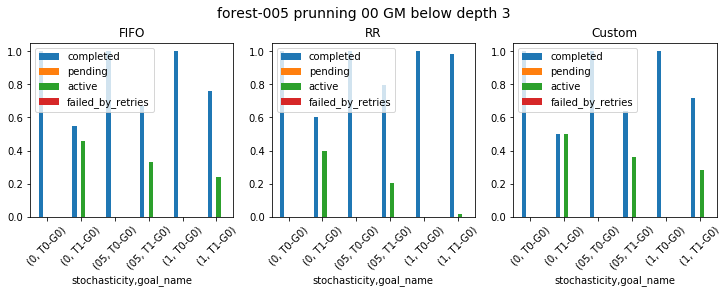

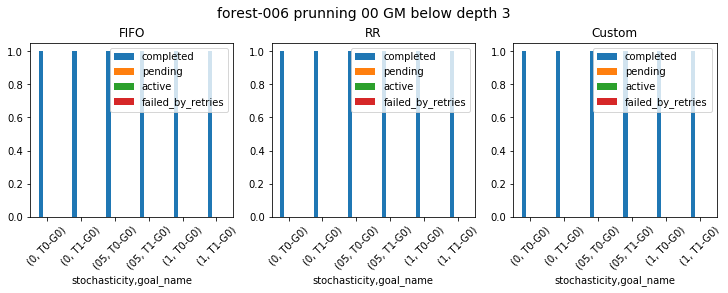

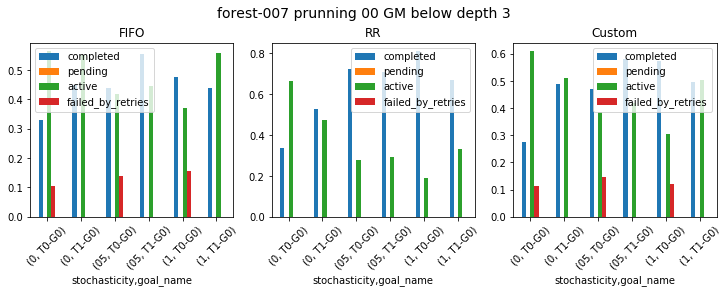

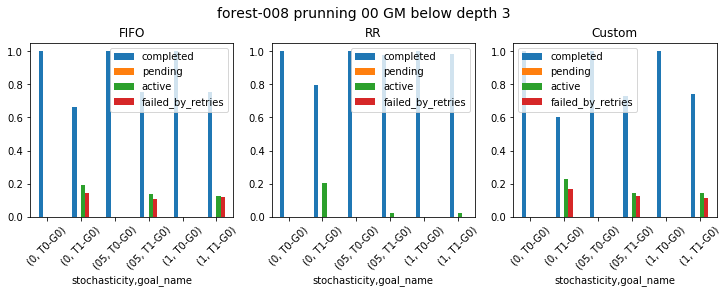

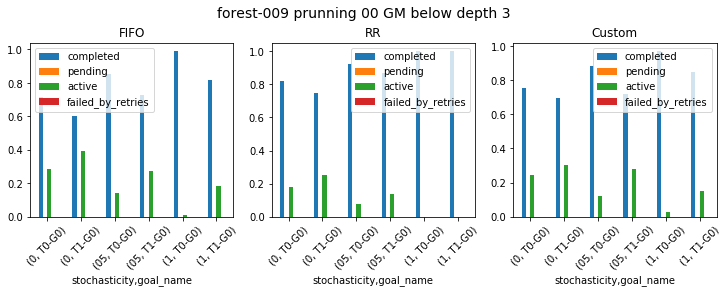

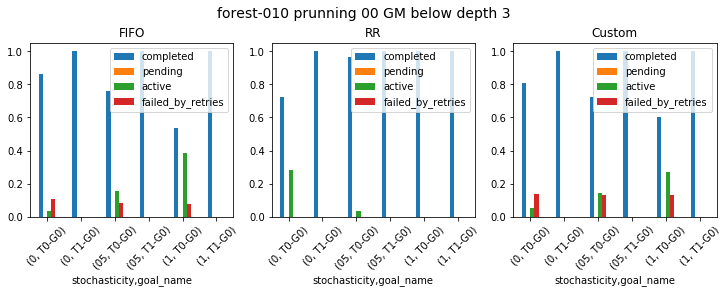

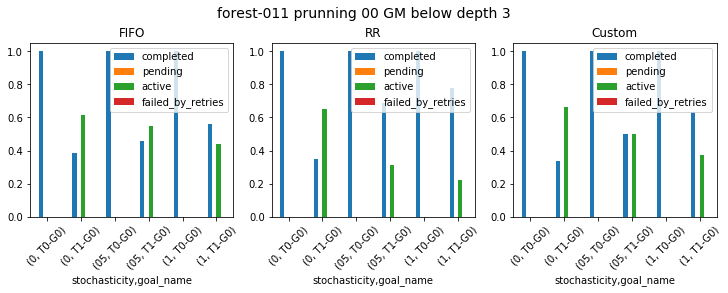

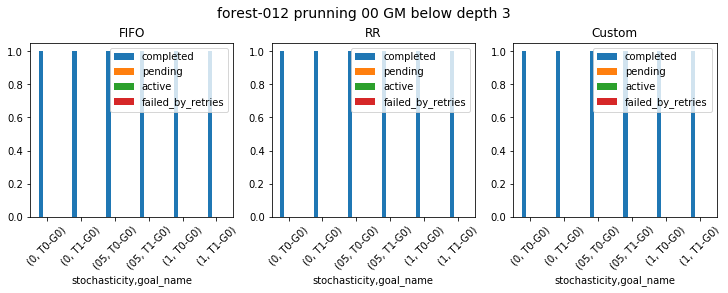

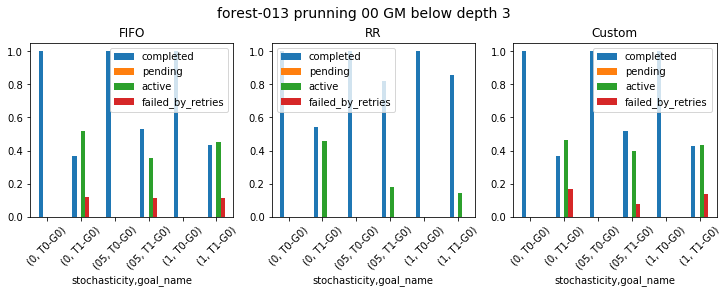

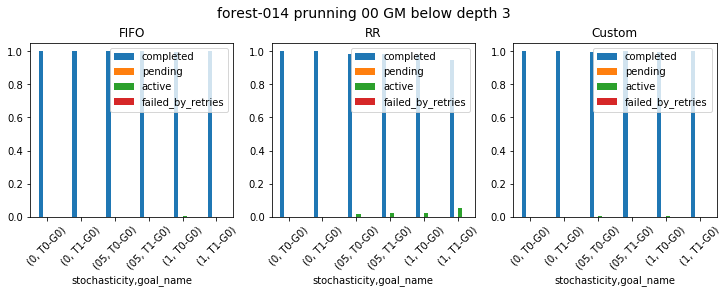

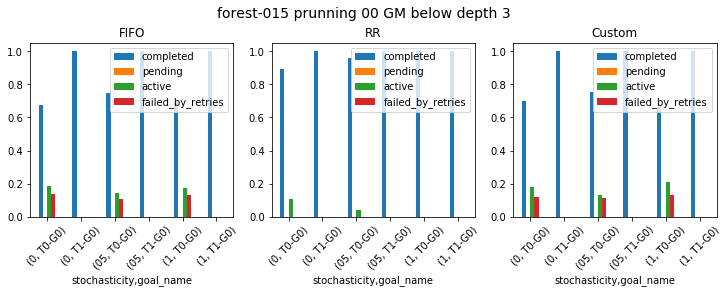

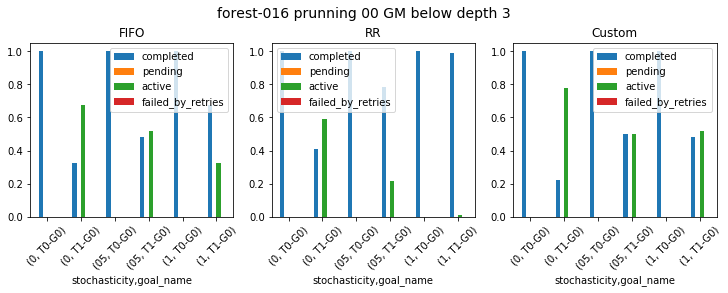

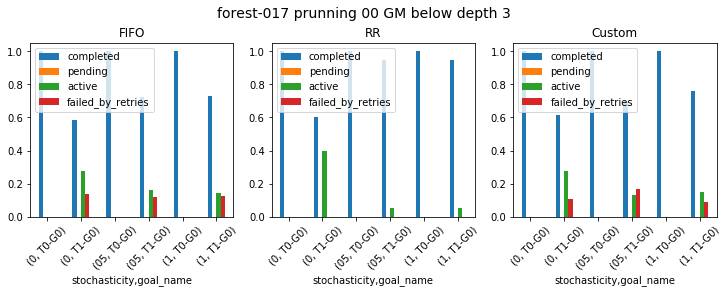

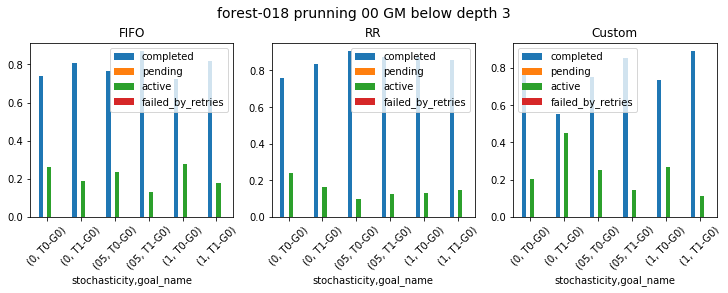

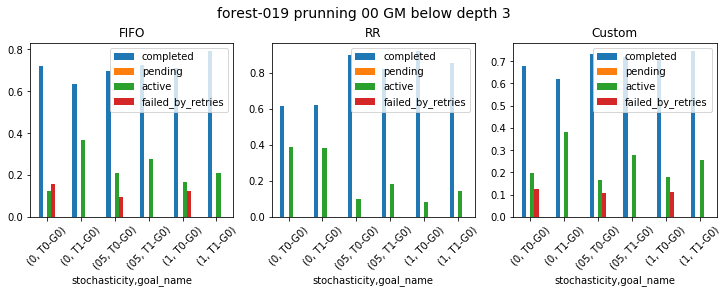

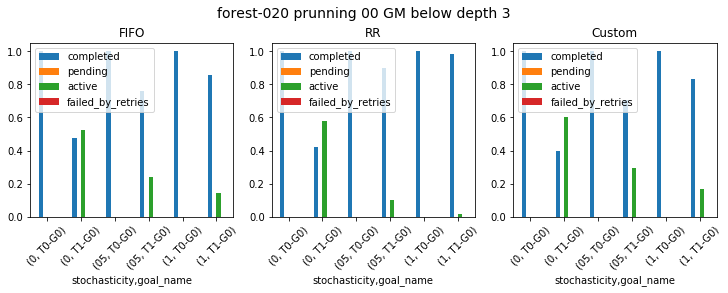

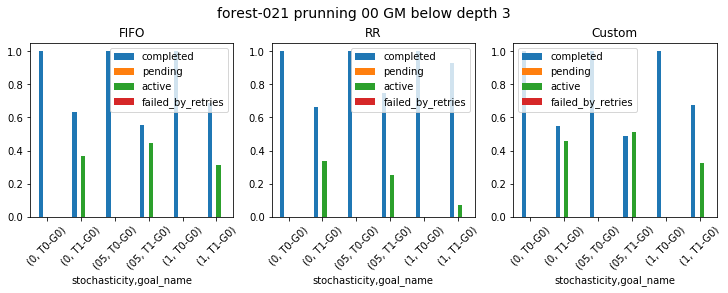

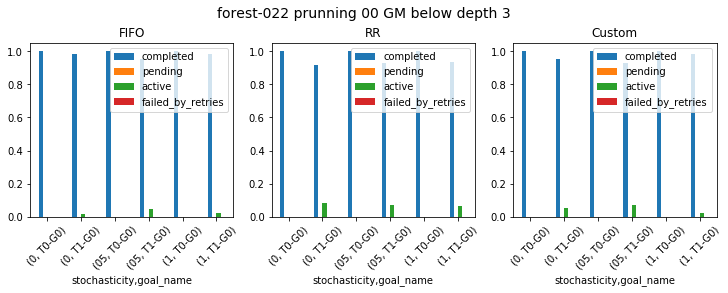

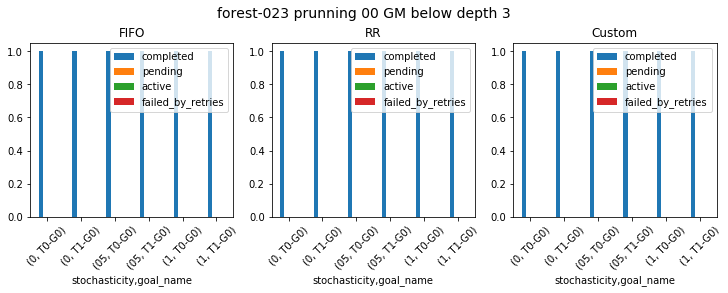

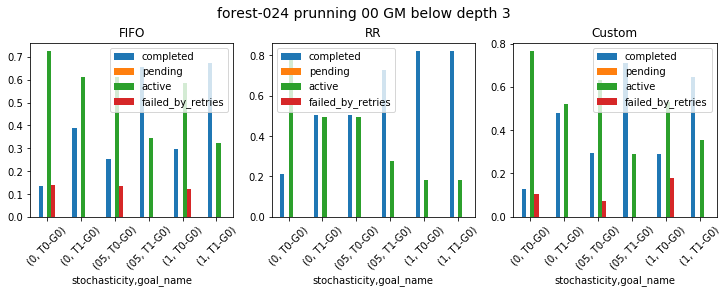

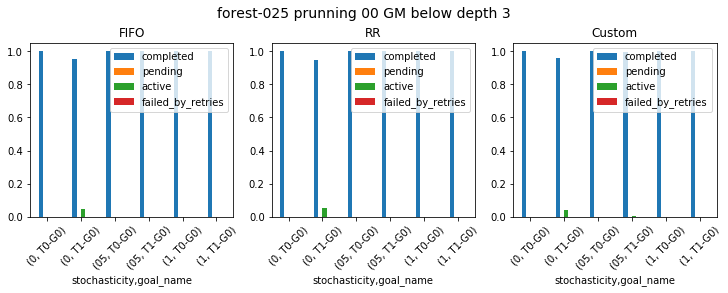

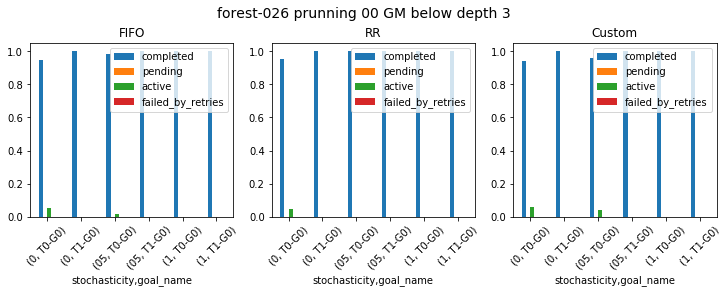

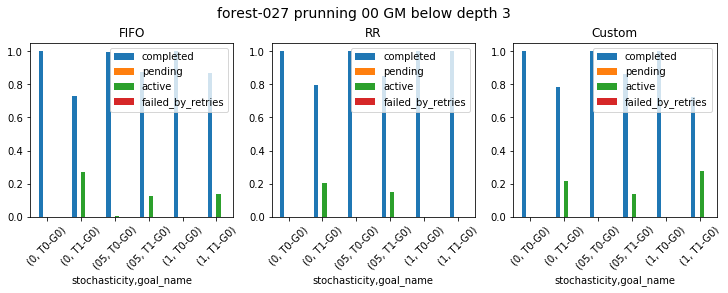

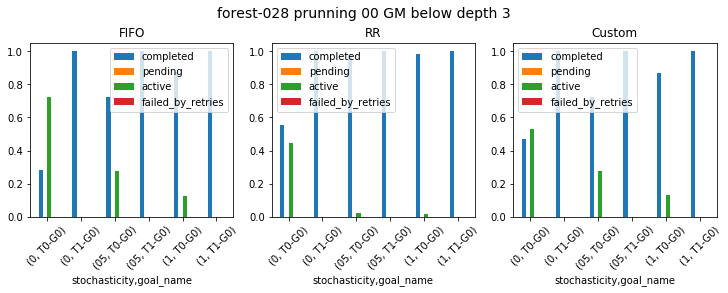

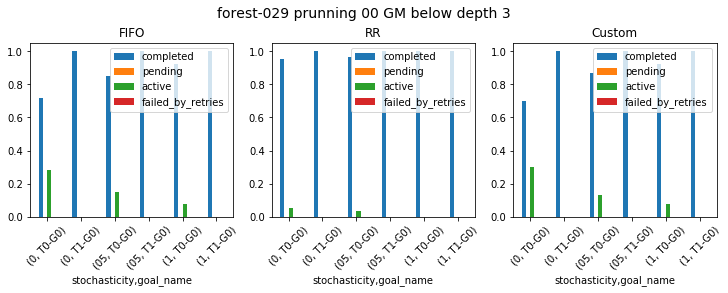

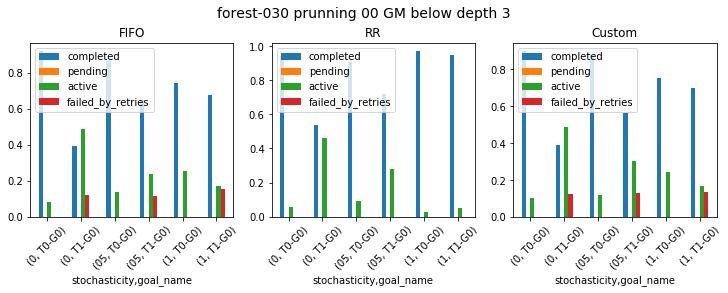

In [115]:
plot_many(df00bellow_ff, df00bellow_rr, df00bellow_cus, "FIFO", "RR", "Custom", "prunning 00 GM below depth 3")

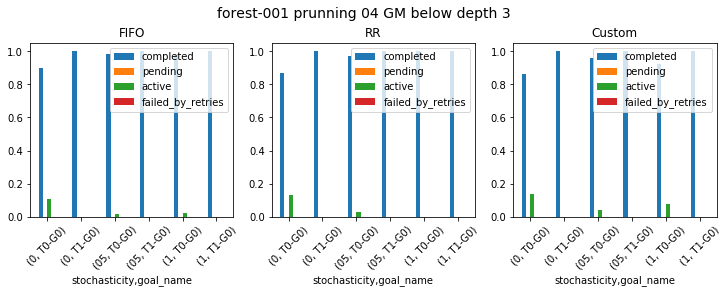

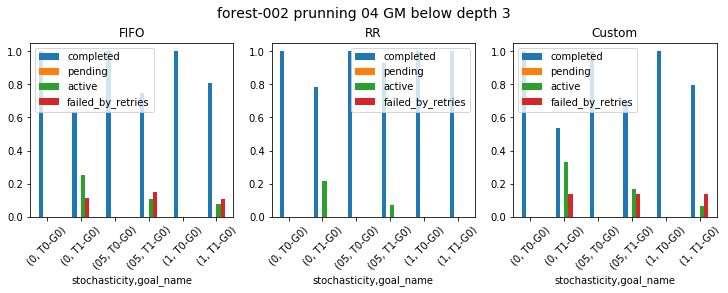

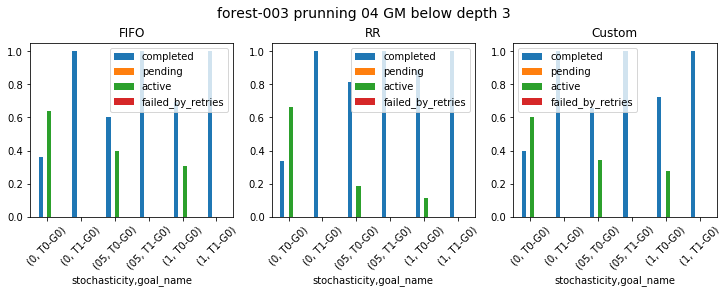

forest-004 not found


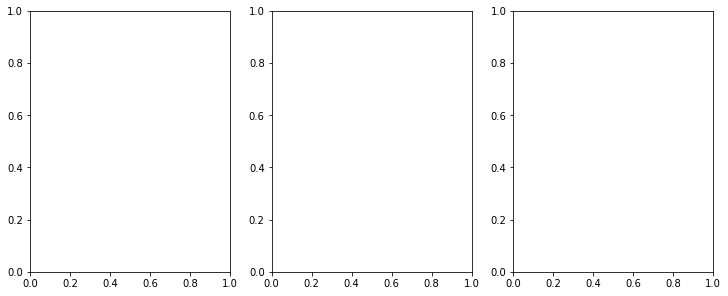

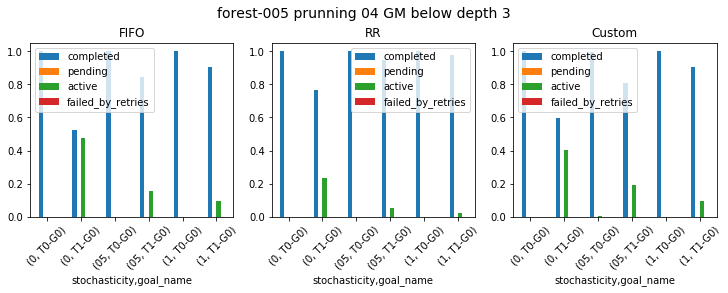

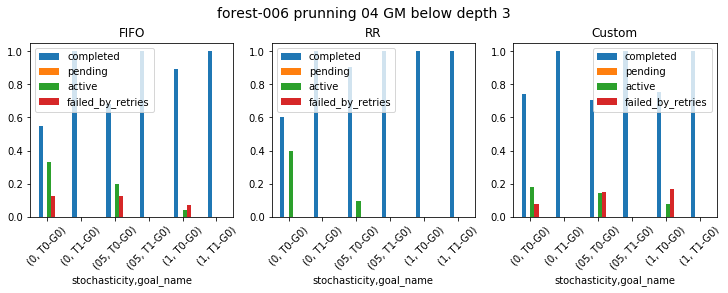

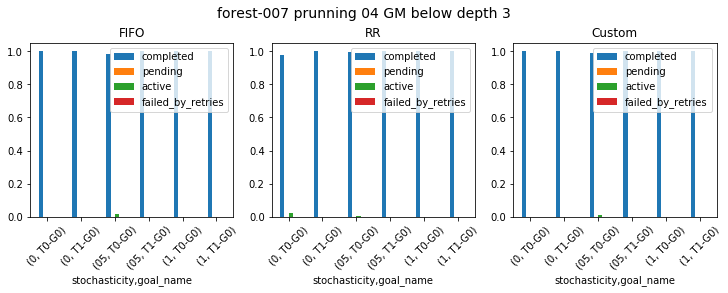

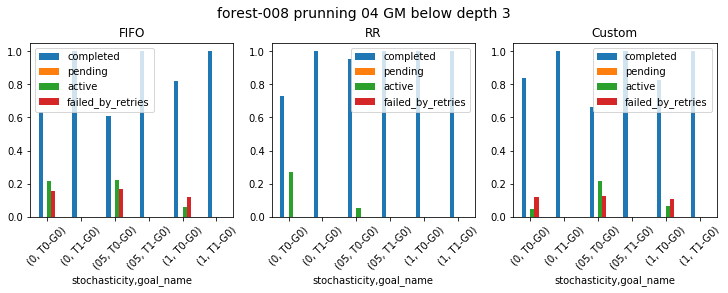

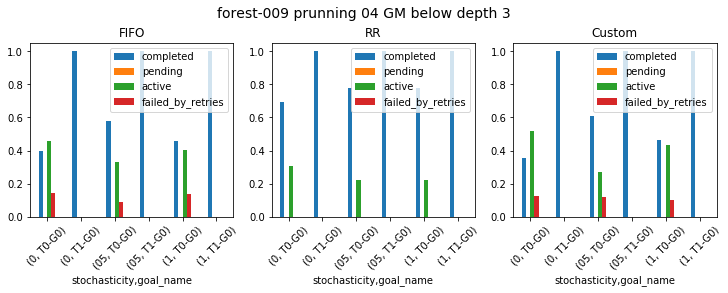

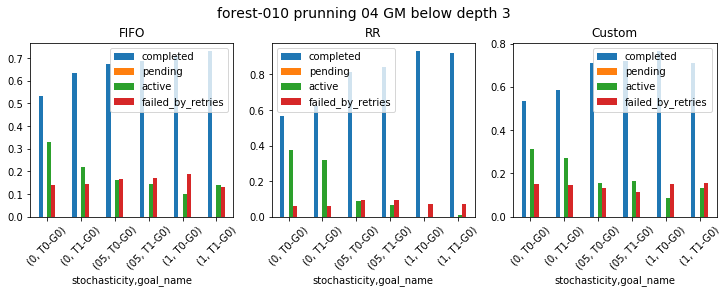

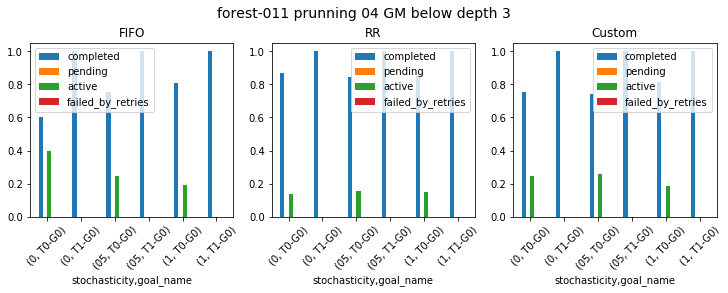

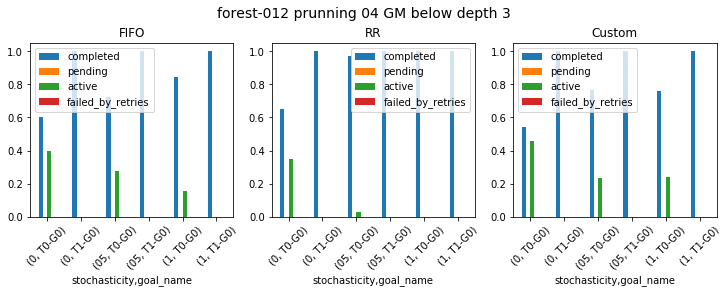

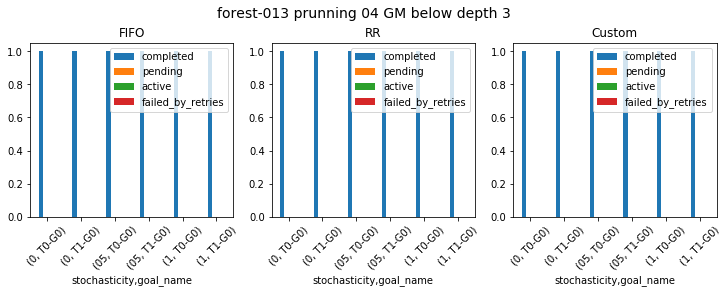

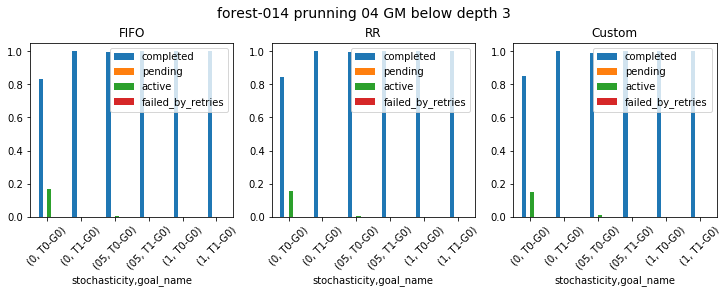

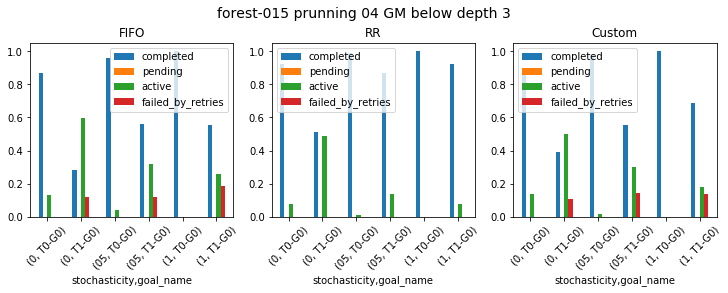

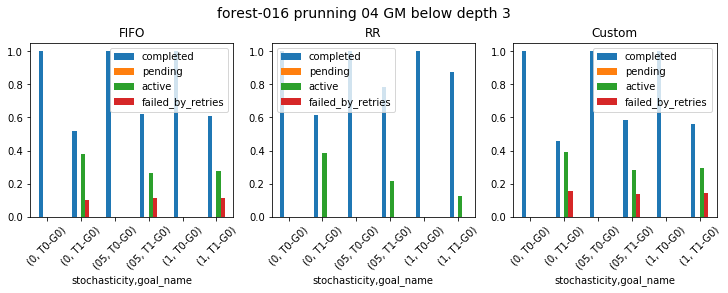

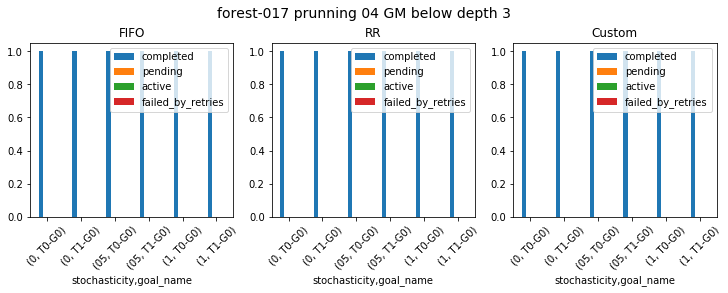

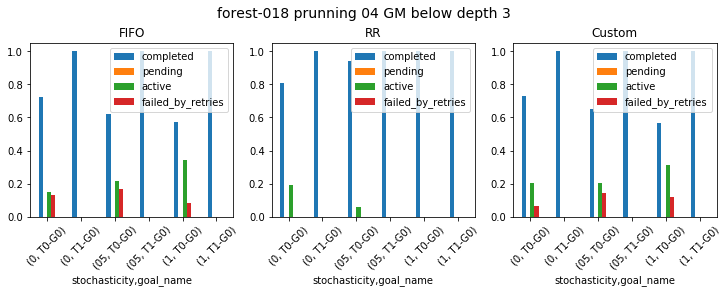

forest-019 not found


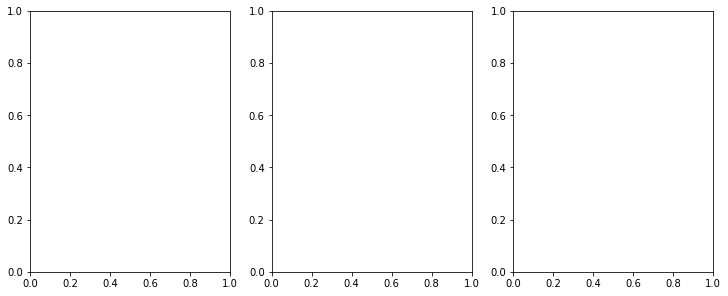

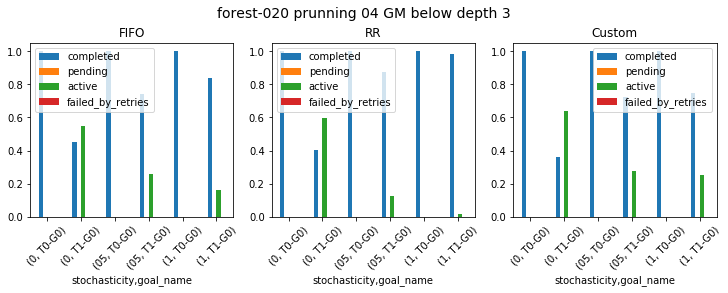

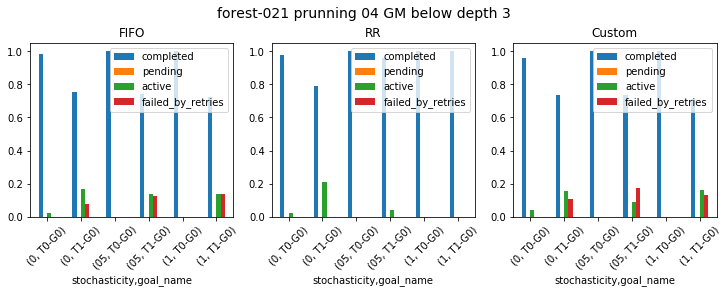

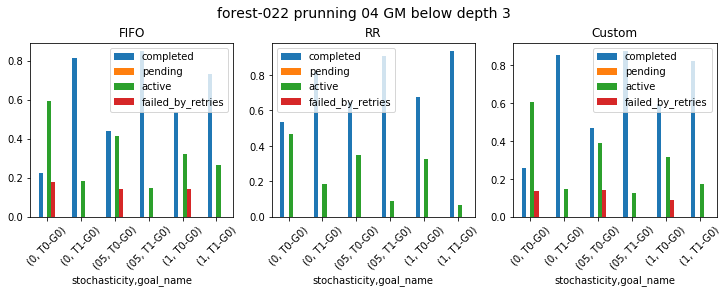

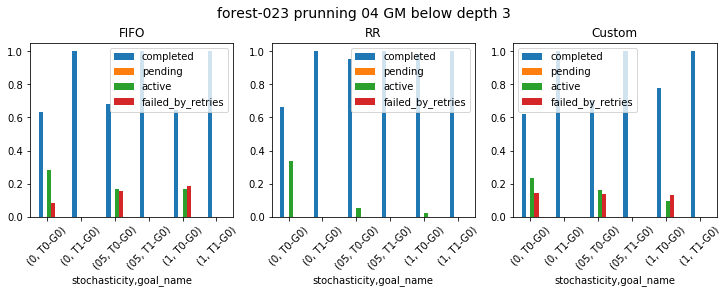

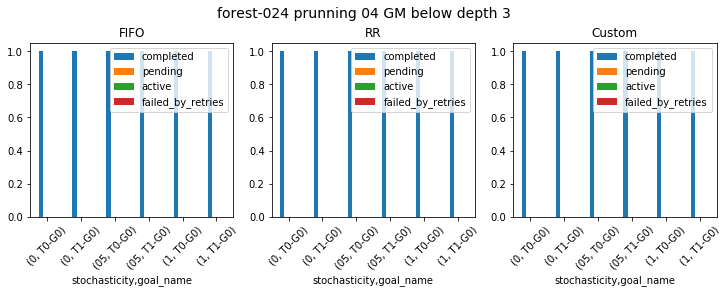

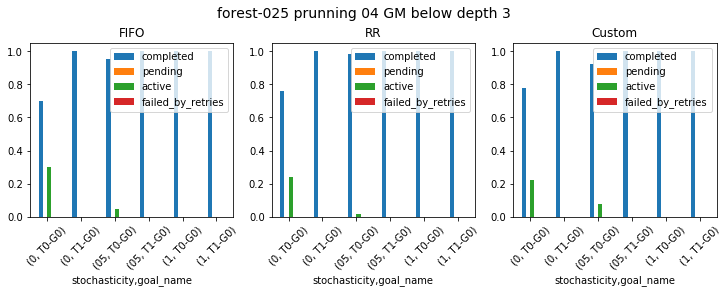

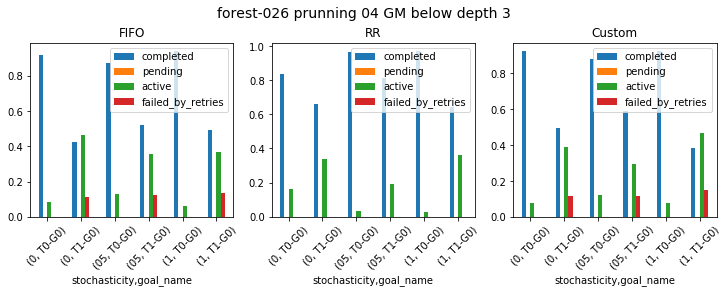

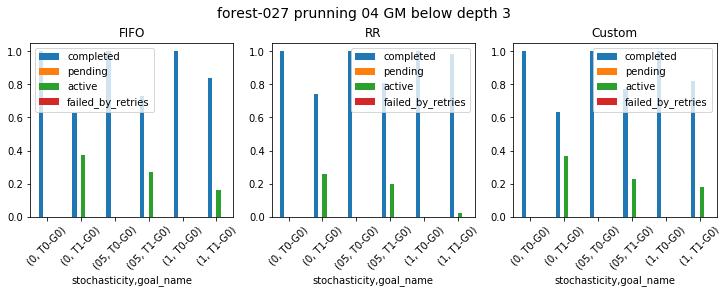

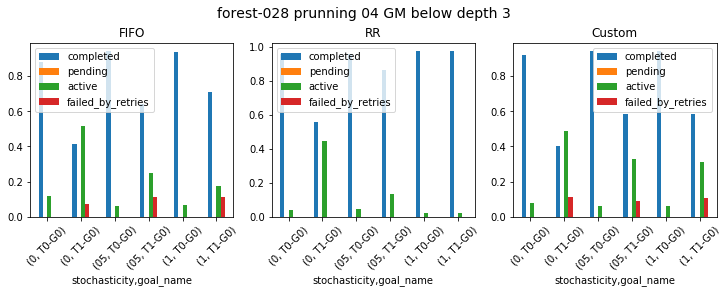

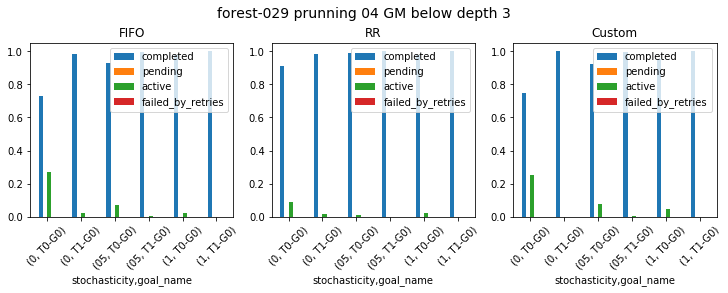

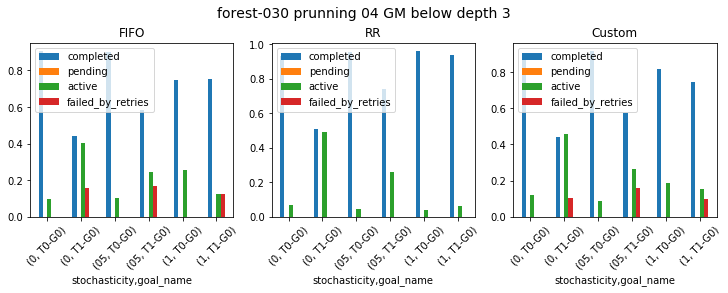

In [117]:
plot_many(df04bellow_ff, df04bellow_rr, df04bellow_cus, "FIFO", "RR", "Custom", "prunning 04 GM below depth 3")

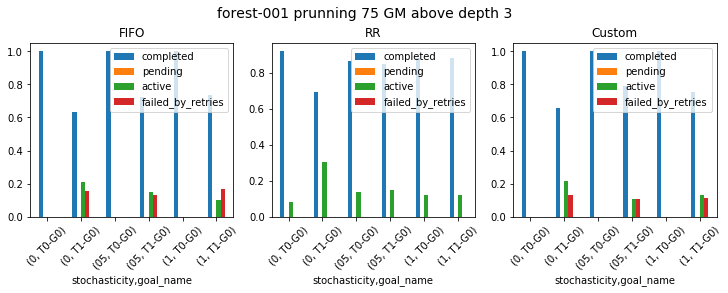

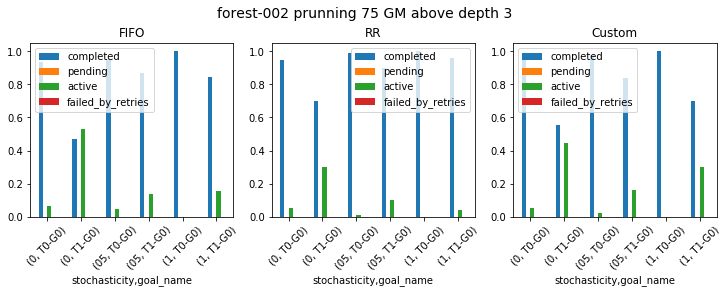

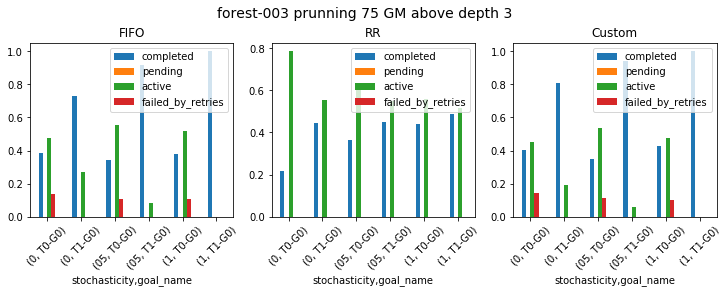

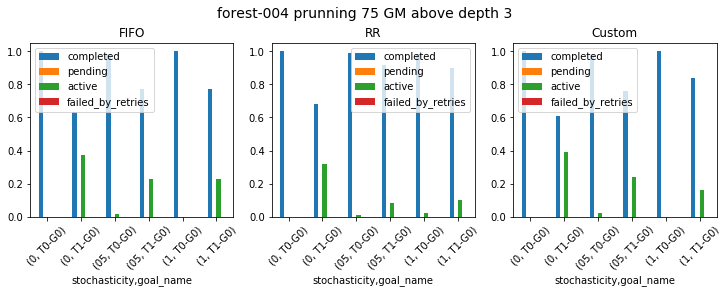

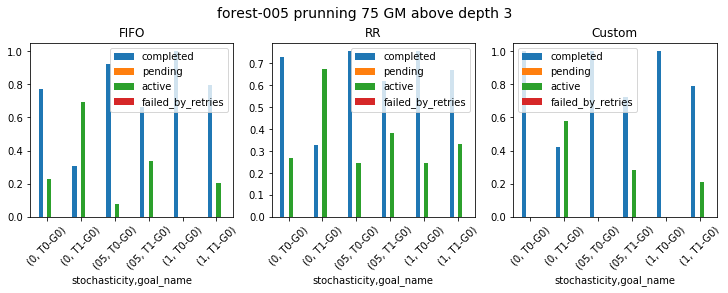

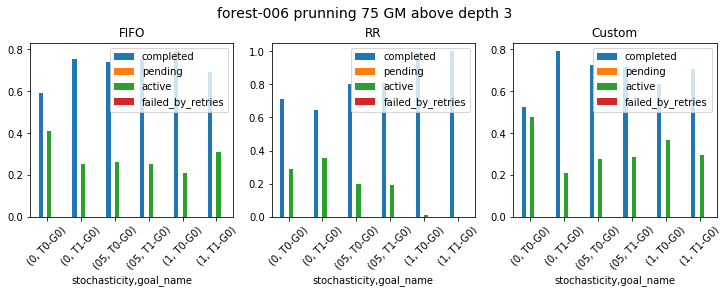

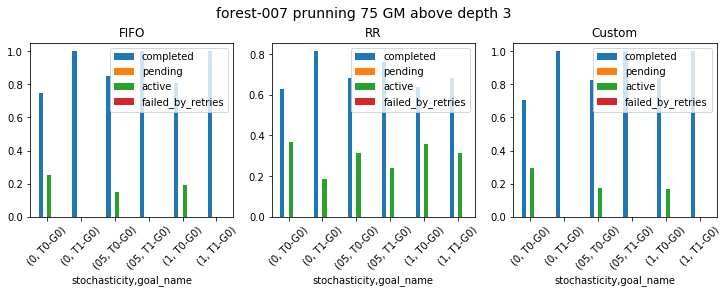

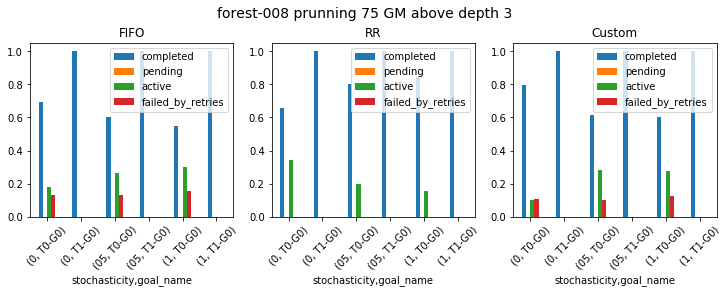

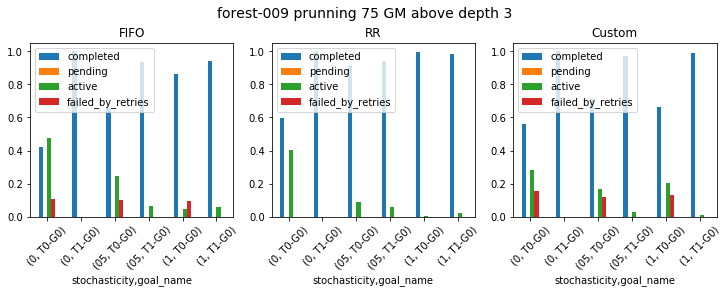

forest-010 not found


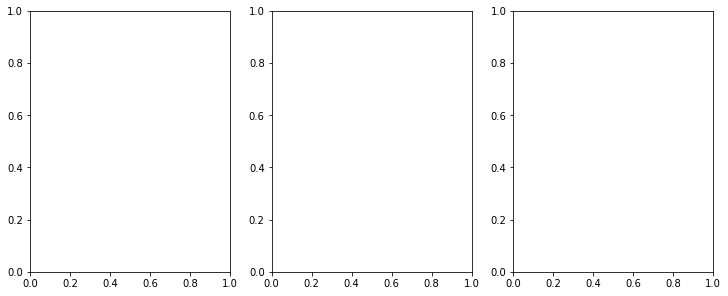

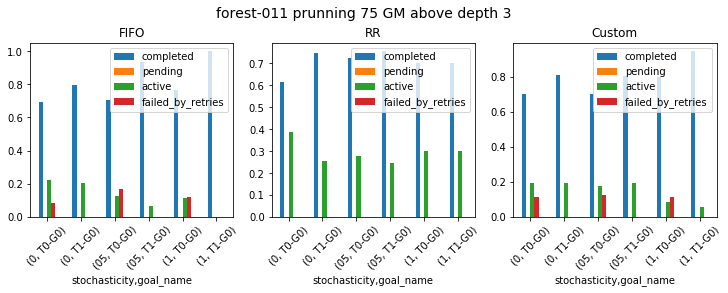

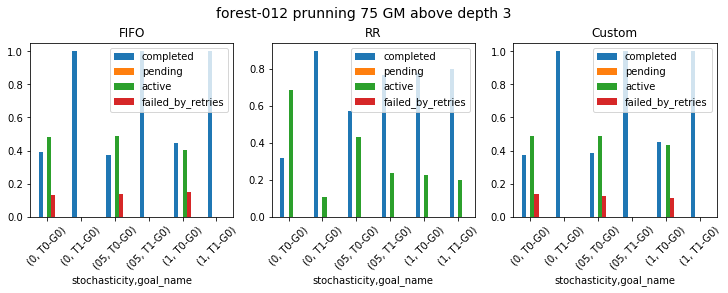

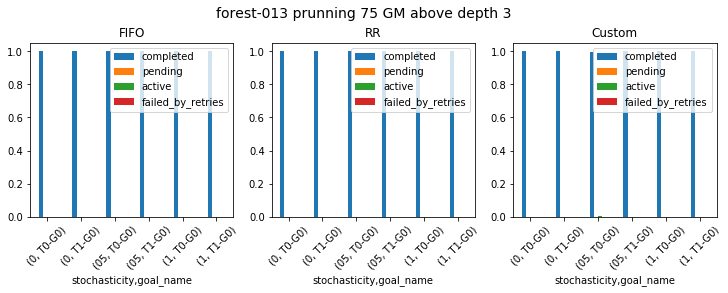

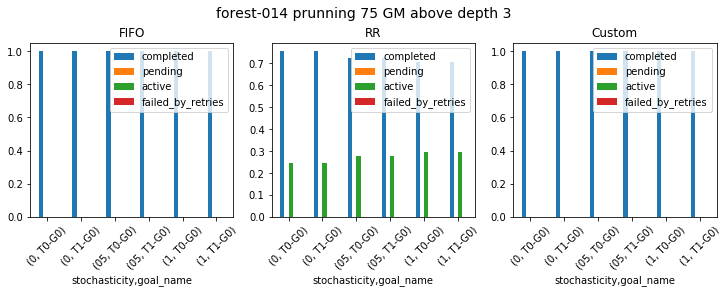

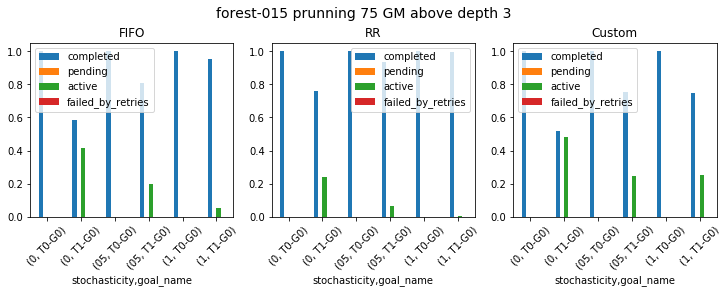

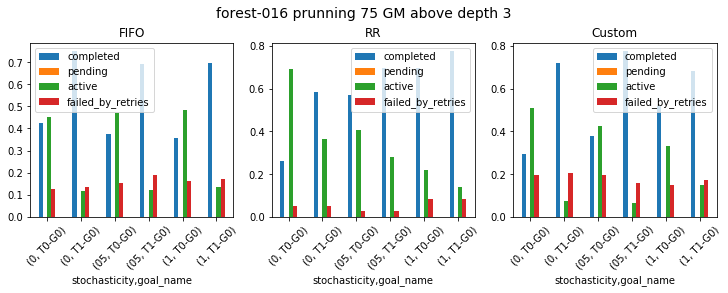

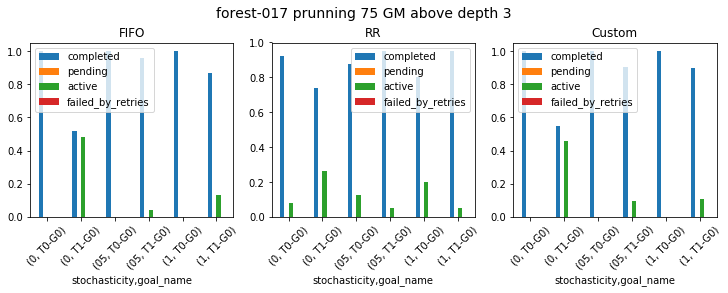

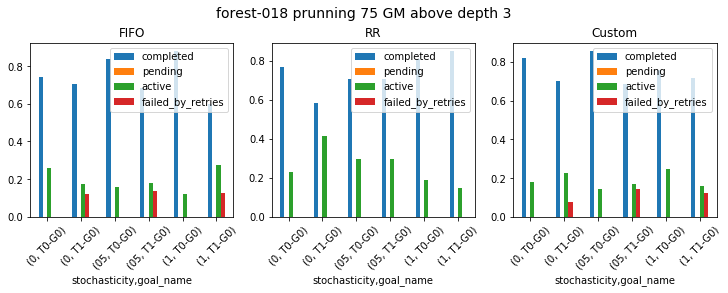

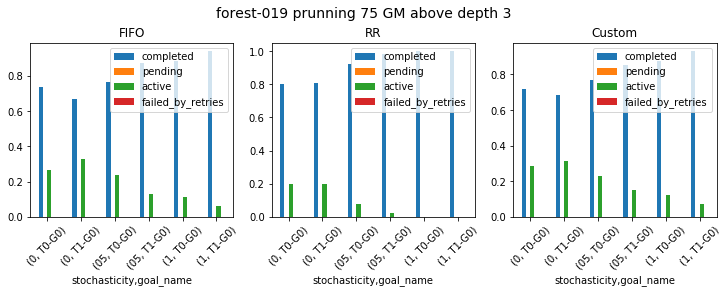

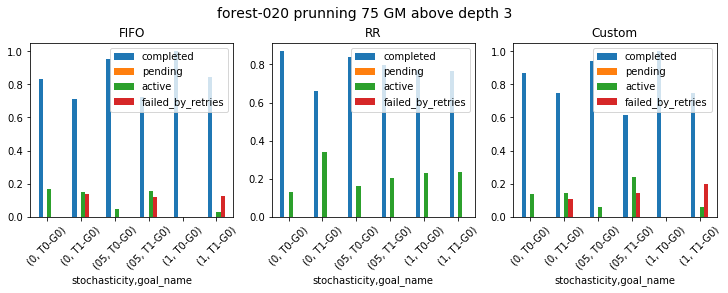

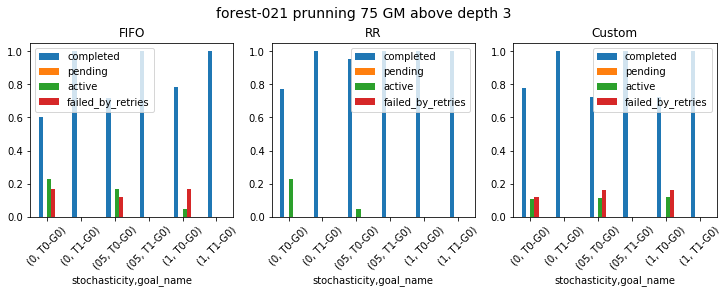

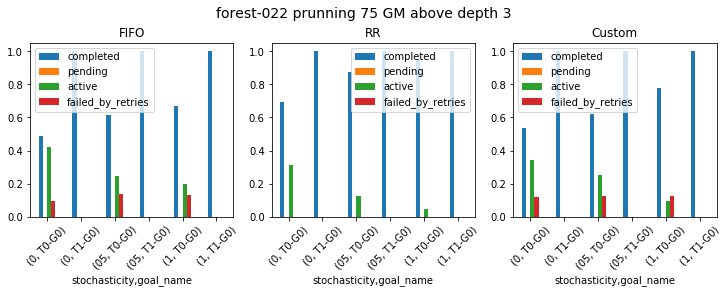

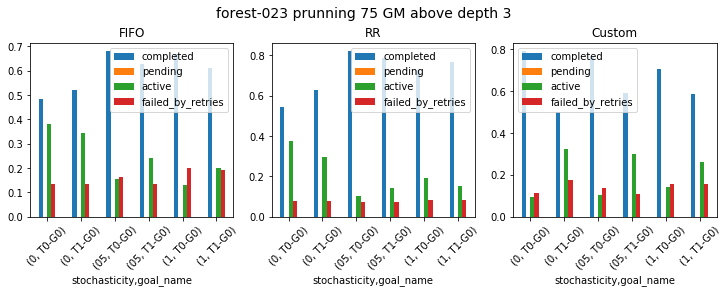

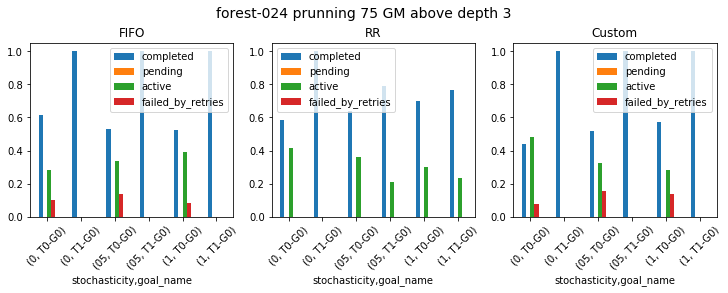

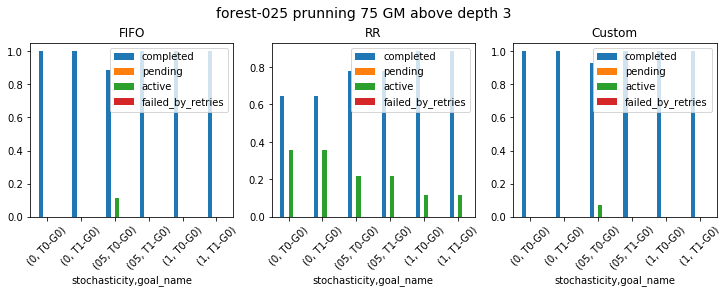

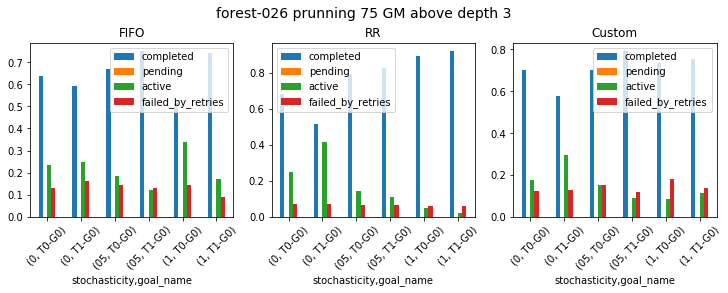

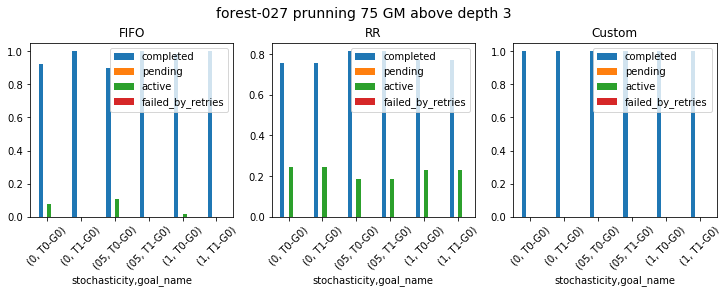

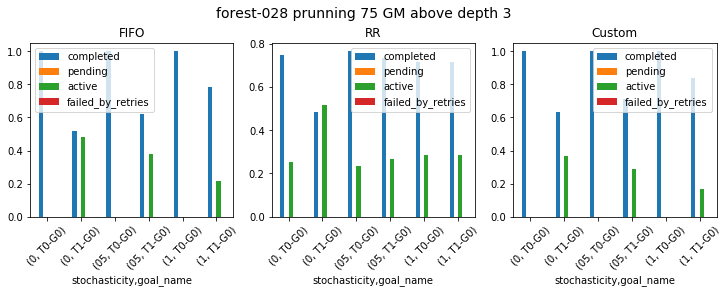

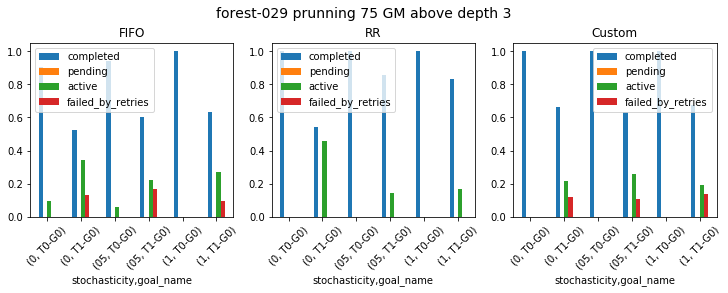

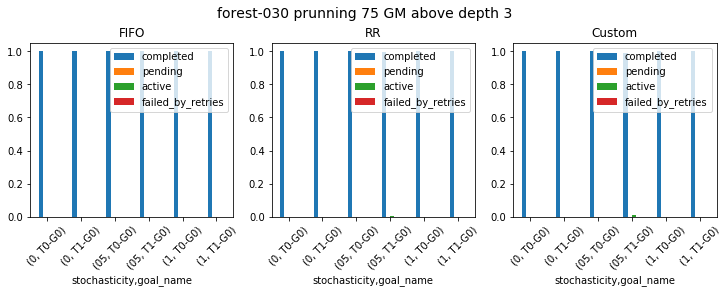

In [118]:
plot_many(df75above_ff, df75above_rr, df75above_cus, "FIFO", "RR", "Custom", "prunning 75 GM above depth 3")

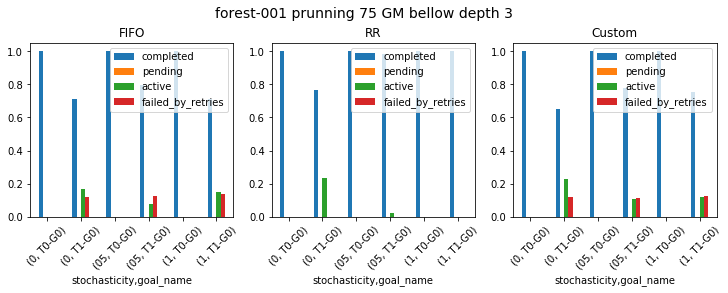

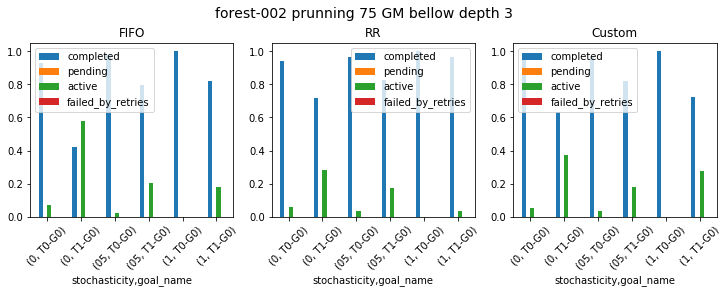

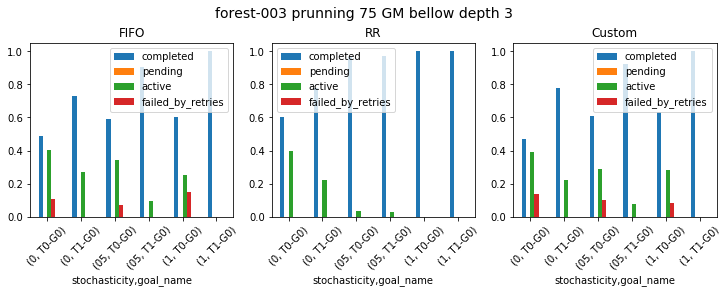

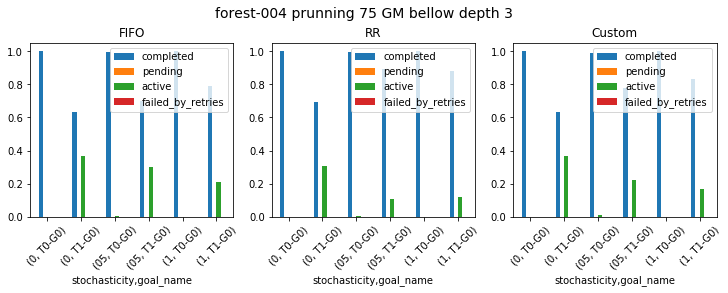

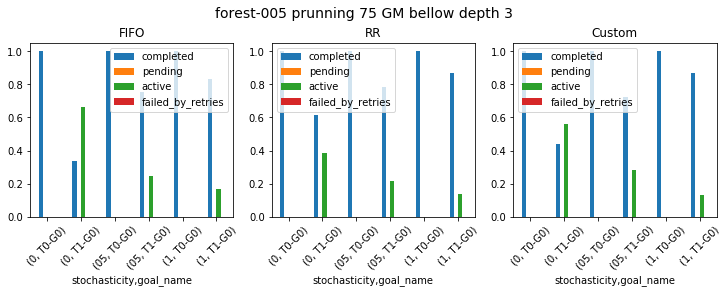

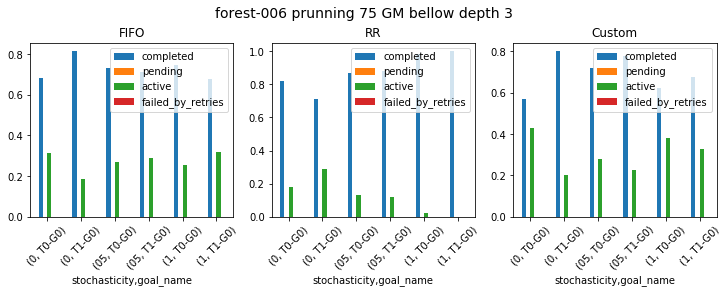

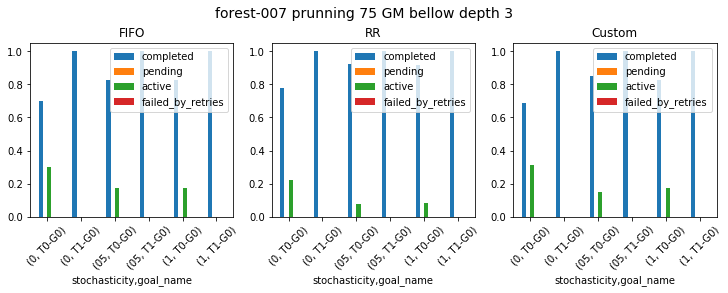

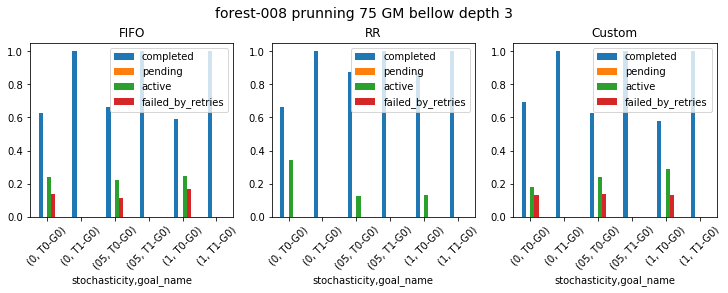

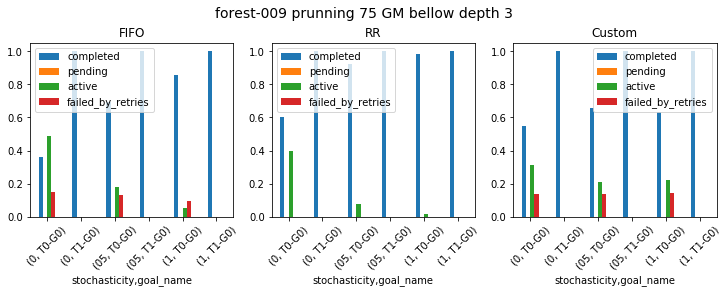

forest-010 not found


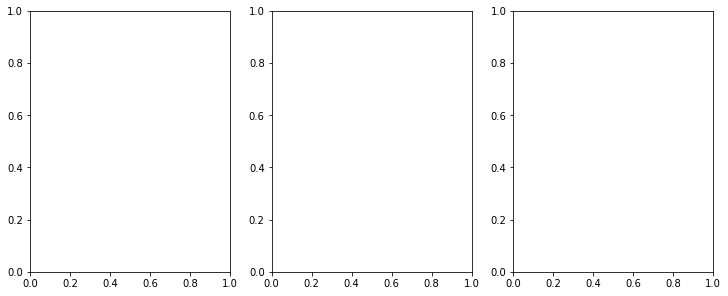

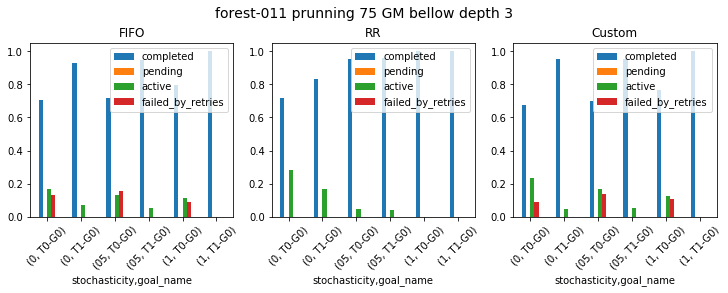

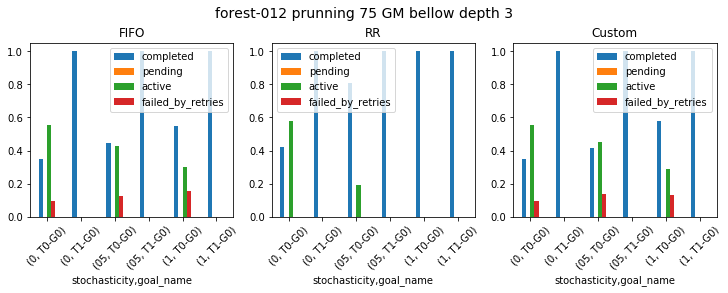

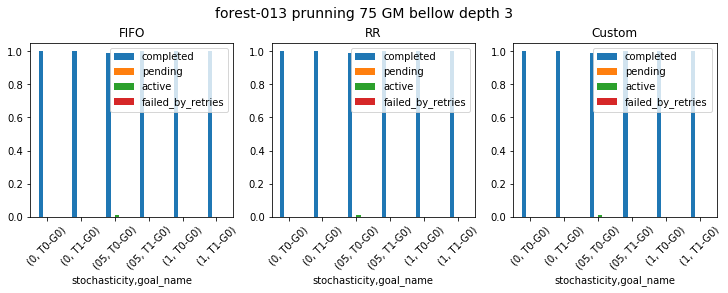

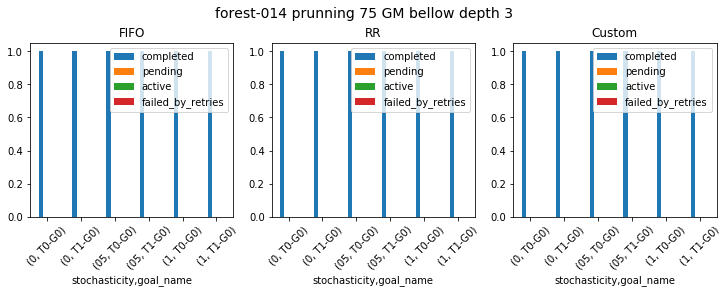

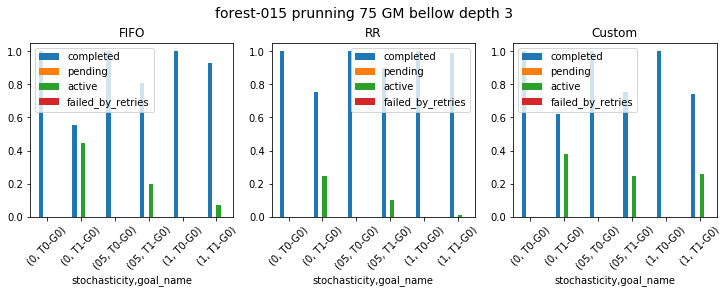

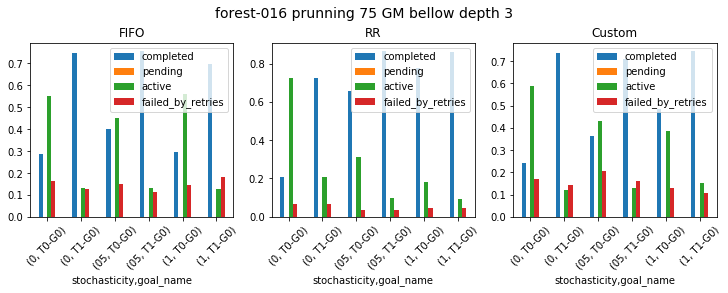

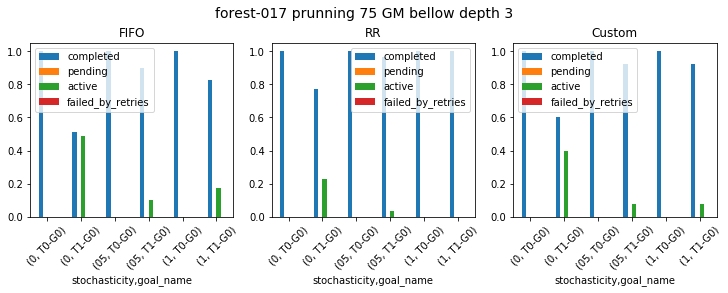

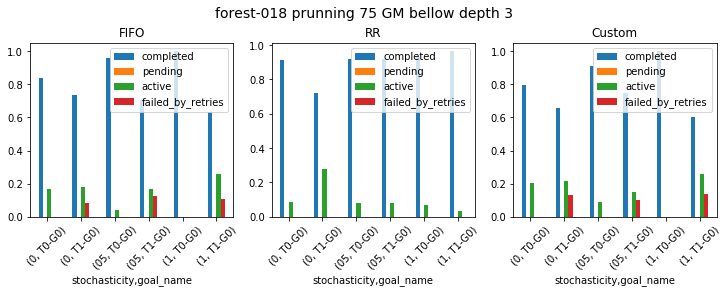

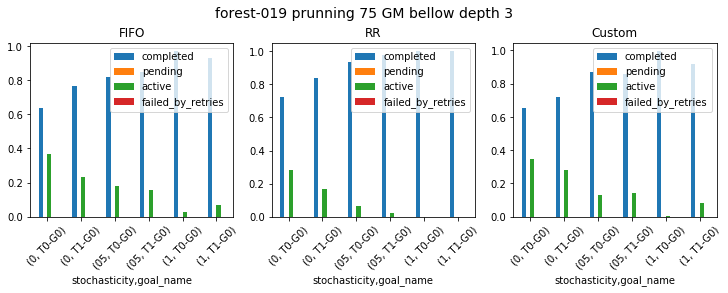

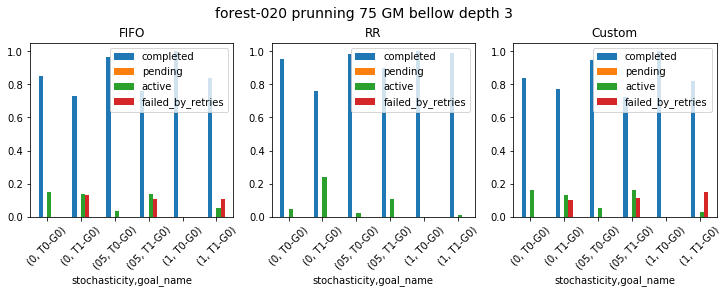

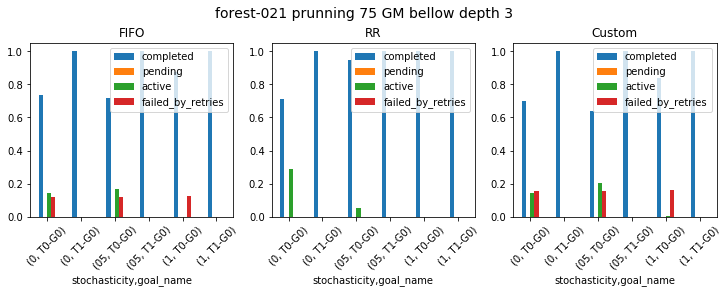

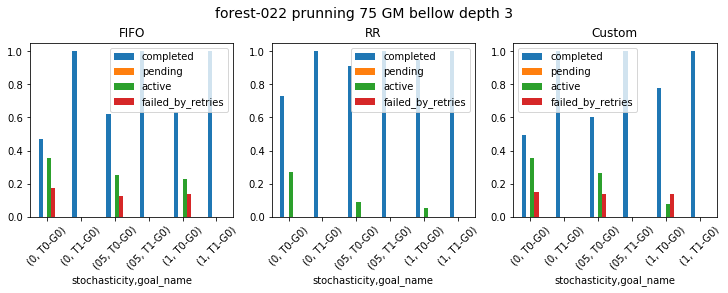

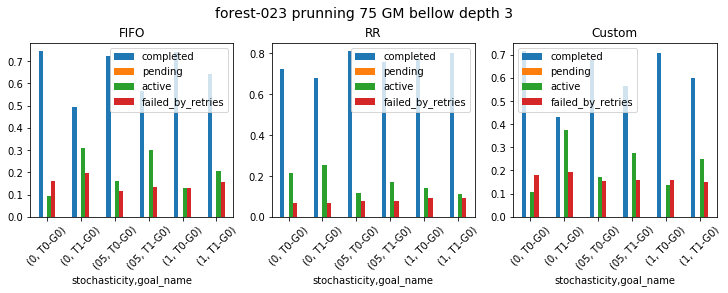

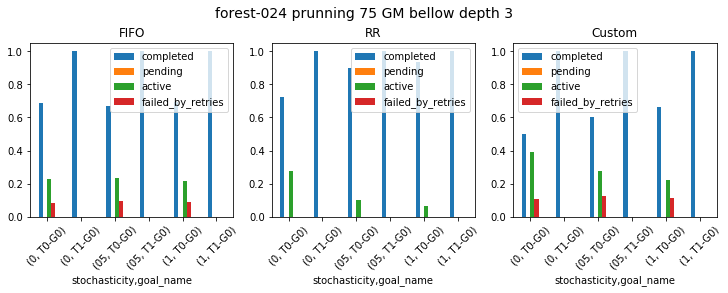

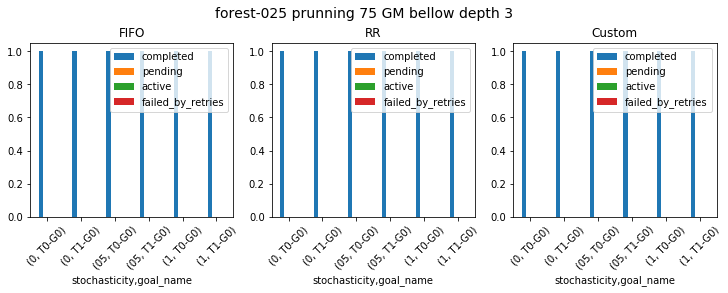

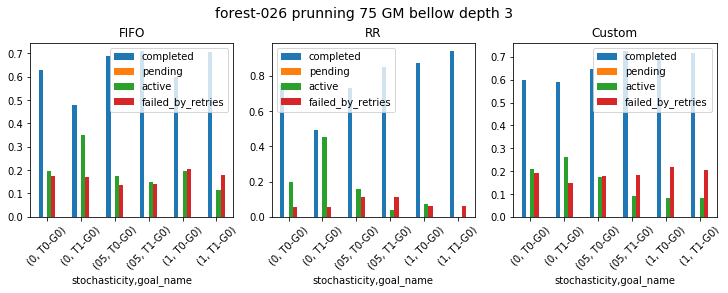

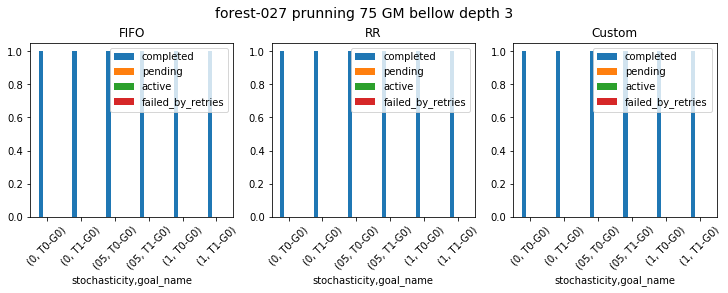

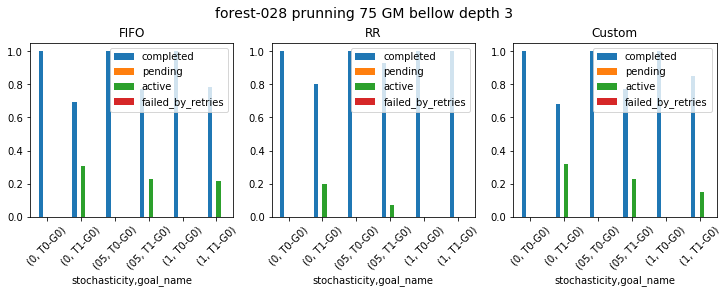

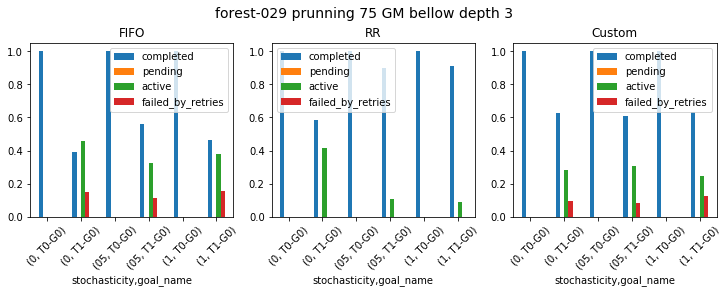

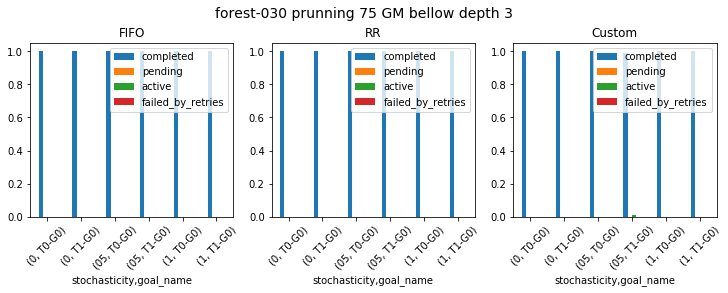

In [119]:
plot_many(df75bellow_ff, df75bellow_rr, df75bellow_cus, "FIFO", "RR", "Custom", "prunning 75 GM bellow depth 3")

In [33]:
def plot_all2(df_list, titles, title):
    nrow=1
    ncol=2
    fig, axes = plt.subplots(nrow, ncol)
    fig.suptitle(title, fontsize=16)


    count=0
    for r in range(nrow):
        for c in range(ncol):
            
            df = df_list[count][['completed', 'pending', 'active', 'failed_by_retries']]
            
#             print(titles[count])
            
            ax = df.astype(float).plot(ax=axes[r,c], kind='box', title=titles[count] , figsize=(12,8))
            for p in ax.patches:
                ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))

            plt.sca(axes[r,c])
            plt.xticks(np.arange(1, 5), ("C", "P", "A", "R"))

            count = count + 1
    
#     plt.title(title, x= -0.7, y = 2.4)
    plt.show()

In [159]:
def plot_many3(df0, df1, df2, title0, title1, title2, loc, category):
    
    trees = ['T0-G0', 'T1-G0']
    
    for i in range(1,31):
        
        file_name = get_file_name(i)
        
        try:
            df0_copy = df0.copy()
            df1_copy = df1.copy()
            df2_copy = df2.copy()
            
            df0_copy = df0_copy[['goal_name','completed', 'pending', 'active', 'failed_by_retries']]
            df1_copy = df1_copy[['goal_name','completed', 'pending', 'active', 'failed_by_retries']]
            df2_copy = df2_copy[['goal_name','completed', 'pending', 'active', 'failed_by_retries']]
            
            df0_new = get_proportion_df(df0_copy)
            df1_new = get_proportion_df(df1_copy)
            df2_new = get_proportion_df(df2_copy)
            
            if(tree_loc[i][loc] == 0):
                df0_new["goal_name"].replace('T0-G0', 'T0-G0, has GM', inplace=True)
                df0_new["goal_name"].replace('T1-G0', 'T1-G0, no GM', inplace=True)
        
                df1_new["goal_name"].replace('T0-G0', 'T0-G0, has GM', inplace=True)
                df1_new["goal_name"].replace('T1-G0', 'T1-G0, no GM', inplace=True)
                
                df2_new["goal_name"].replace('T0-G0', 'T0-G0, has GM', inplace=True)
                df2_new["goal_name"].replace('T1-G0', 'T1-G0, no GM', inplace=True)
            else:
                df0_new["goal_name"].replace('T1-G0', 'T1-G0, has GM', inplace=True)
                df0_new["goal_name"].replace('T0-G0', 'T0-G0, no GM', inplace=True)
                
                df1_new["goal_name"].replace('T1-G0', 'T0-G0, has GM', inplace=True)
                df1_new["goal_name"].replace('T0-G0', 'T1-G0, no GM', inplace=True)
                
                df2_new["goal_name"].replace('T1-G0', 'T0-G0, has GM', inplace=True)
                df2_new["goal_name"].replace('T0-G0', 'T1-G0, no GM', inplace=True)
                

            df0_new.drop(df0_new.loc[df0['forest_name']!= file_name].index, inplace=True)
            df1_new.drop(df1_new.loc[df1['forest_name']!= file_name].index, inplace=True)
            df2_new.drop(df2_new.loc[df2['forest_name']!= file_name].index, inplace=True)

            fig, axs = plt.subplots(1,3, constrained_layout=True, figsize=(10,4))

            df0_new.groupby(['goal_name']).sum().plot(kind='bar' , ax=axs[0])
            df1_new.groupby(['goal_name']).sum().plot(kind='bar' , ax=axs[1])
            df2_new.groupby(['goal_name']).sum().plot(kind='bar' , ax=axs[2])

            axs[1].set_title(title1)
            axs[0].set_title(title0)
            axs[2].set_title(title2)
            plt.setp( axs[0].xaxis.get_majorticklabels(), rotation=0 )
            plt.setp( axs[1].xaxis.get_majorticklabels(), rotation=0 )
            plt.setp( axs[2].xaxis.get_majorticklabels(), rotation=0 )
            fig.suptitle((file_name + " " + category), fontsize=14)
            
            plt.show()
        except Exception as e:
            print(e)
            print(file_name + " not found")

        

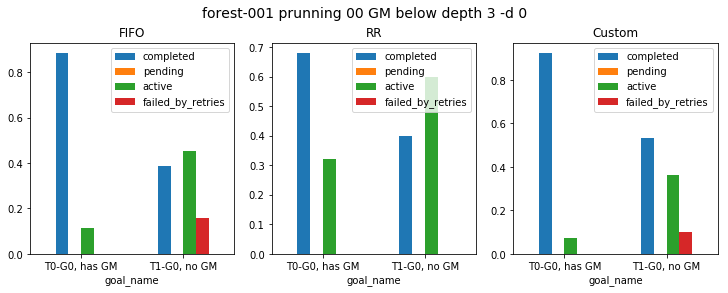

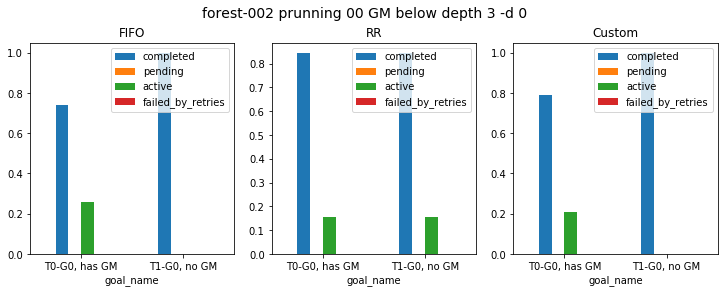

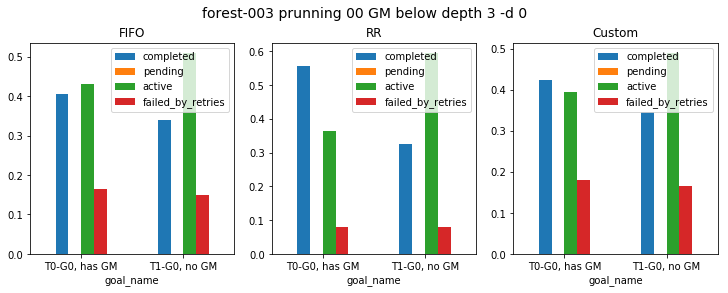

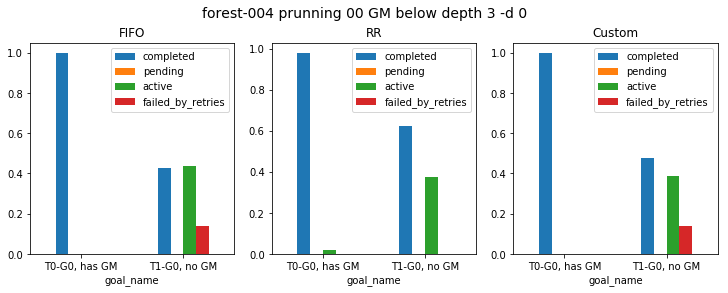

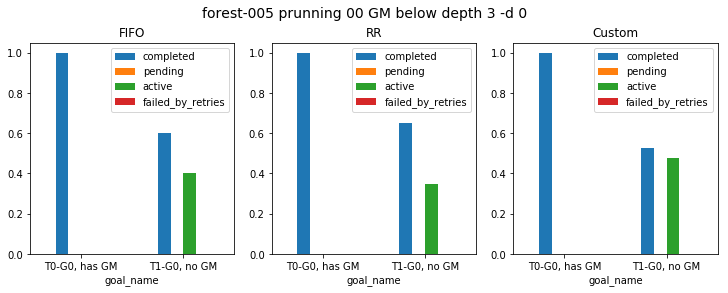

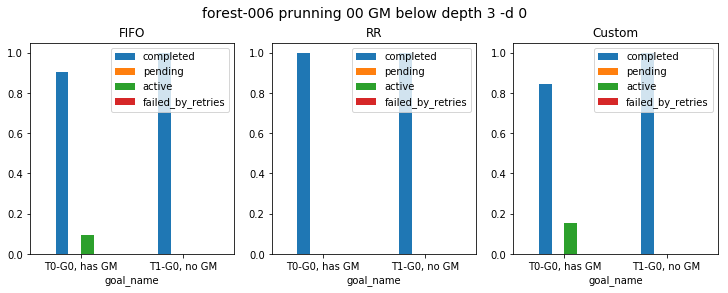

Empty 'DataFrame': no numeric data to plot
forest-007 not found


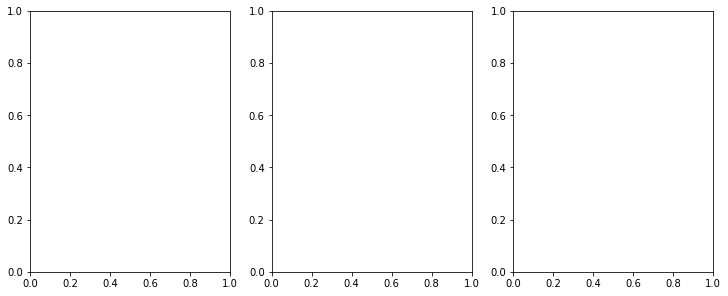

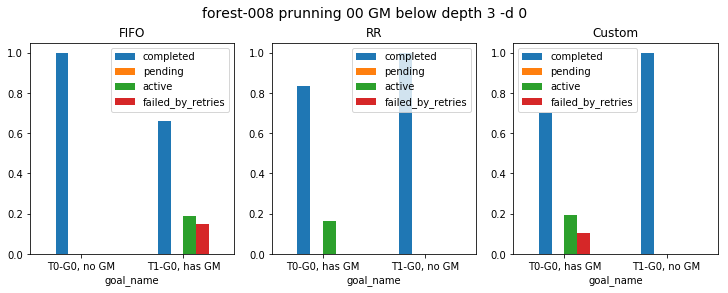

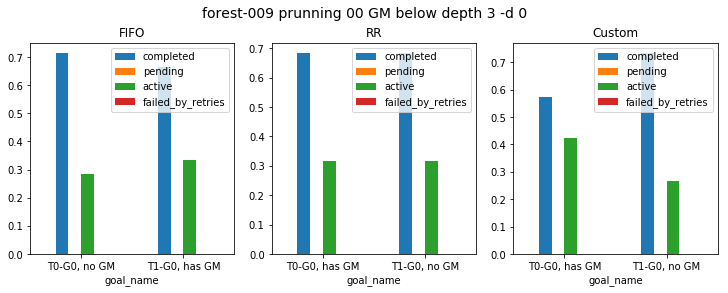

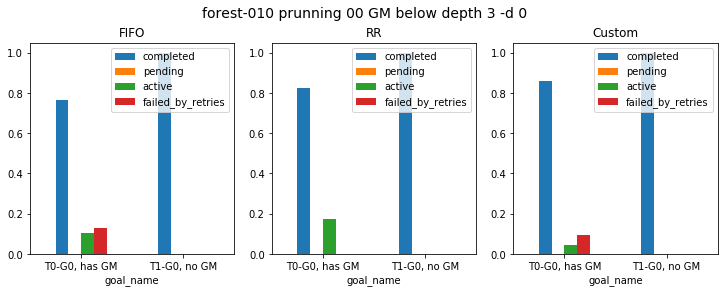

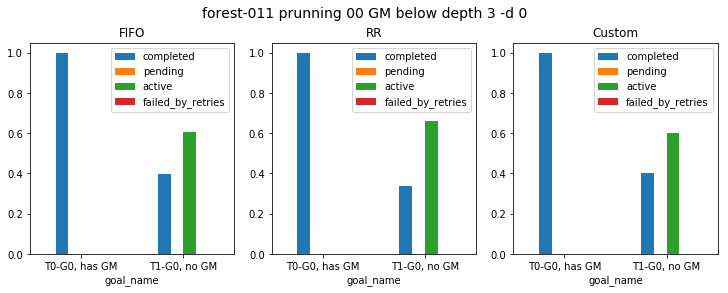

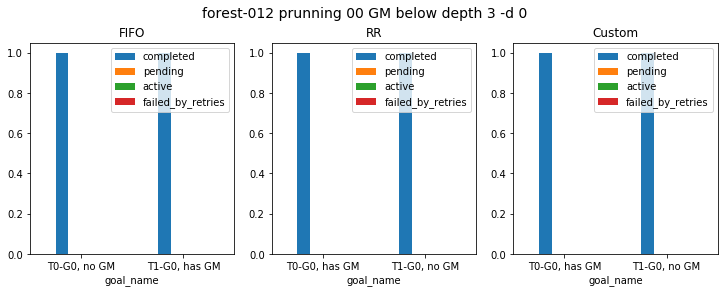

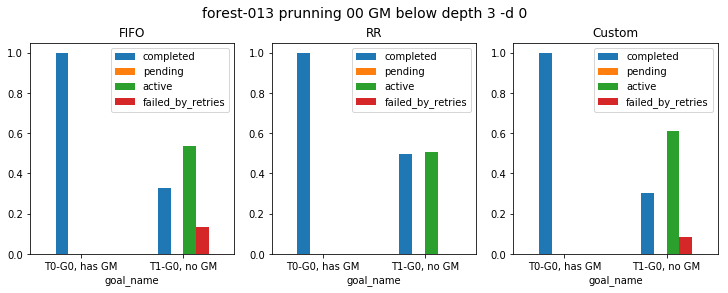

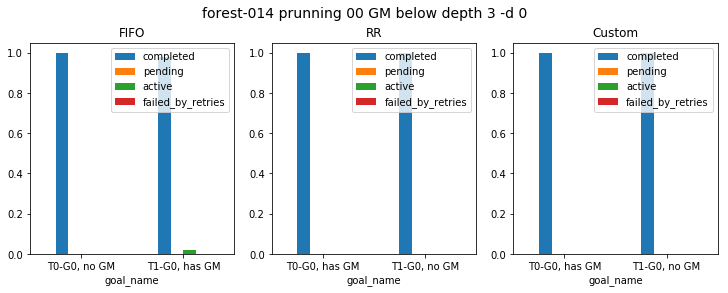

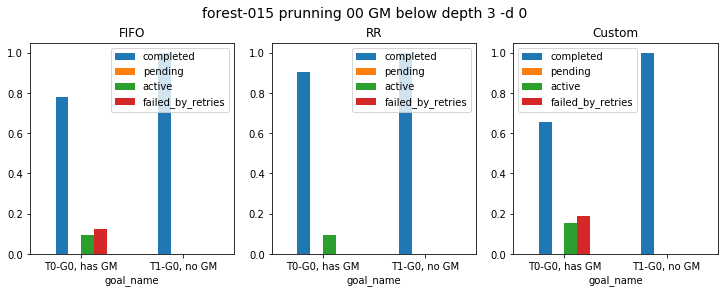

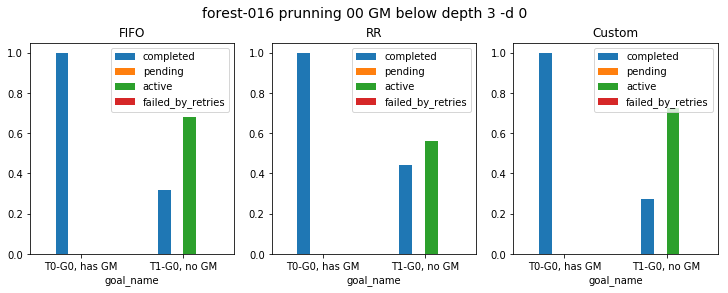

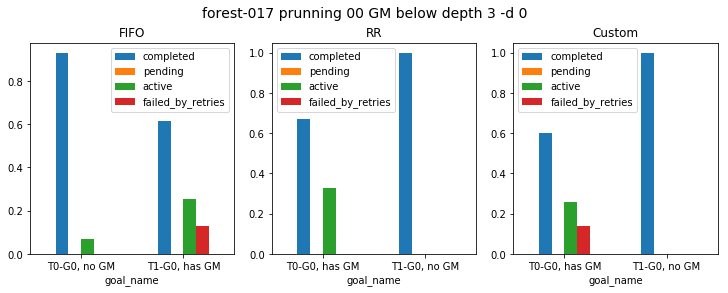

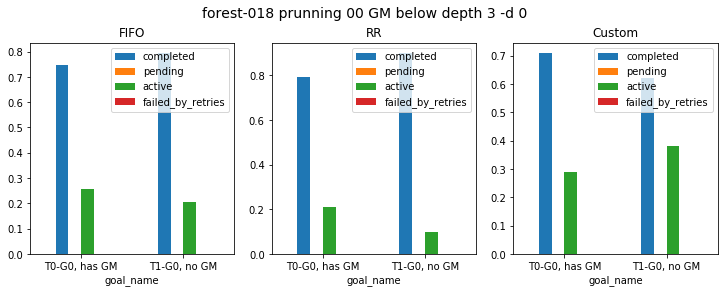

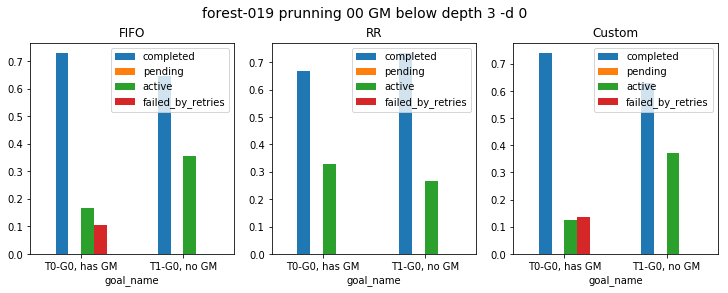

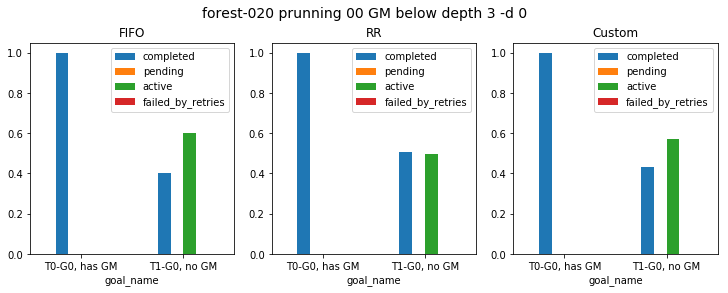

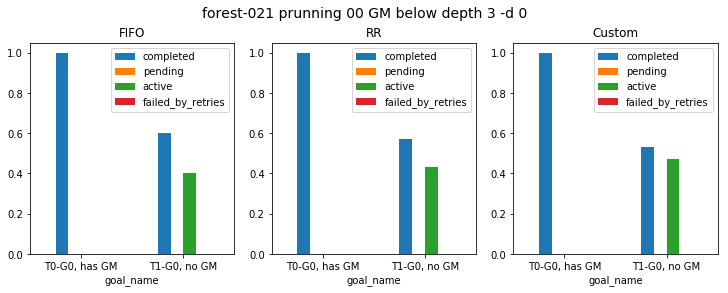

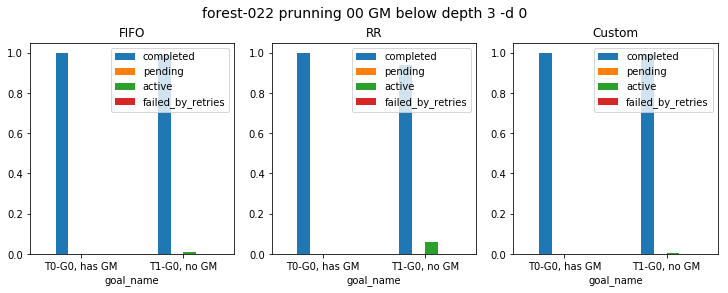

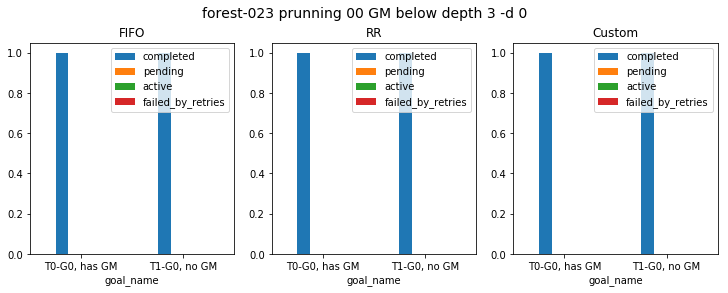

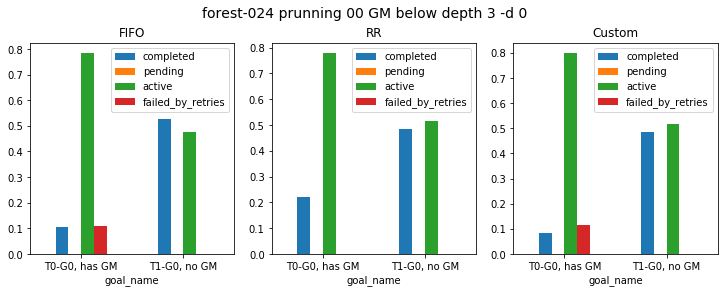

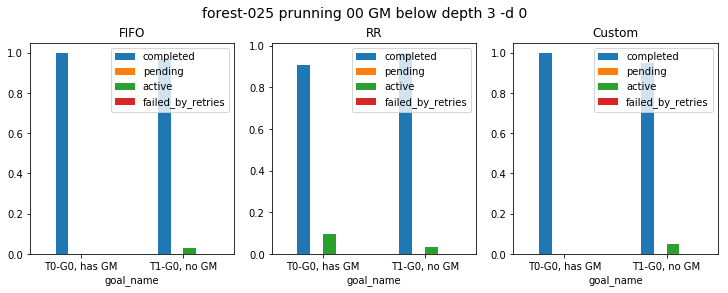

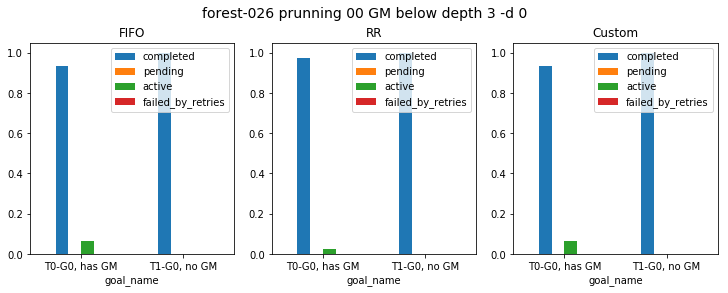

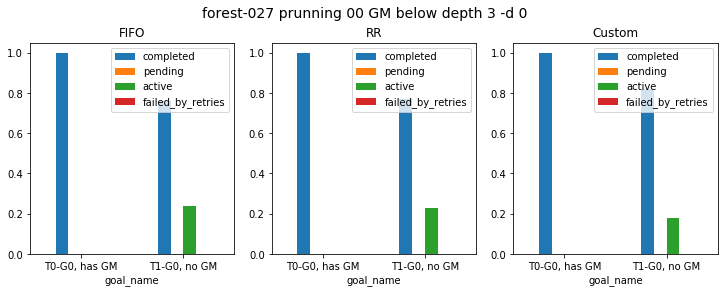

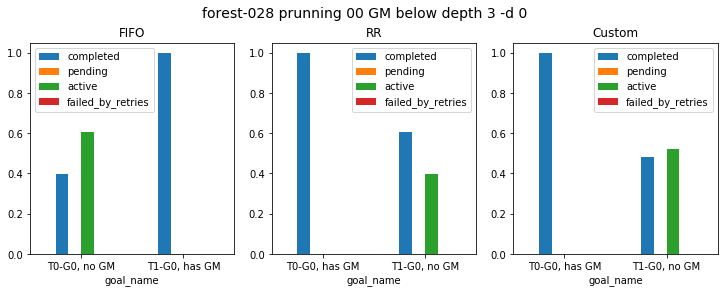

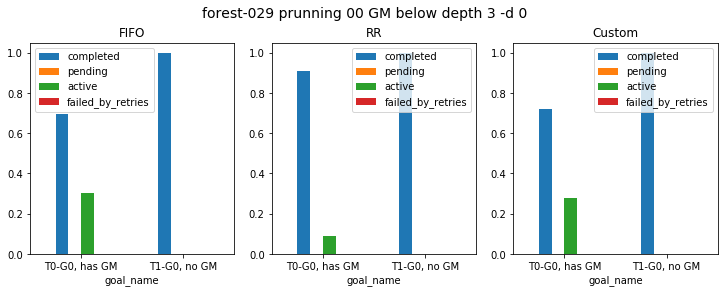

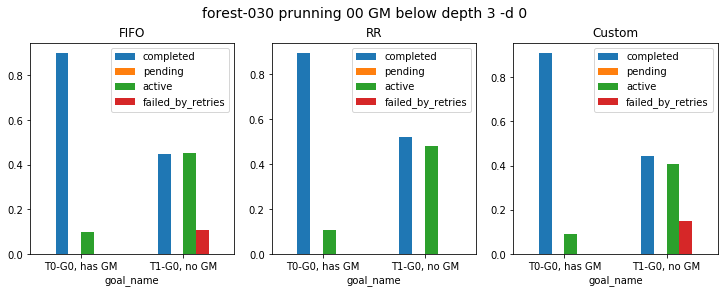

In [127]:
plot_many3(df00above_00_ff, df00above_00_rr, df00above_00_cus, "FIFO", "RR", "Custom", "above00", "prunning 00 GM below depth 3 -d 0")

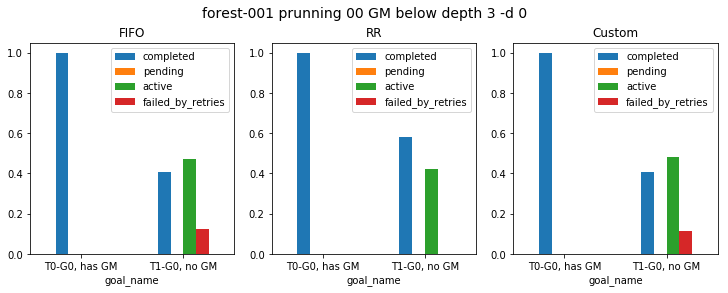

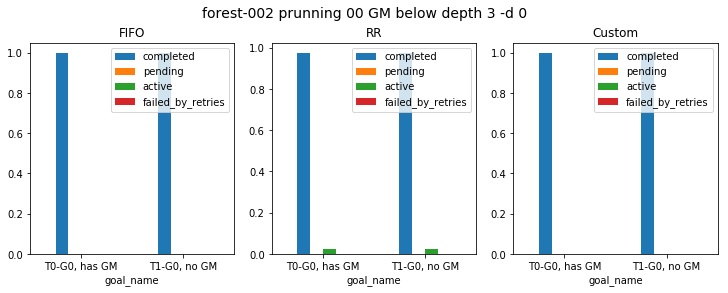

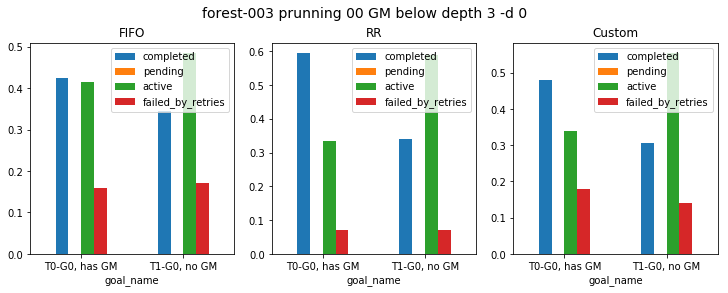

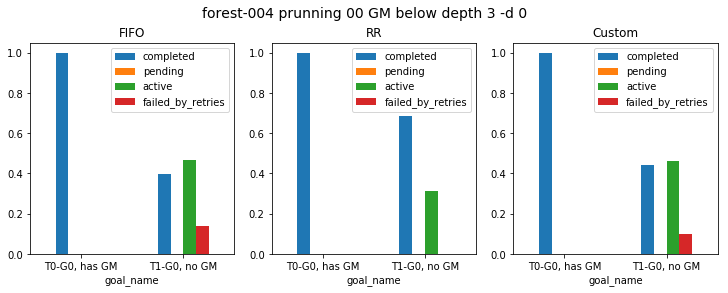

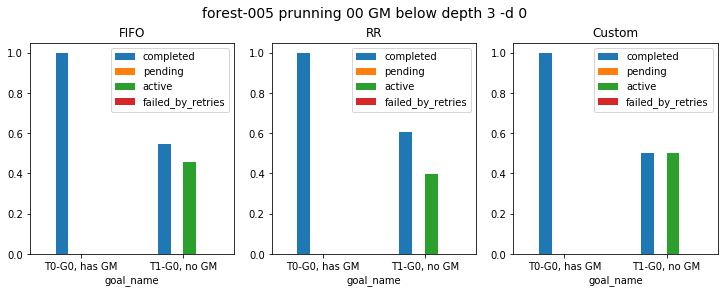

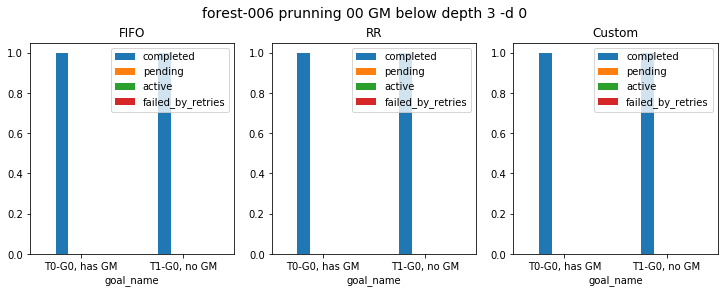

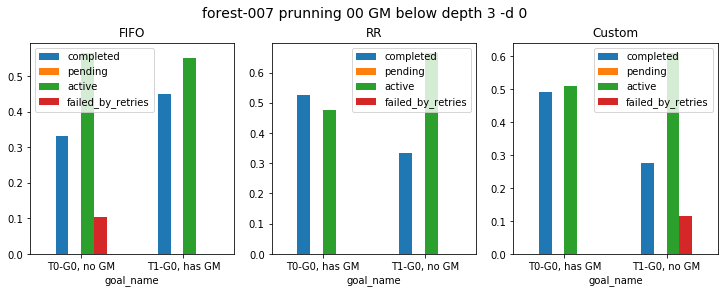

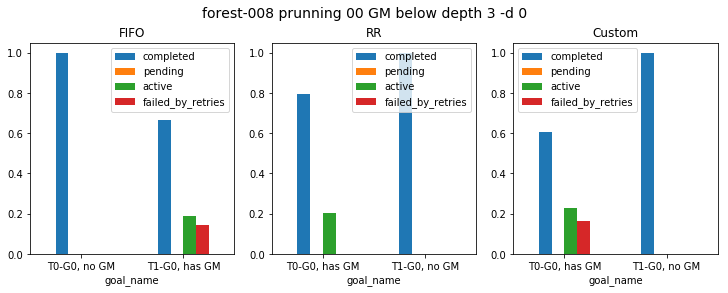

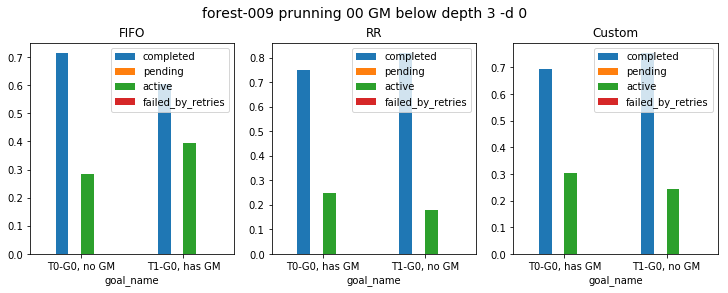

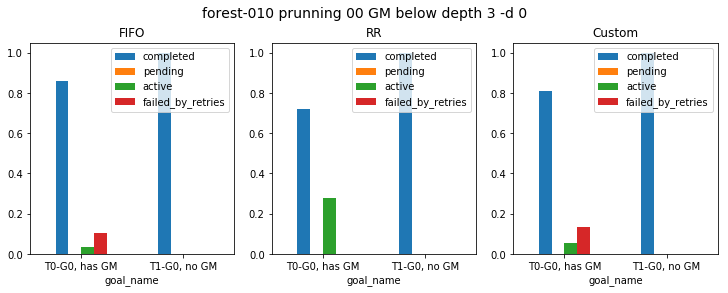

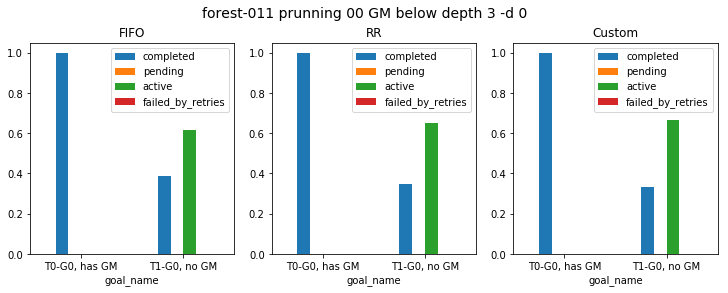

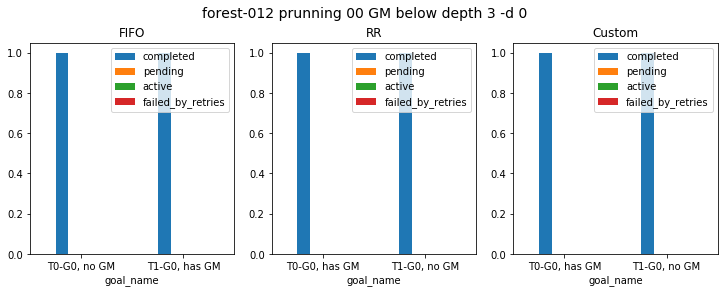

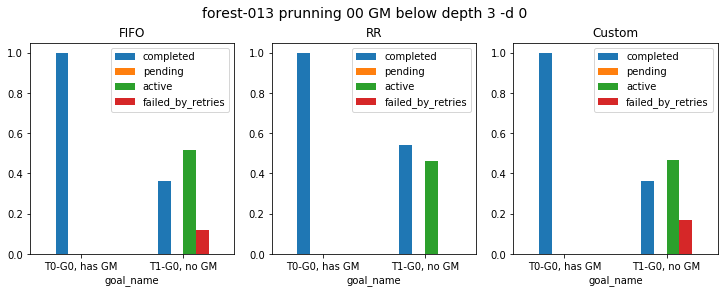

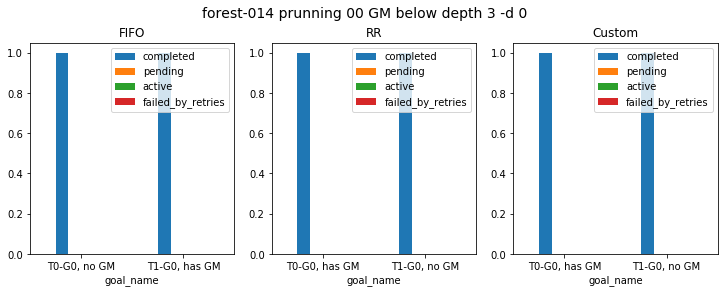

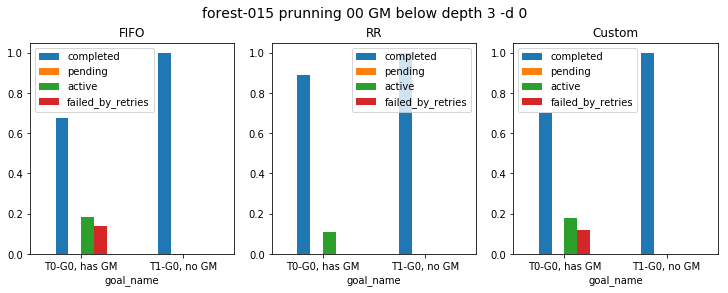

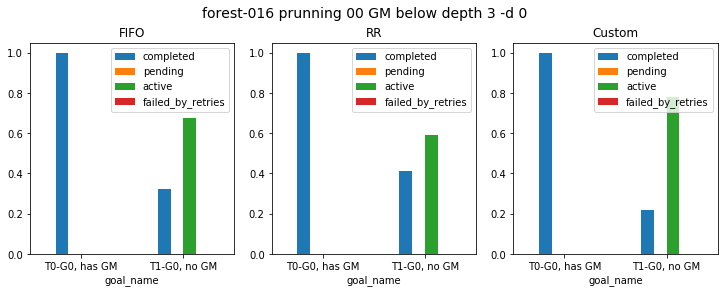

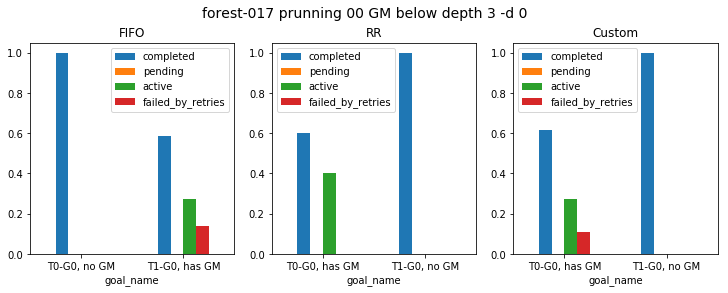

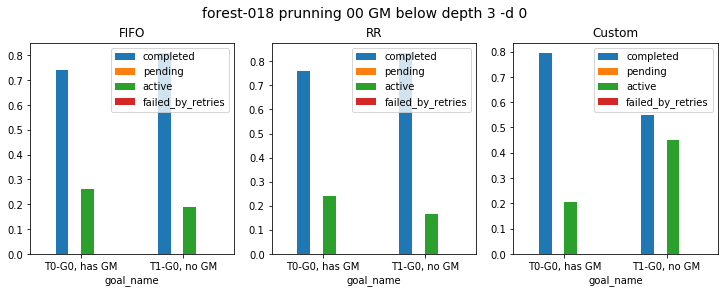

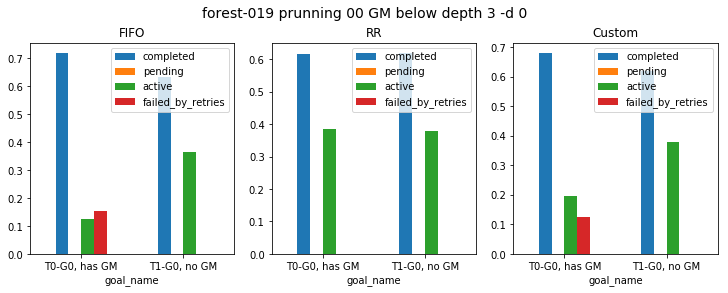

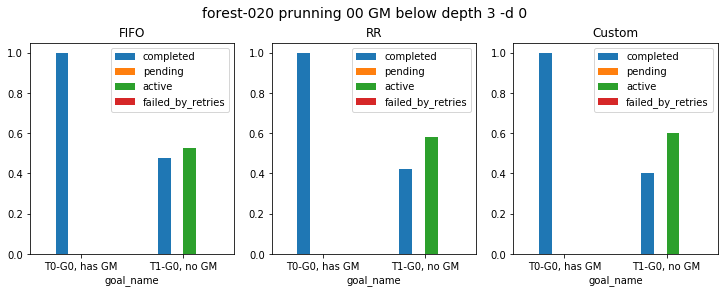

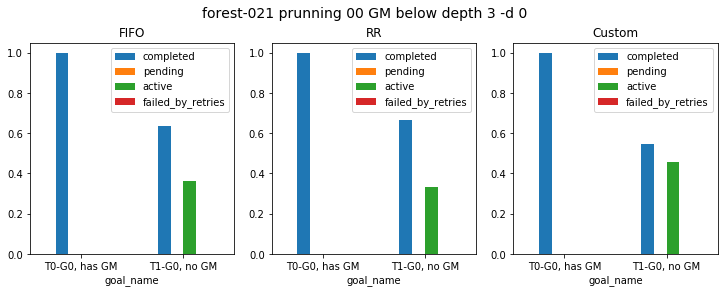

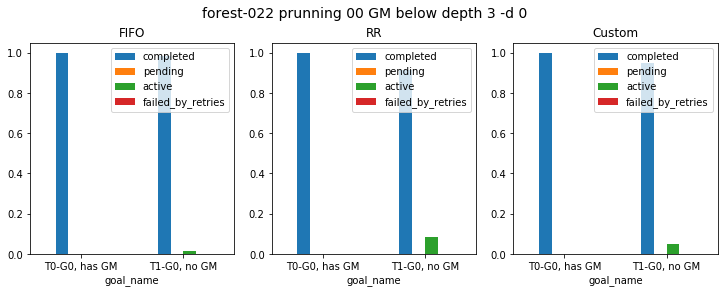

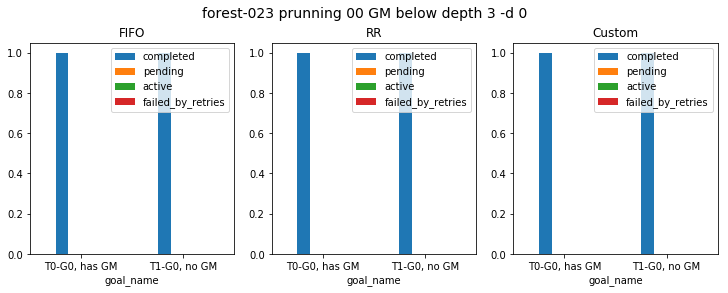

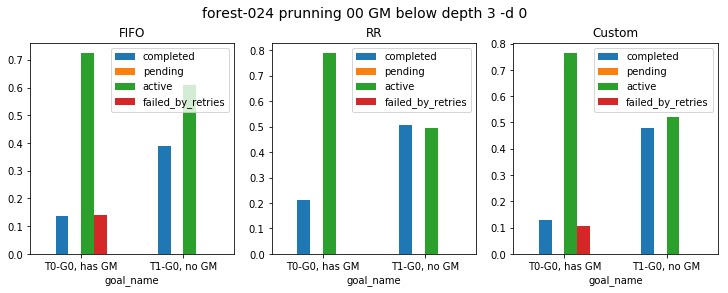

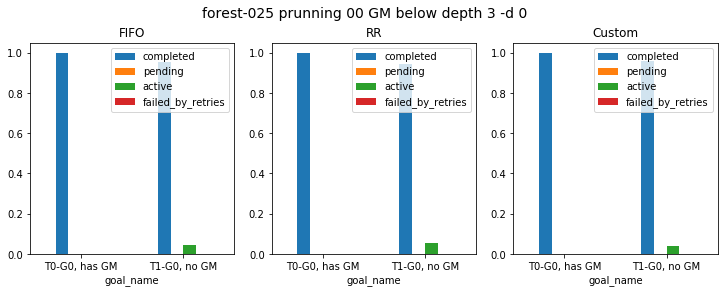

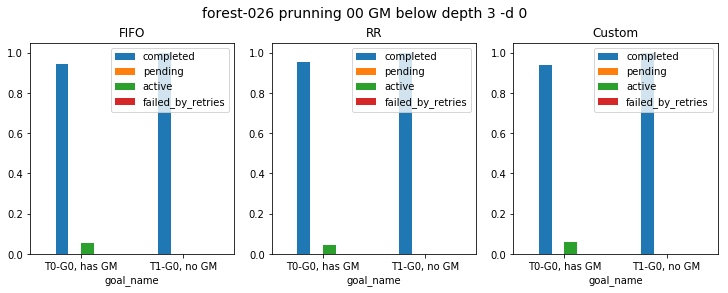

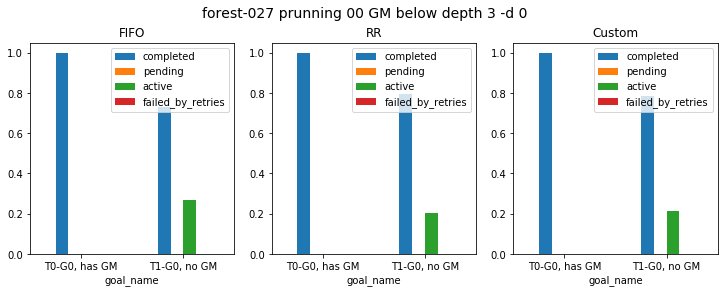

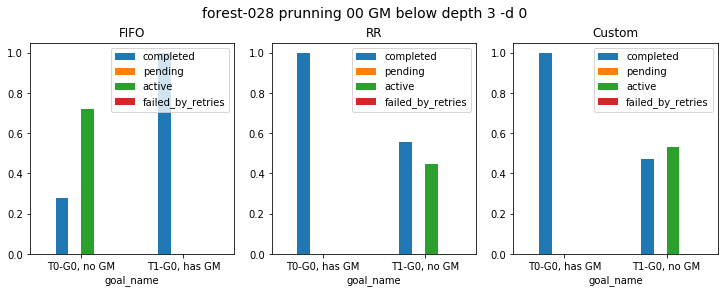

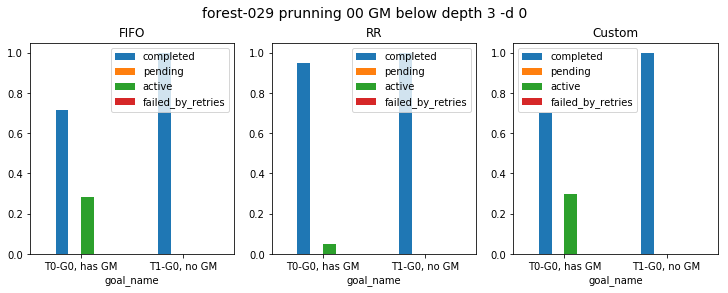

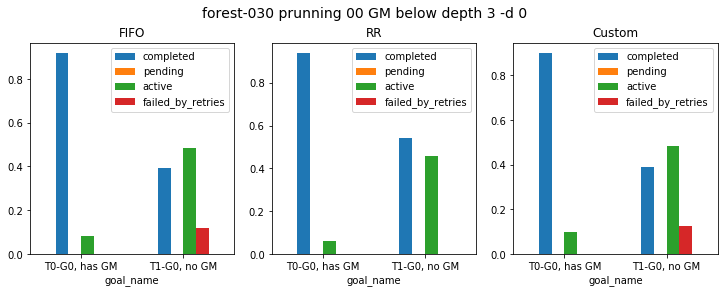

In [128]:
plot_many3(df00bellow_00_ff, df00bellow_00_rr, df00bellow_00_cus,"FIFO", "RR", "Custom", "below00", "prunning 00 GM below depth 3 -d 0")

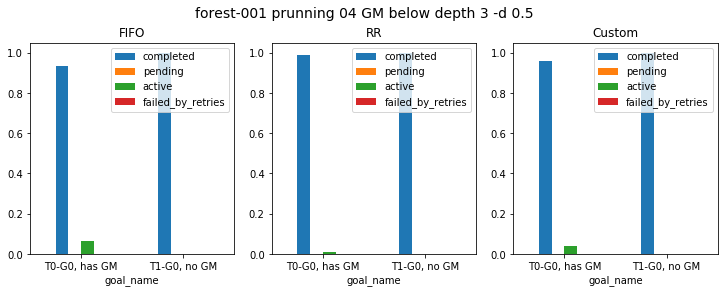

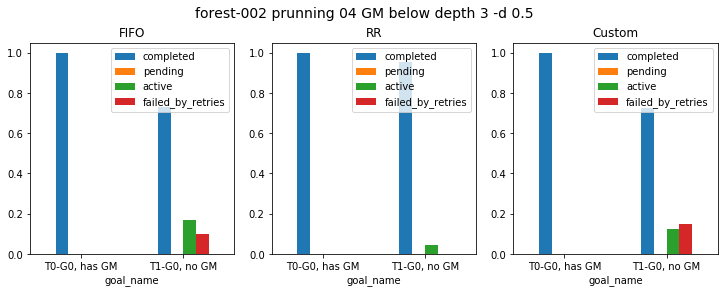

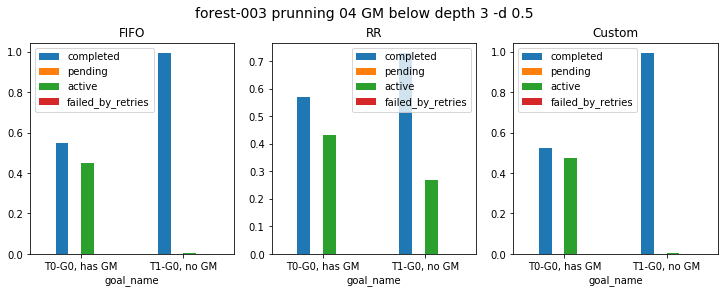

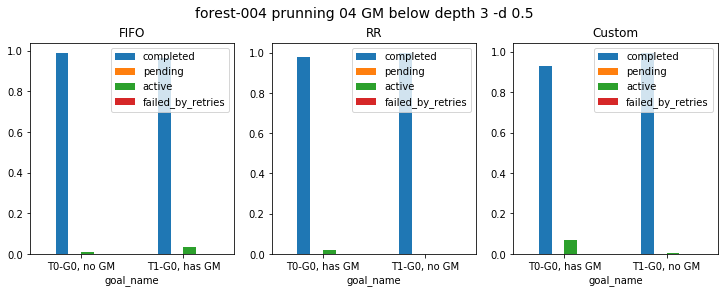

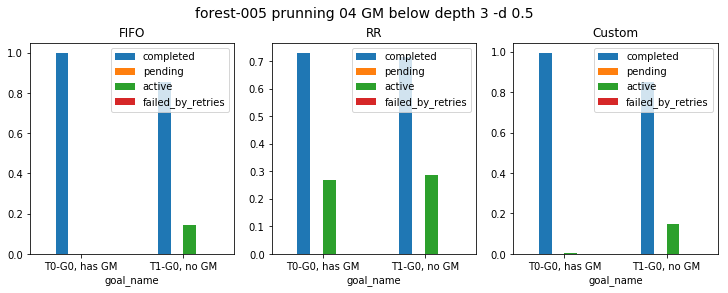

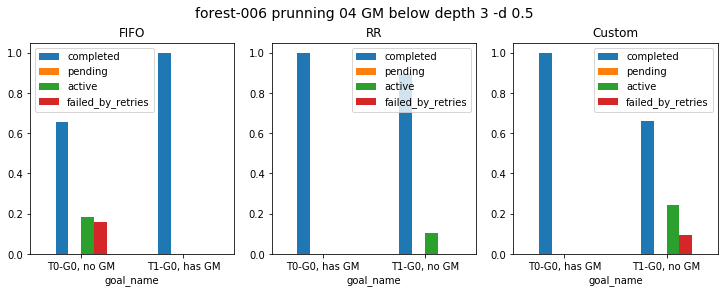

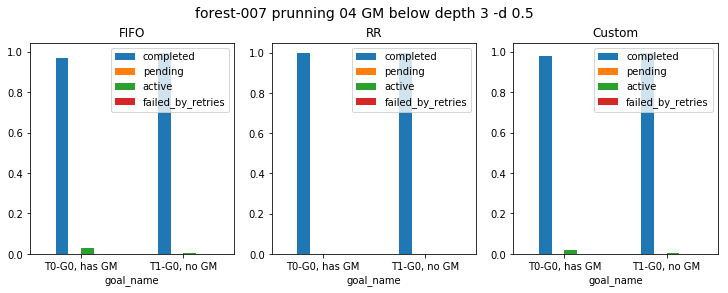

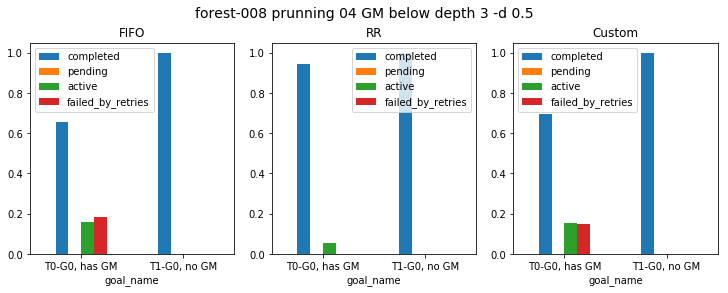

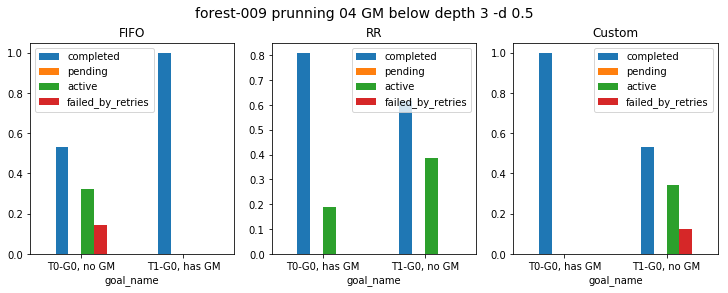

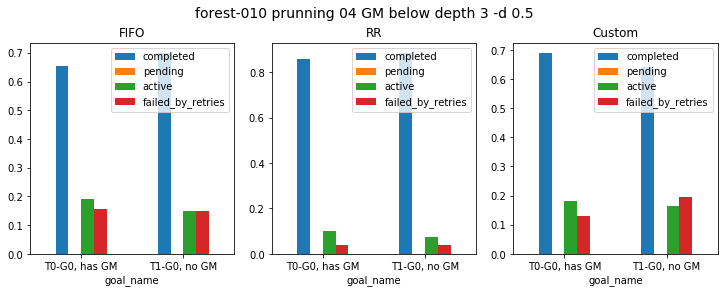

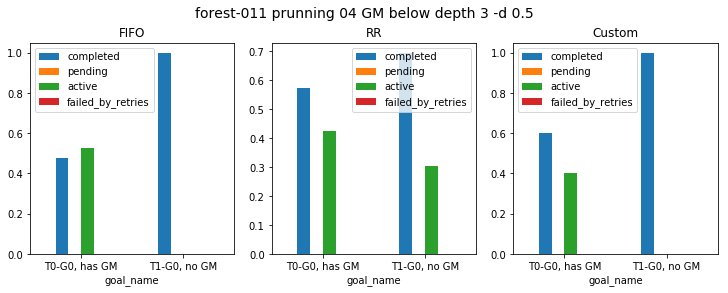

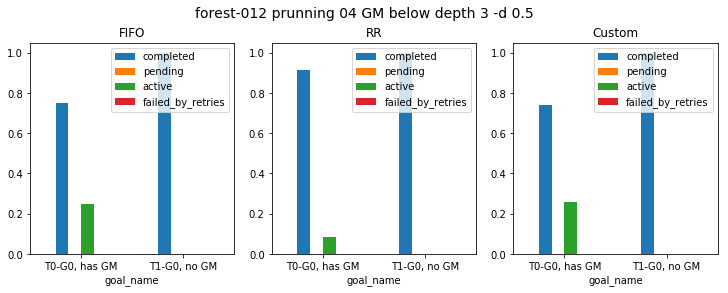

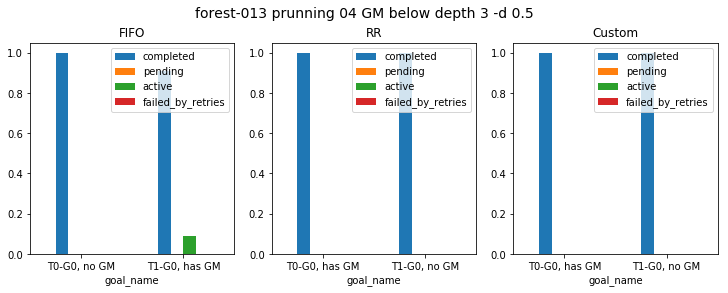

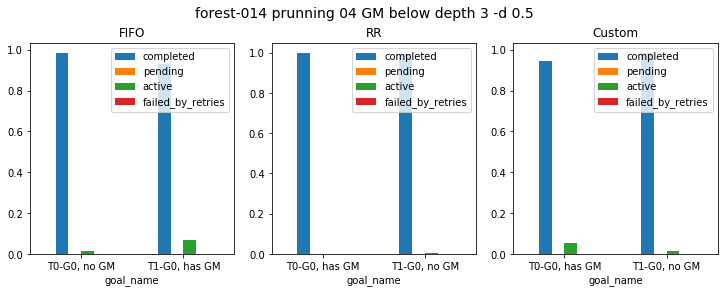

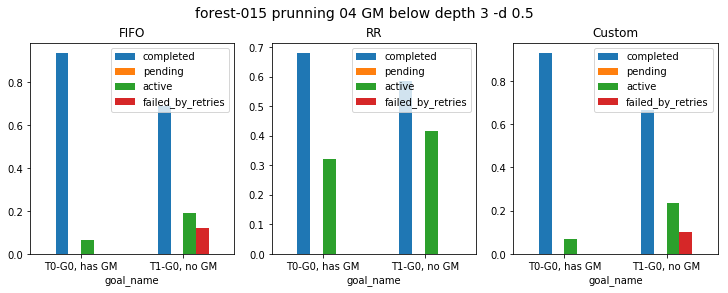

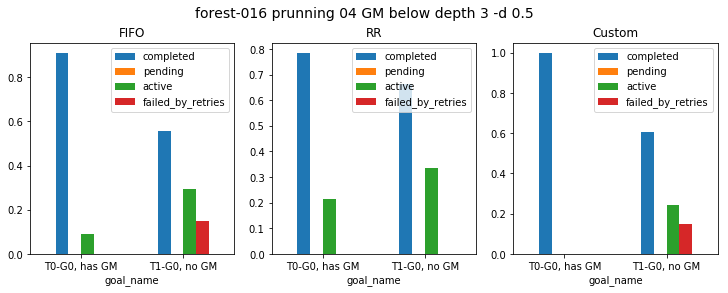

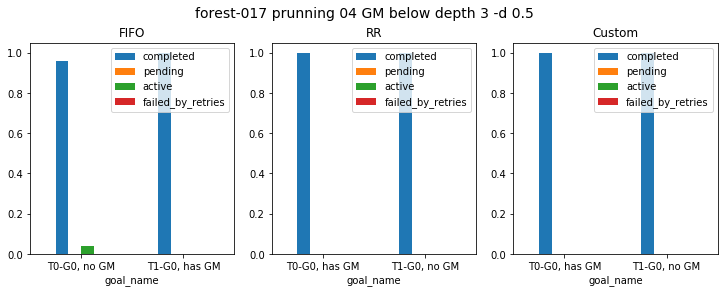

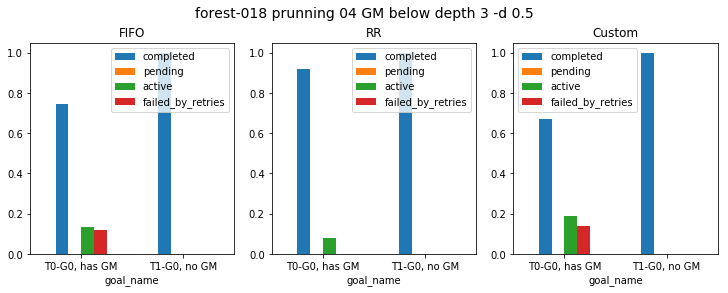

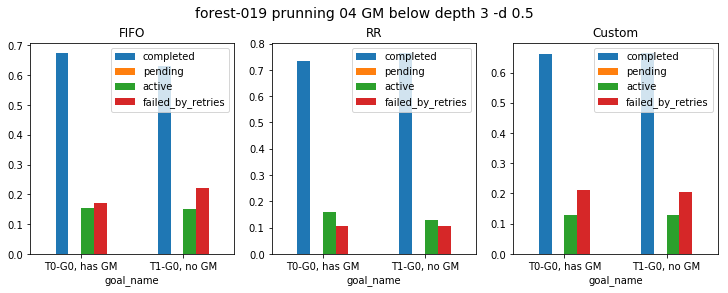

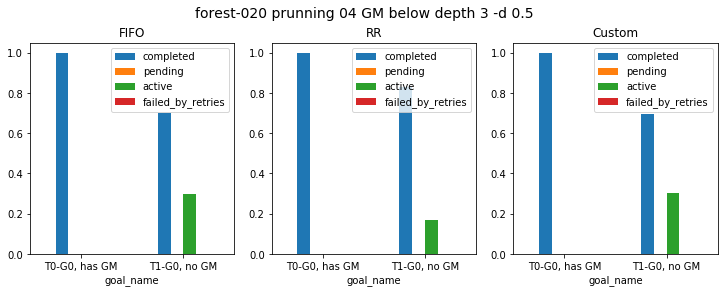

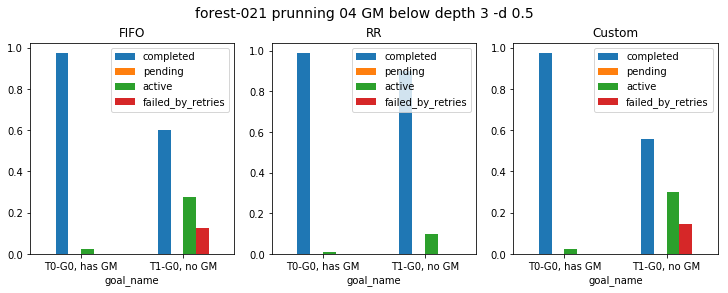

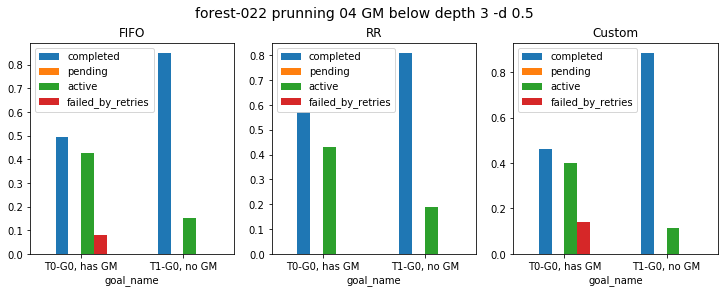

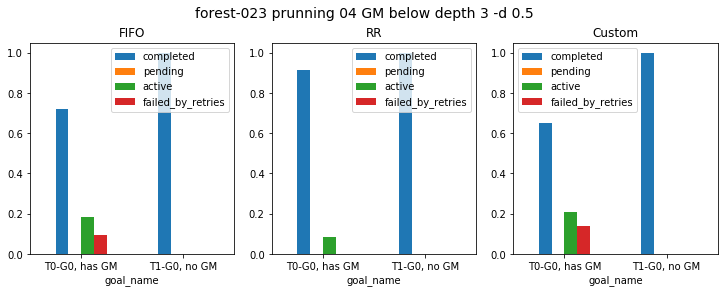

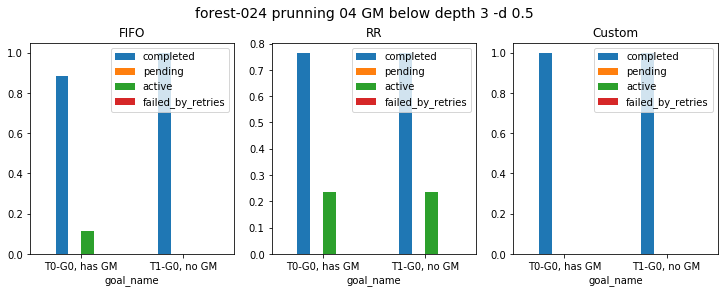

Empty 'DataFrame': no numeric data to plot
forest-025 not found


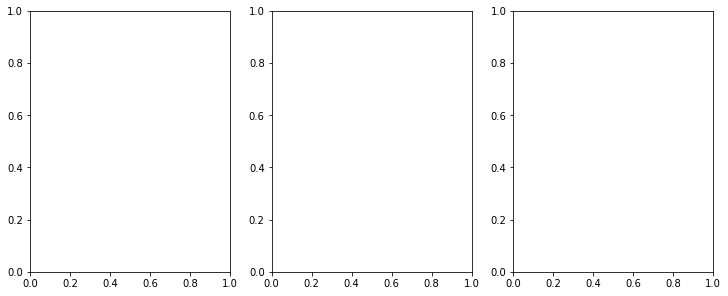

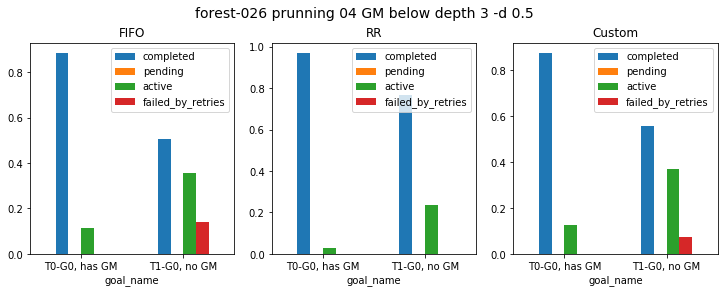

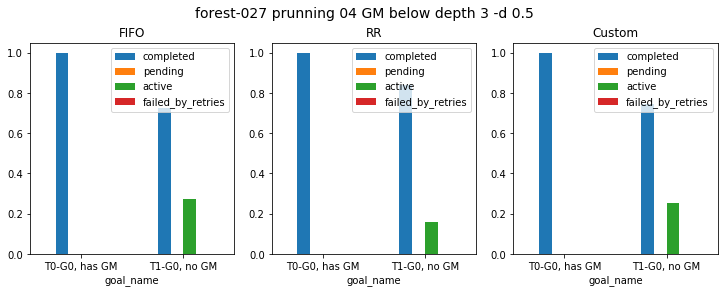

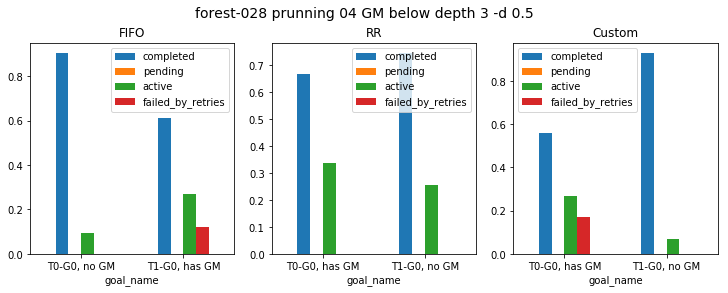

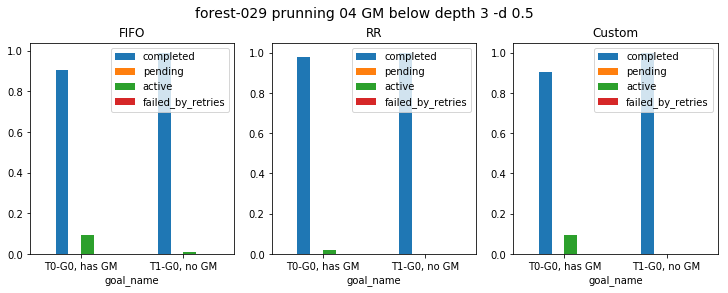

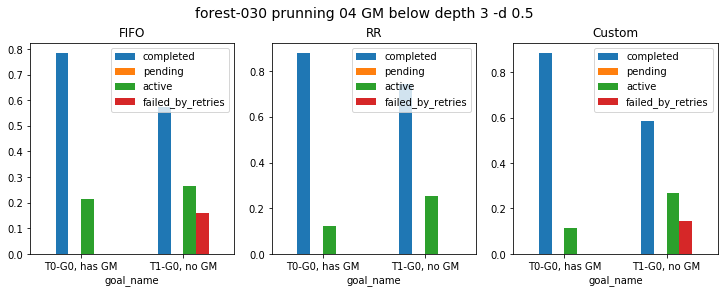

In [135]:
plot_many3(df04above_05_ff, df04above_05_rr, df04above_05_cus,"FIFO", "RR", "Custom", "above04", "prunning 04 GM below depth 3 -d 0.5")

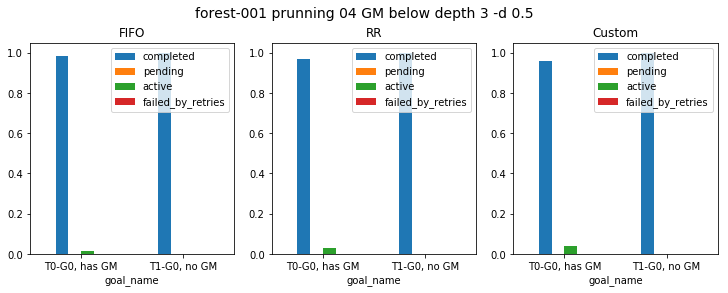

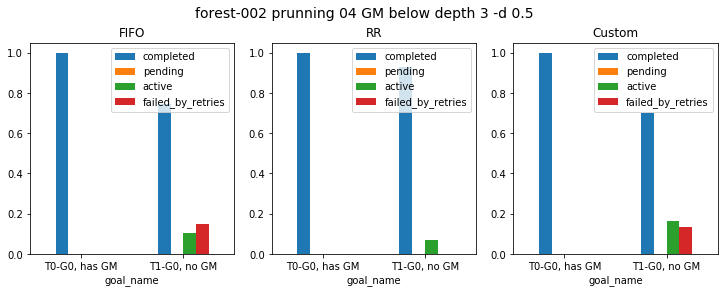

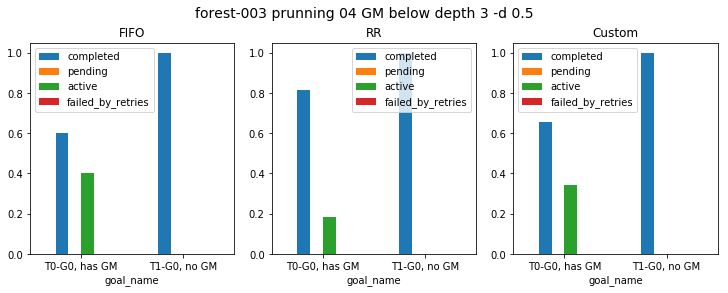

Empty 'DataFrame': no numeric data to plot
forest-004 not found


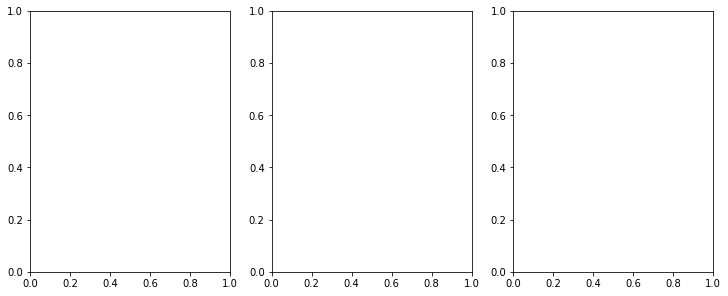

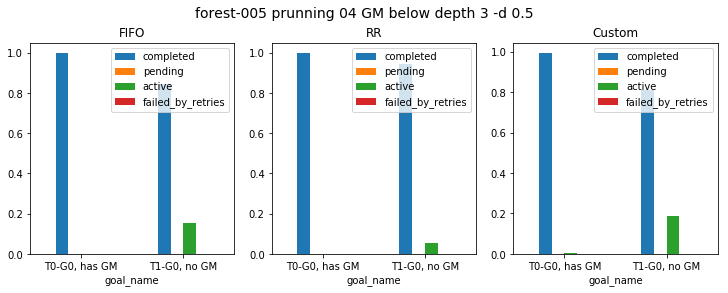

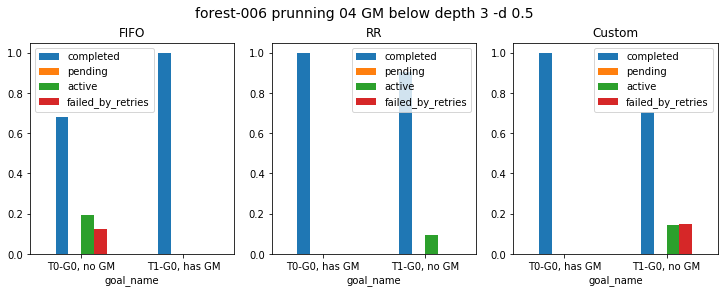

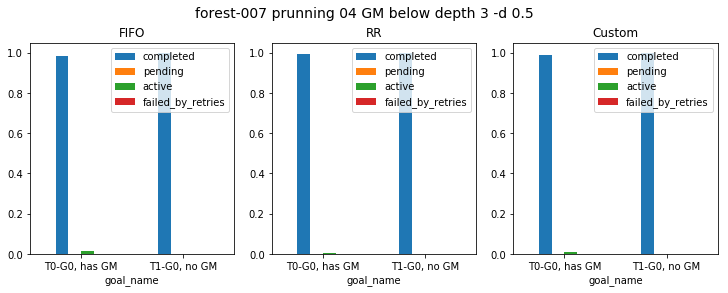

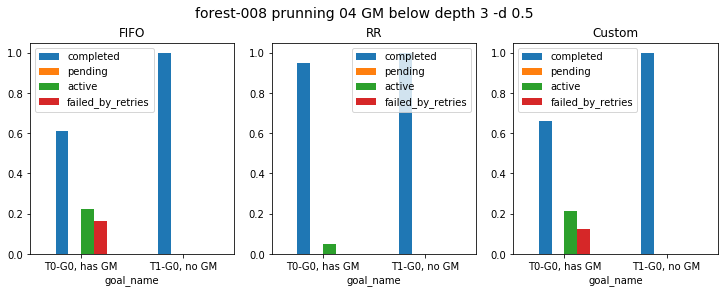

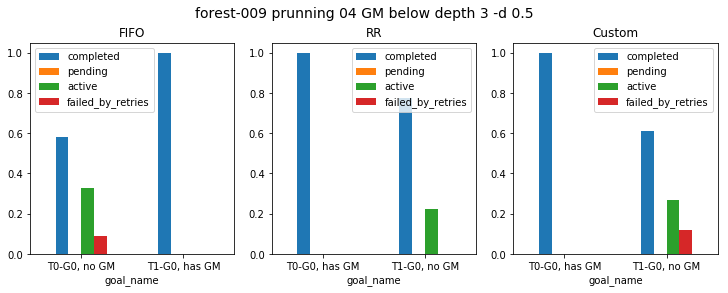

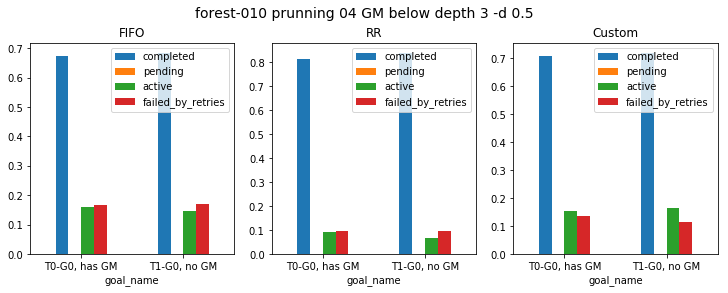

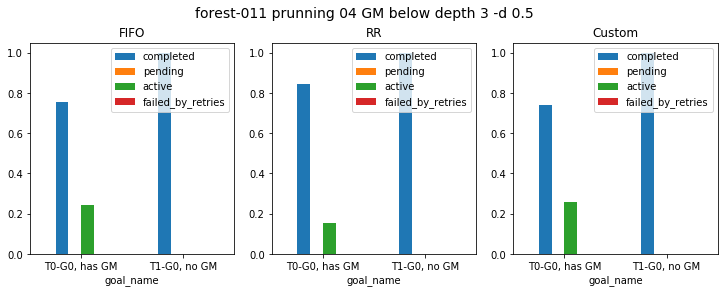

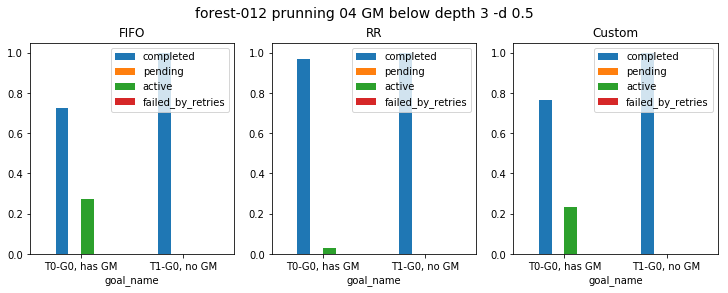

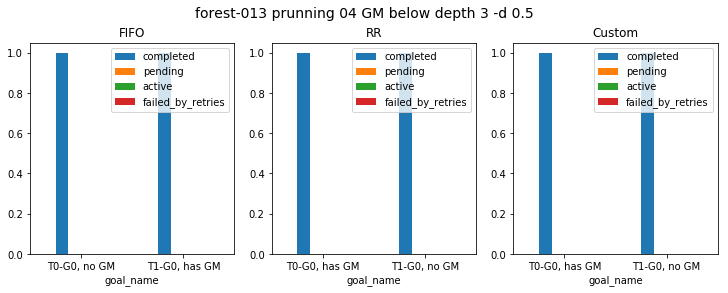

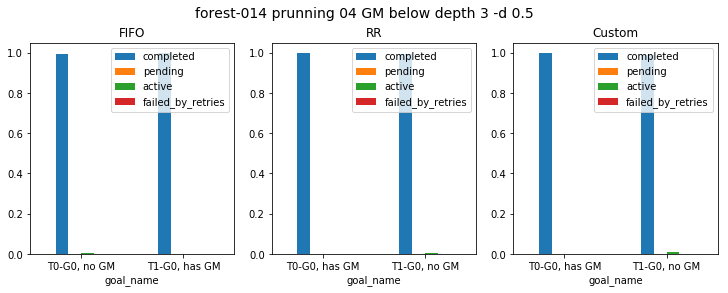

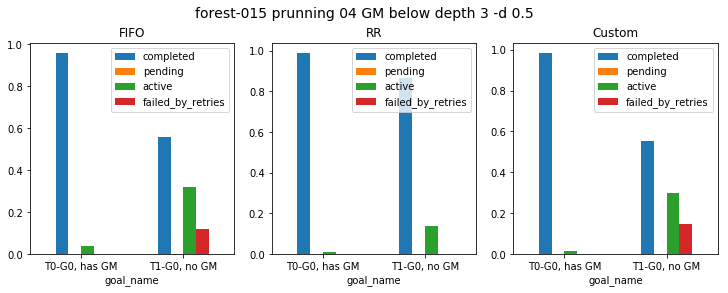

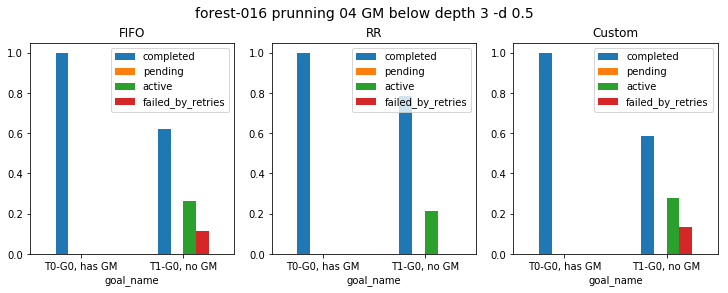

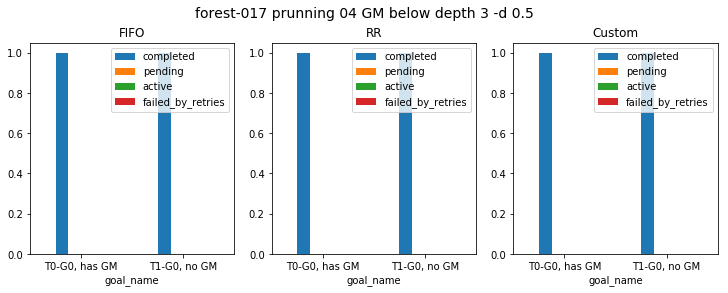

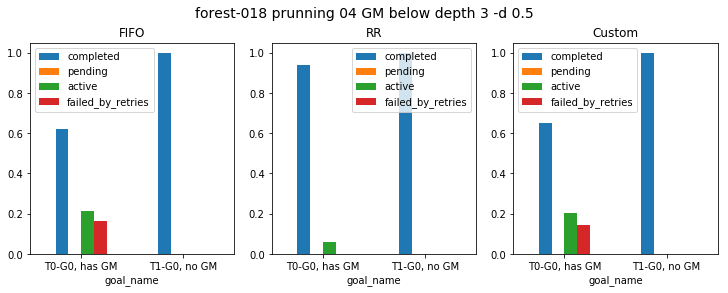

Empty 'DataFrame': no numeric data to plot
forest-019 not found


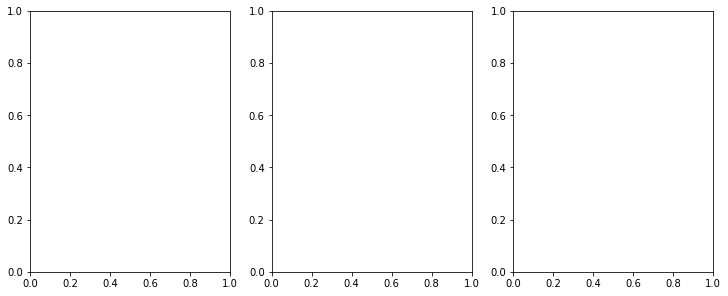

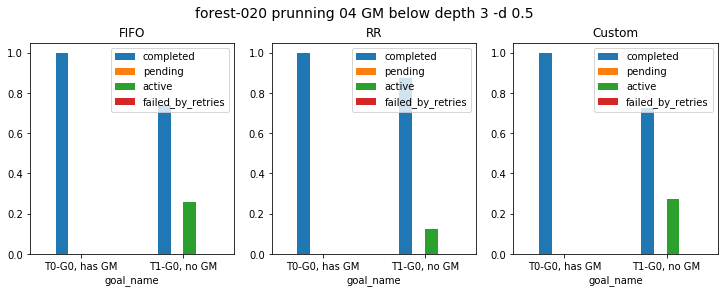

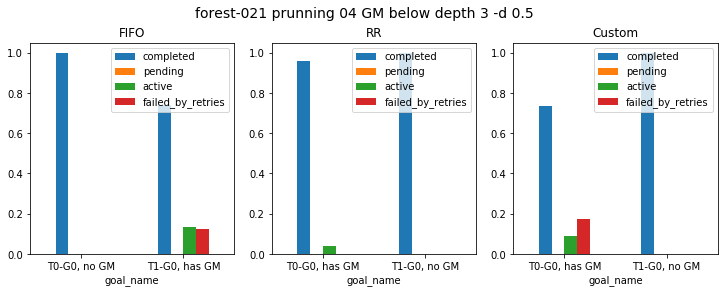

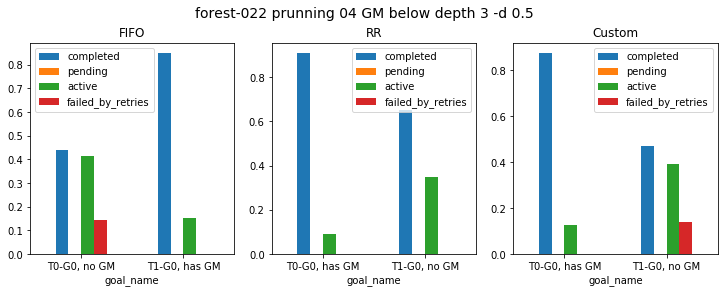

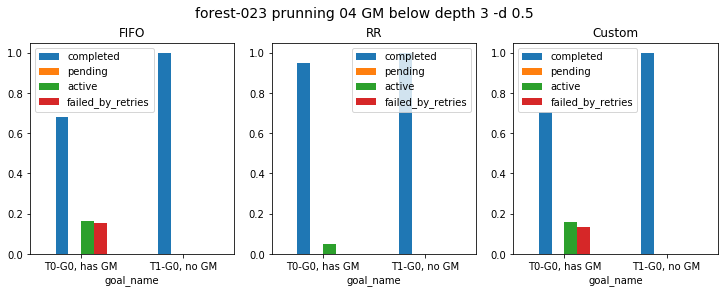

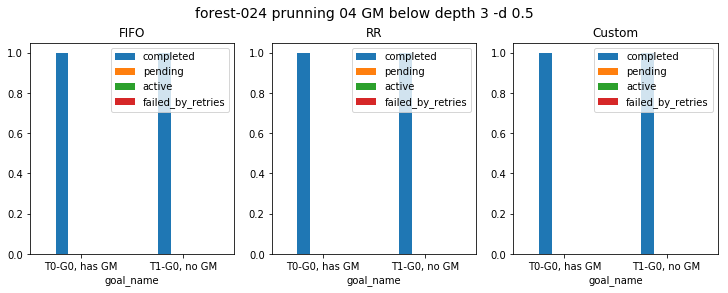

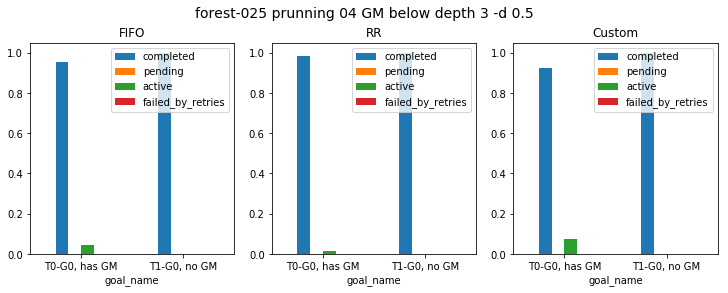

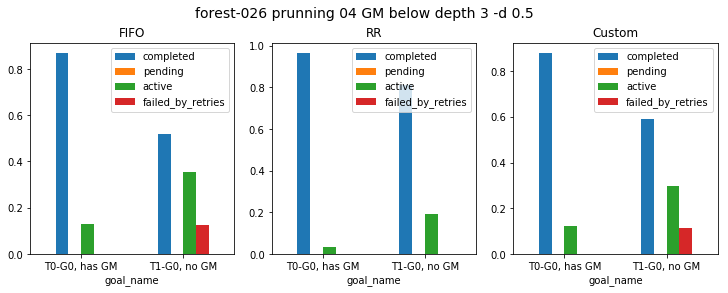

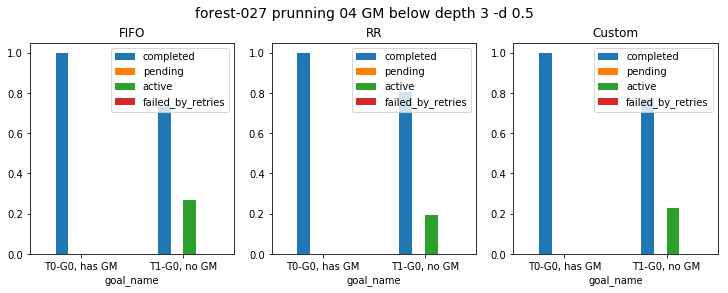

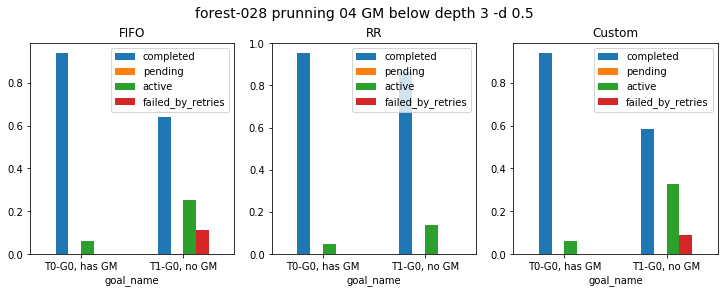

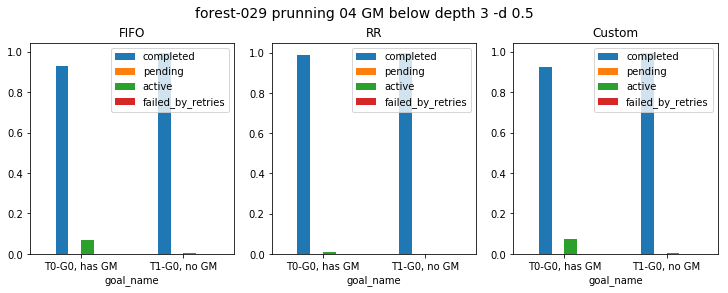

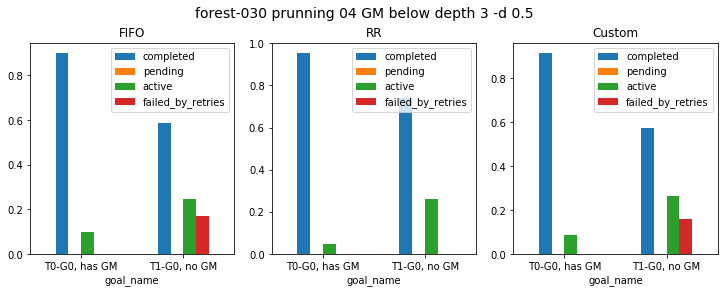

In [136]:
plot_many3(df04bellow_05_ff, df04bellow_05_rr, df04bellow_05_cus, "FIFO", "RR", "Custom", "below04", "prunning 04 GM below depth 3 -d 0.5")

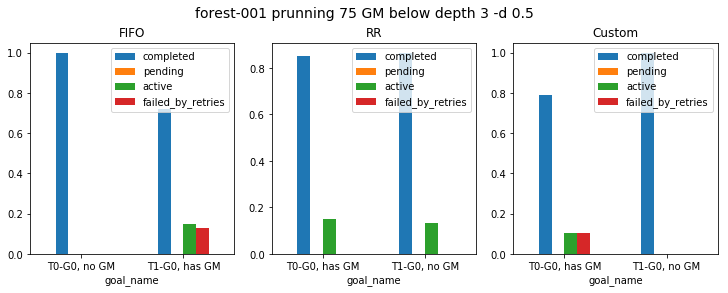

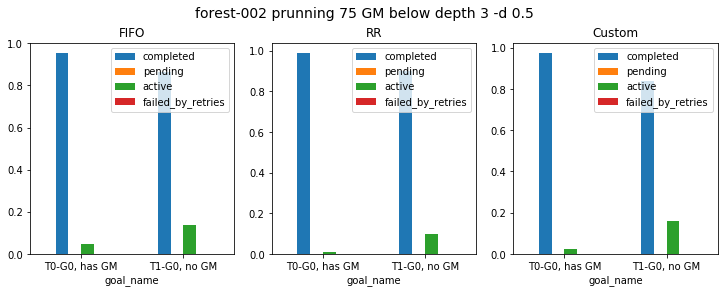

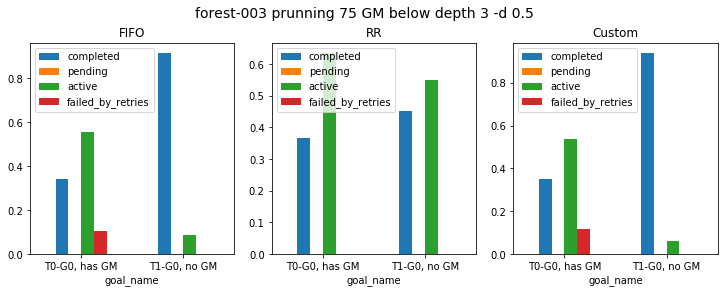

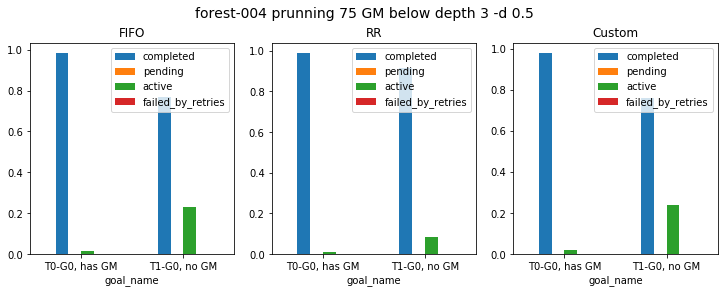

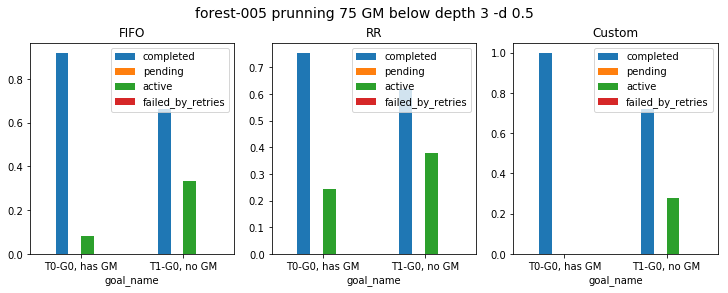

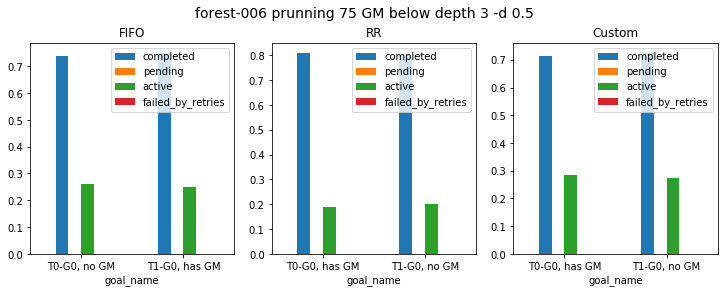

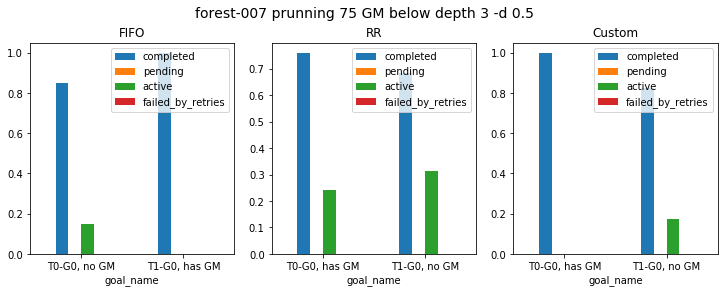

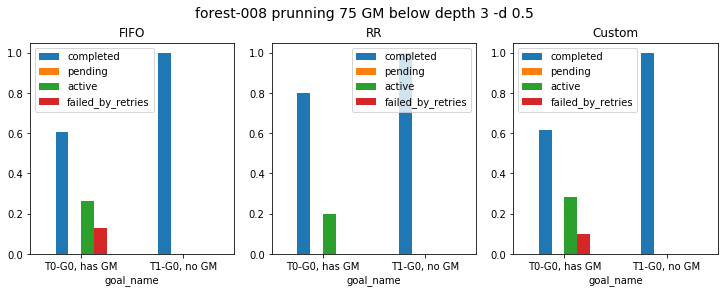

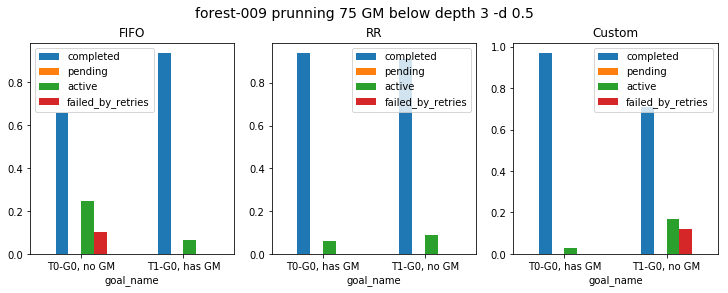

Empty 'DataFrame': no numeric data to plot
forest-010 not found


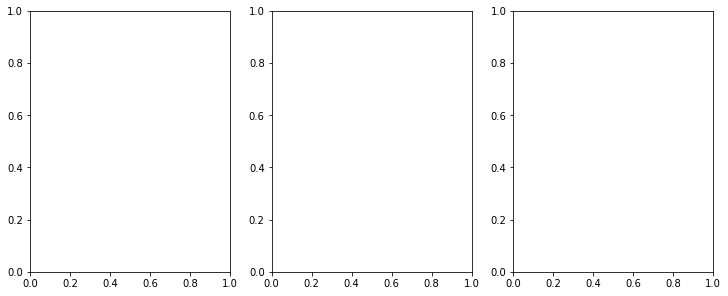

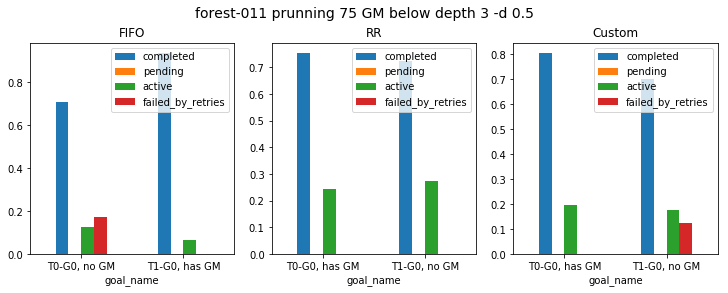

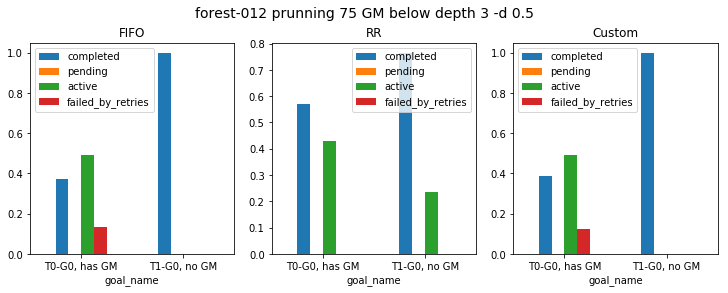

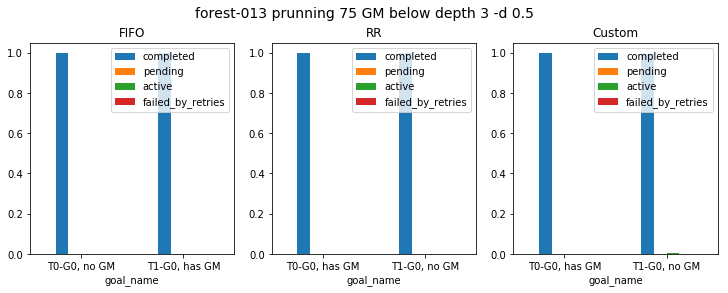

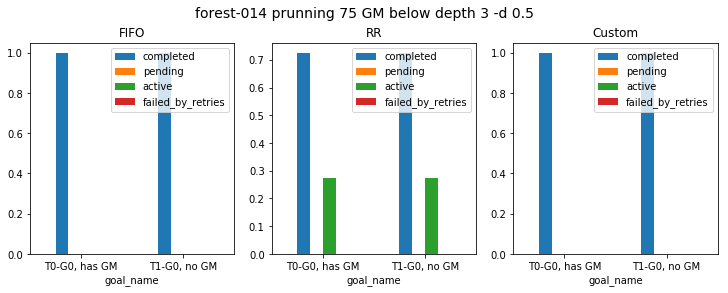

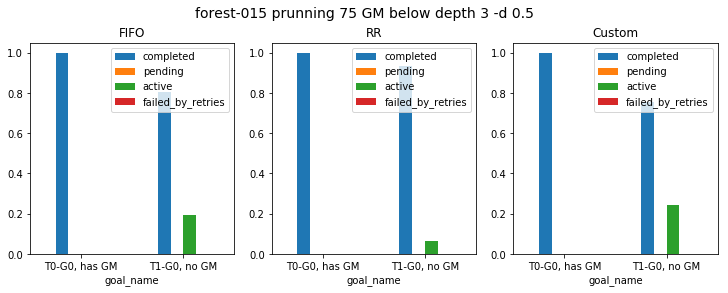

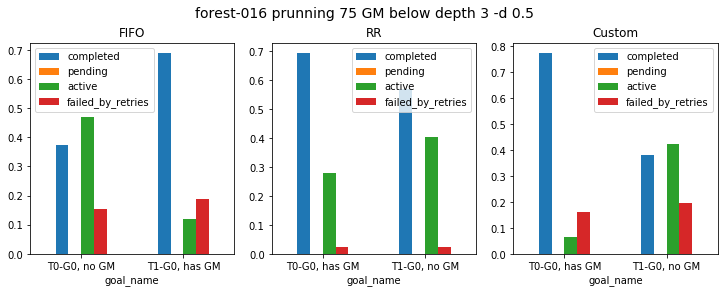

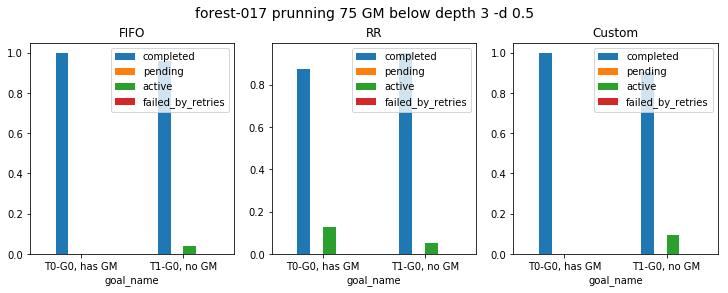

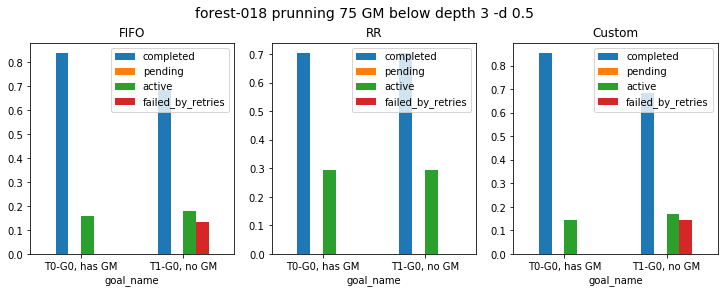

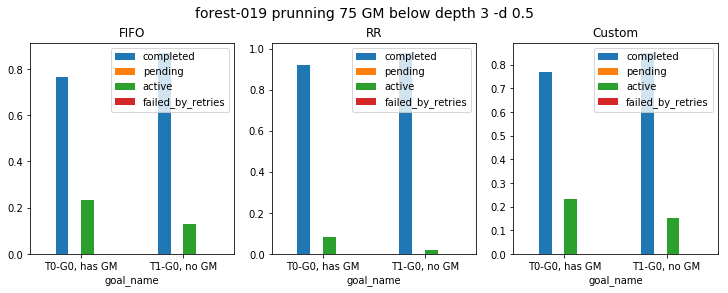

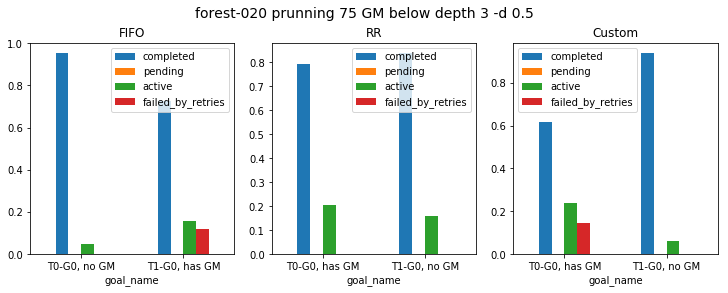

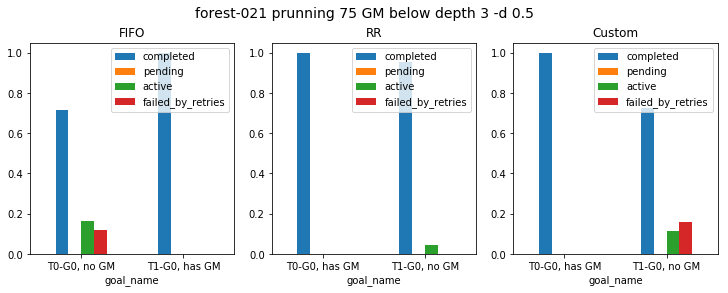

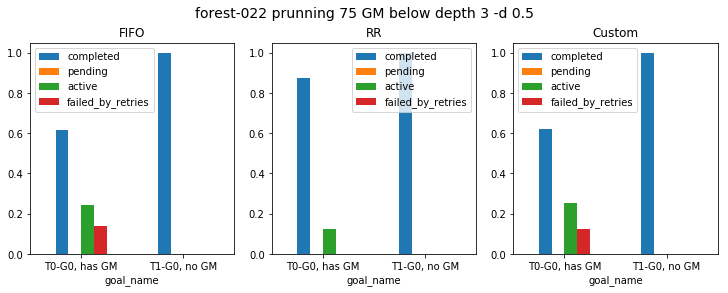

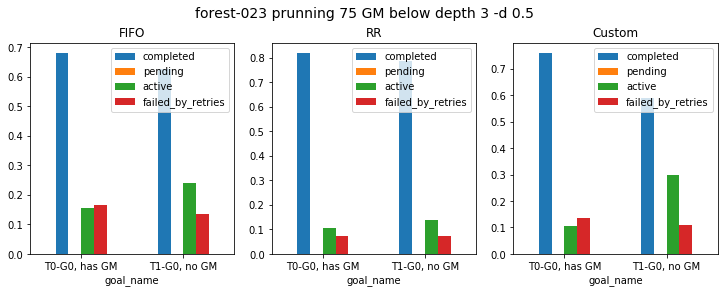

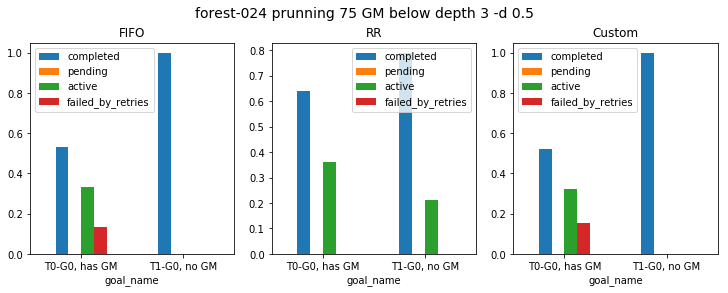

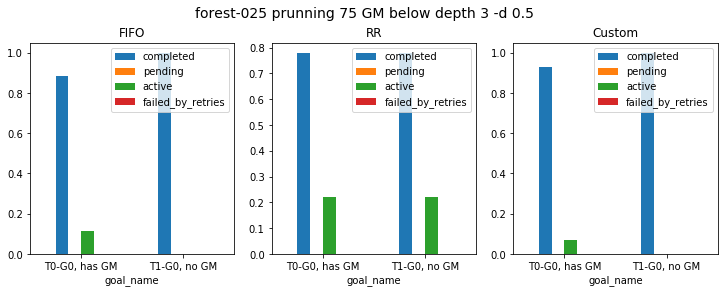

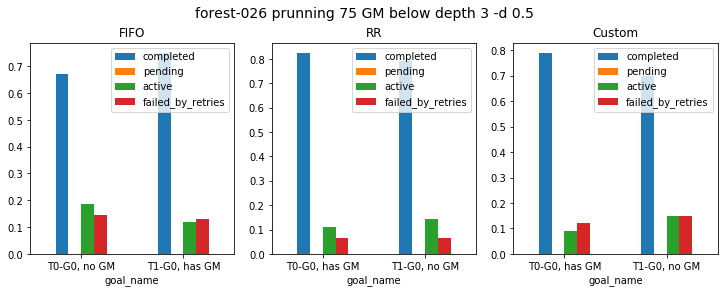

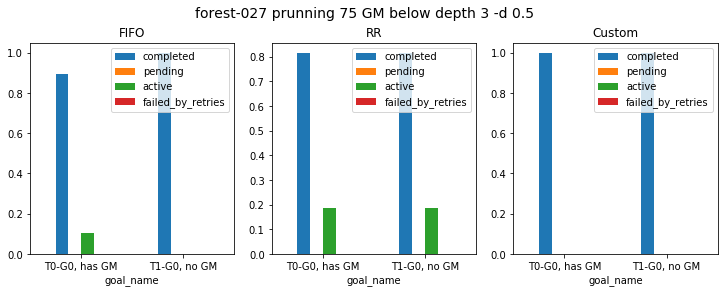

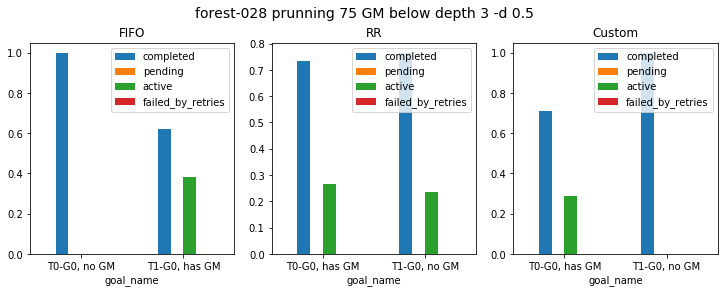

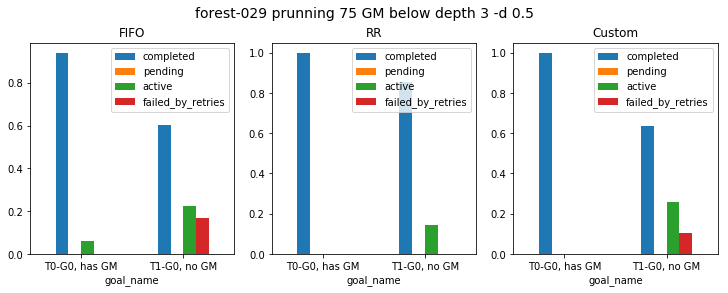

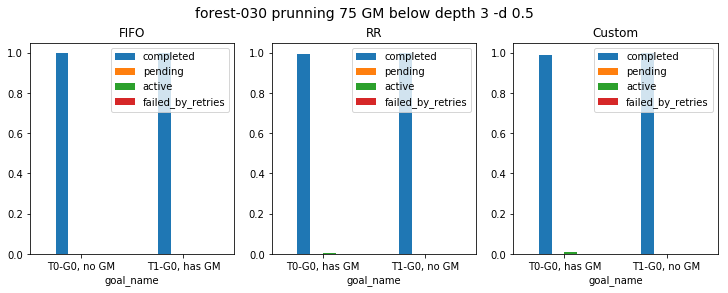

In [138]:
plot_many3(df75above_05_ff, df75above_05_rr, df75above_05_cus,"FIFO", "RR", "Custom", "above75", "prunning 75 GM below depth 3 -d 0.5")

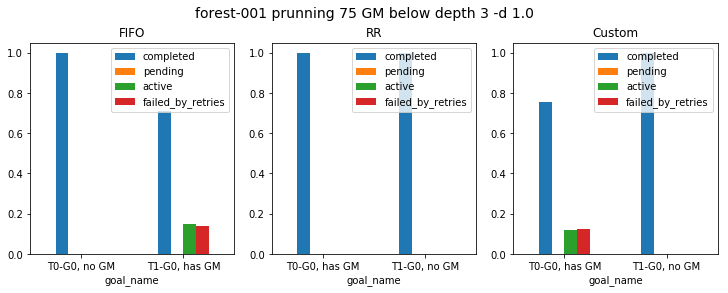

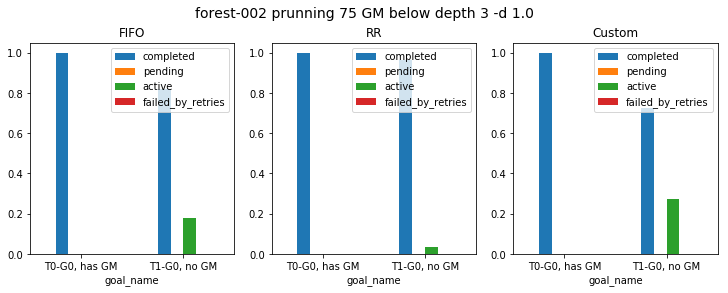

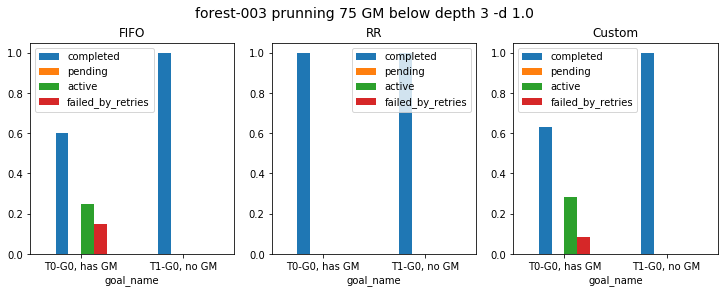

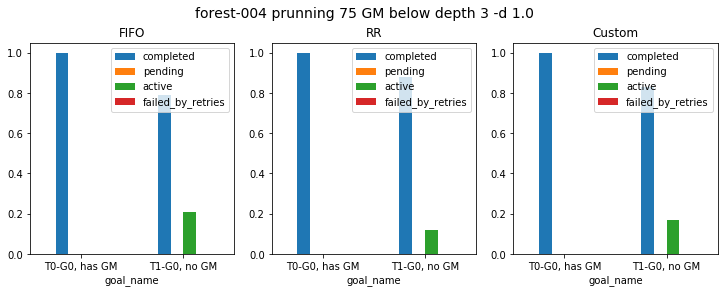

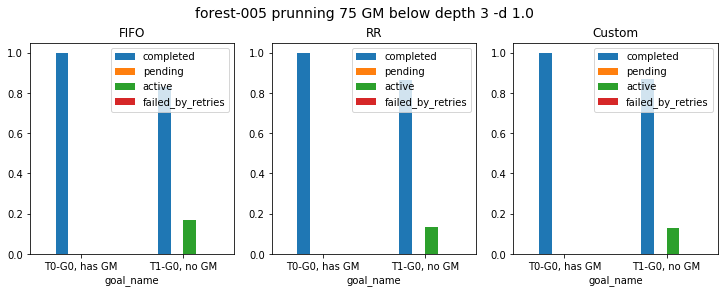

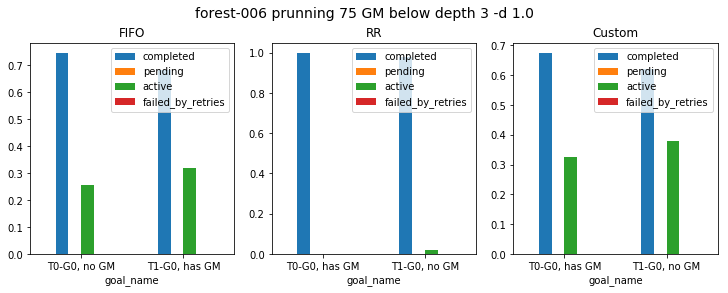

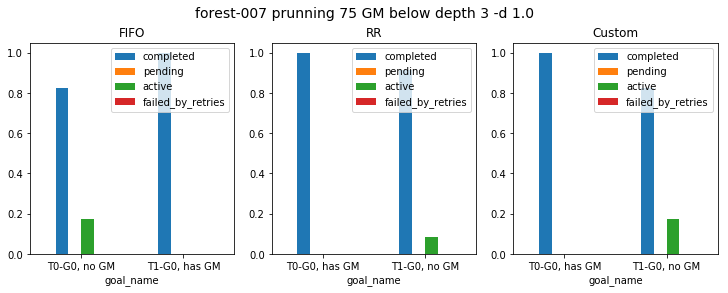

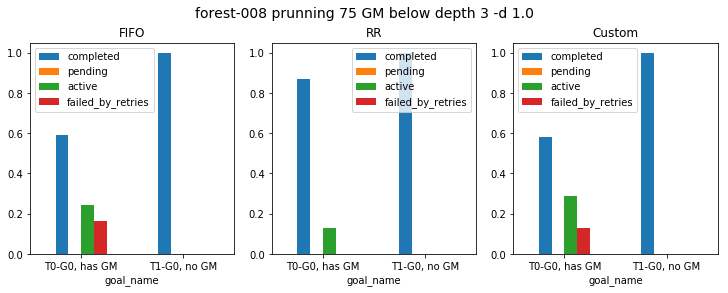

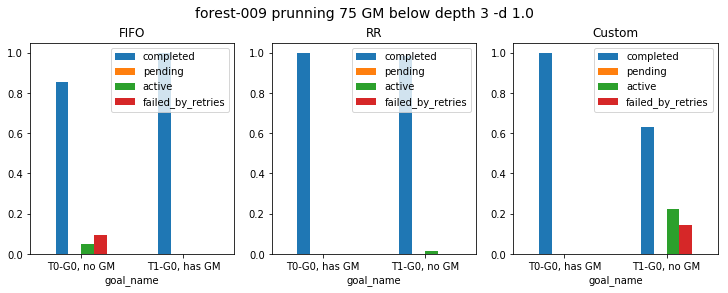

Empty 'DataFrame': no numeric data to plot
forest-010 not found


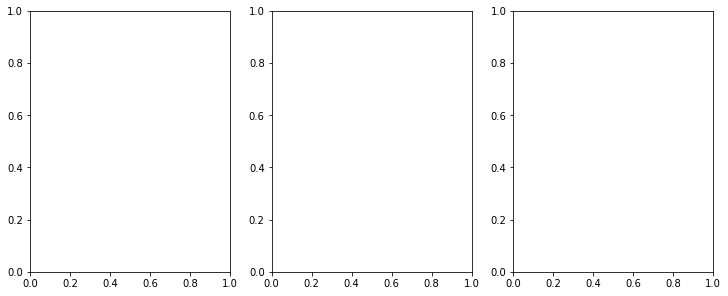

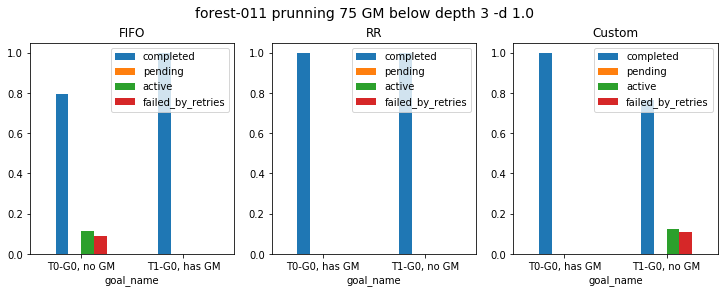

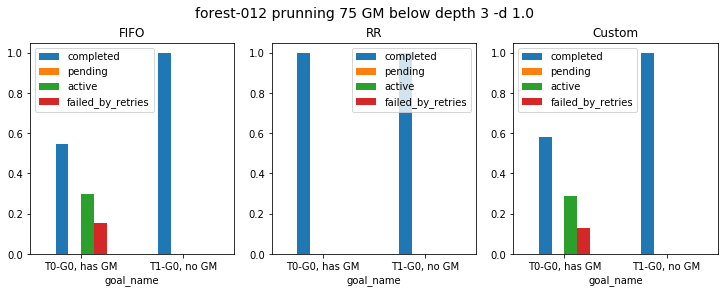

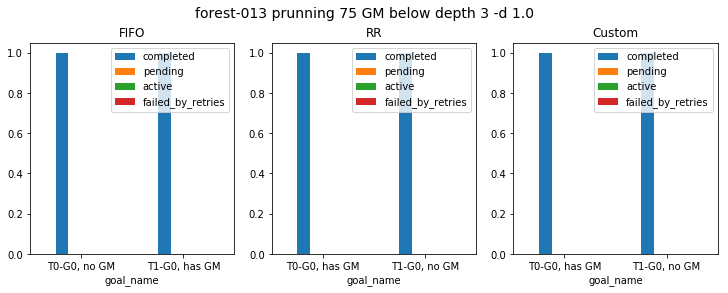

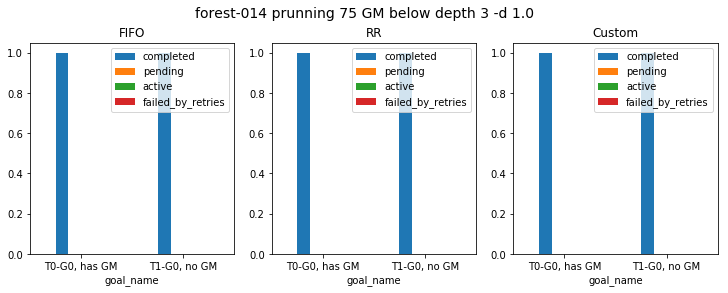

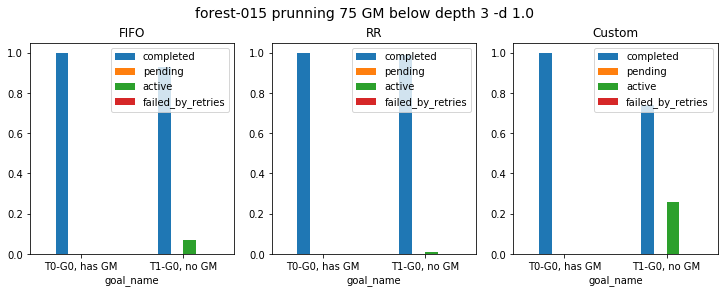

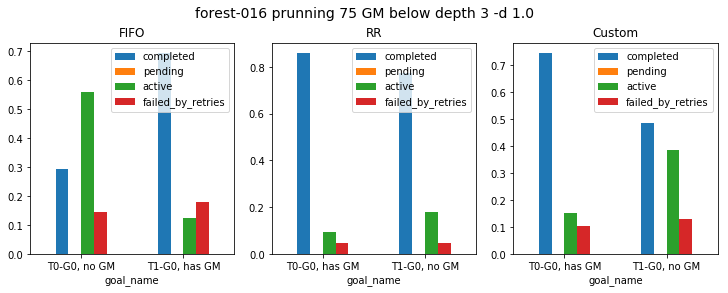

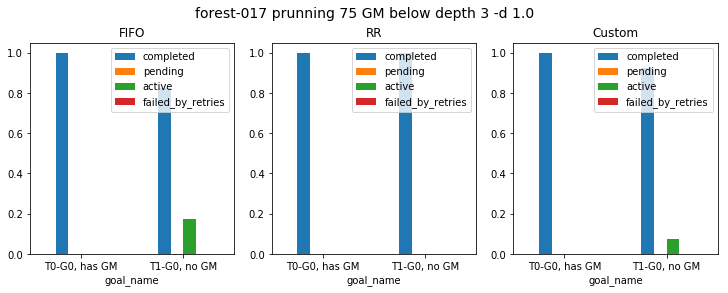

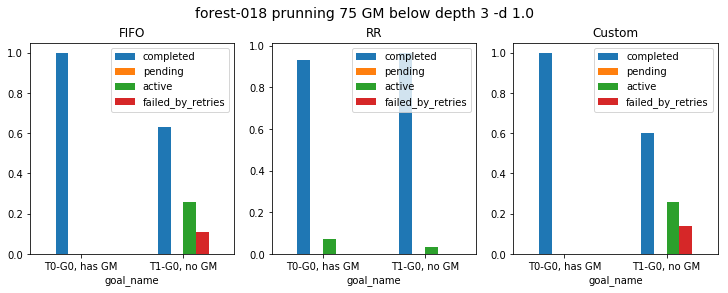

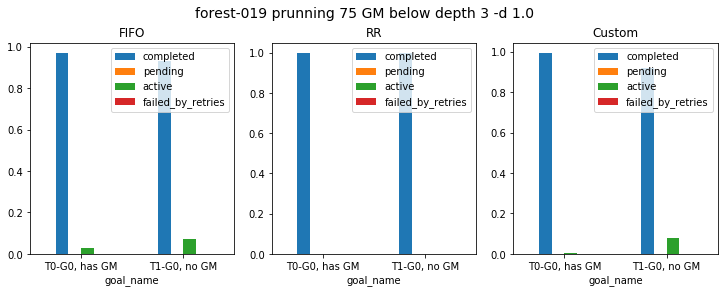

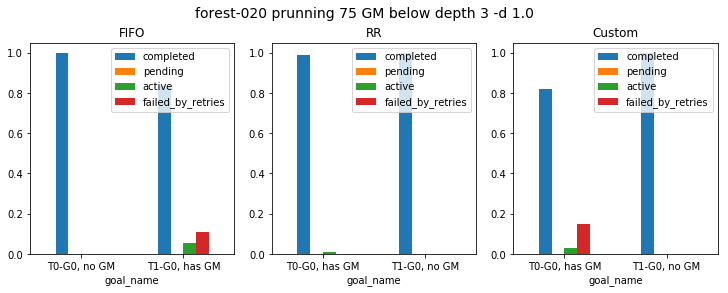

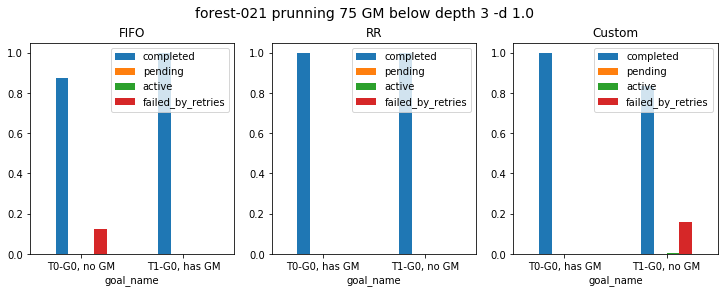

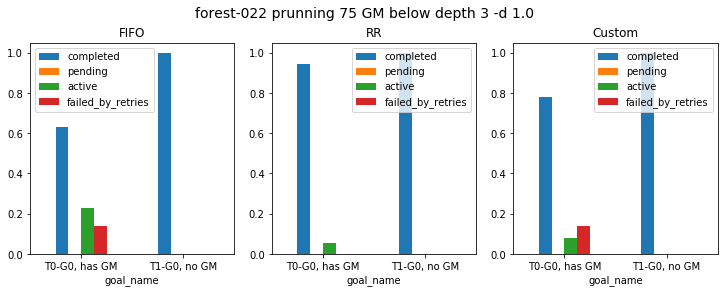

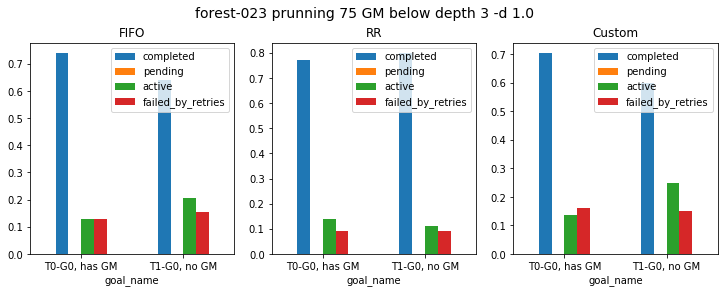

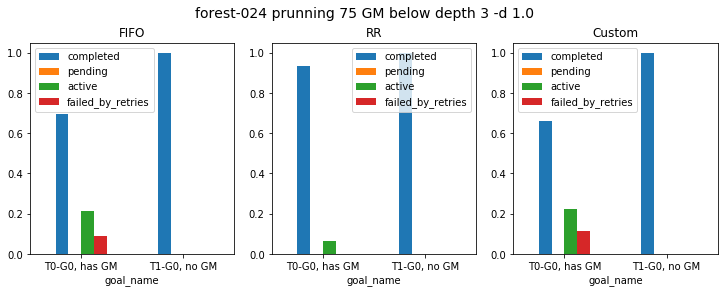

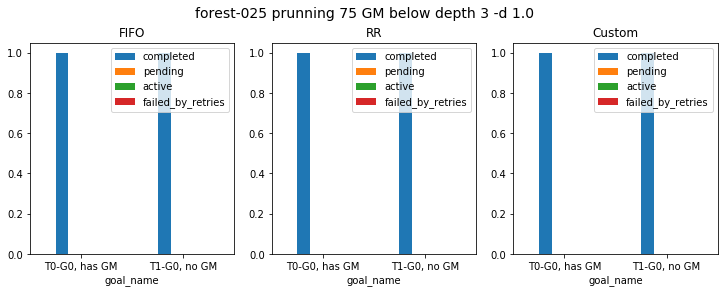

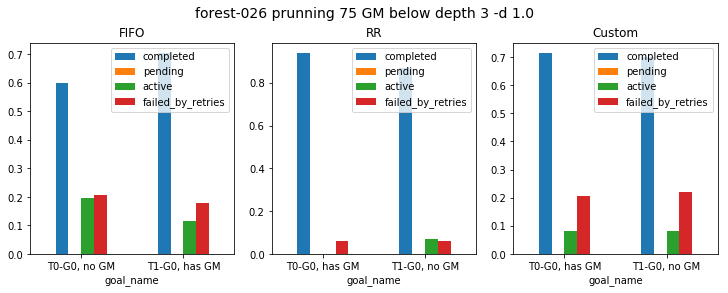

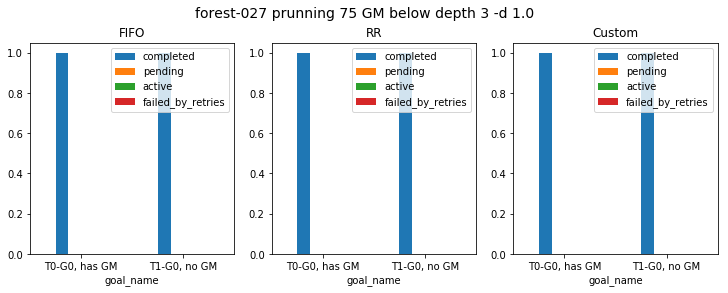

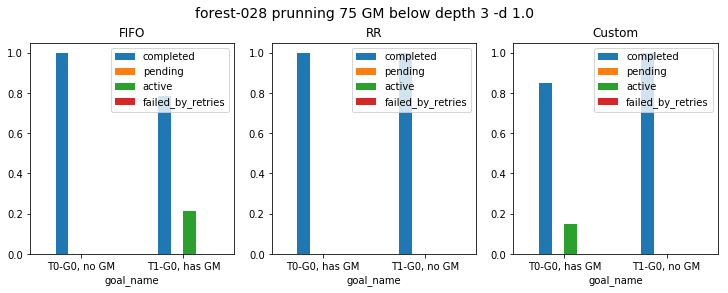

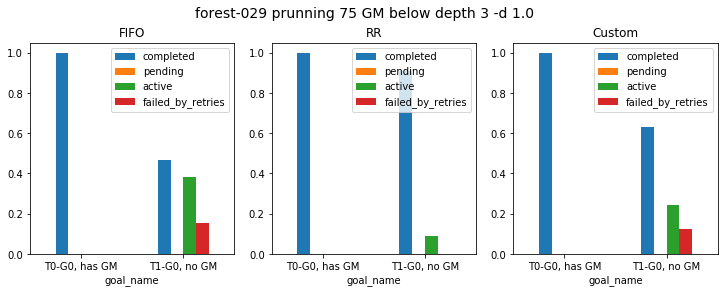

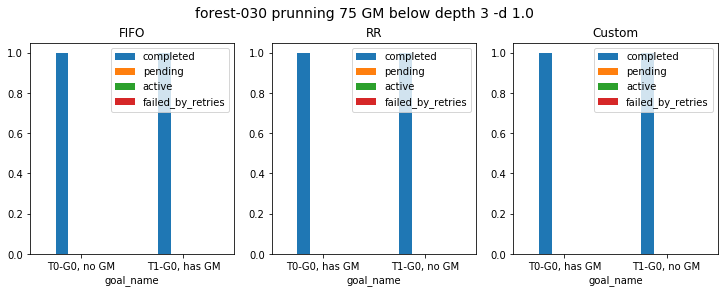

In [160]:
plot_many3(df75bellow_01_ff, df75bellow_01_rr, df75bellow_01_cus,"FIFO", "RR", "Custom", "below75", "prunning 75 GM below depth 3 -d 1.0")

In [165]:
def plot_many4(df0, df1, df2, title0, title1, title2, loc, category):
    
    trees = ['T0-G0', 'T1-G0']
    
    for i in range(1,31):
        
        file_name = get_file_name(i)
        
        try:
            df0_copy = df0.copy()
            df1_copy = df1.copy()
            df2_copy = df2.copy()
            
            df0_new = df0_copy[['goal_name','avg_steps']]
            df1_new = df1_copy[['goal_name','avg_steps']]
            df2_new = df2_copy[['goal_name','avg_steps']]
            
#             df0_new = get_proportion_df(df0_copy)
#             df1_new = get_proportion_df(df1_copy)
#             df2_new = get_proportion_df(df2_copy)
            
            if(tree_loc[i][loc] == 0):
                df0_new["goal_name"].replace('T0-G0', 'T0-G0, has GM', inplace=True)
                df0_new["goal_name"].replace('T1-G0', 'T1-G0, no GM', inplace=True)
        
                df1_new["goal_name"].replace('T0-G0', 'T0-G0, has GM', inplace=True)
                df1_new["goal_name"].replace('T1-G0', 'T1-G0, no GM', inplace=True)
                
                df2_new["goal_name"].replace('T0-G0', 'T0-G0, has GM', inplace=True)
                df2_new["goal_name"].replace('T1-G0', 'T1-G0, no GM', inplace=True)
            else:
                df0_new["goal_name"].replace('T1-G0', 'T1-G0, has GM', inplace=True)
                df0_new["goal_name"].replace('T0-G0', 'T0-G0, no GM', inplace=True)
                
                df1_new["goal_name"].replace('T1-G0', 'T0-G0, has GM', inplace=True)
                df1_new["goal_name"].replace('T0-G0', 'T1-G0, no GM', inplace=True)
                
                df2_new["goal_name"].replace('T1-G0', 'T0-G0, has GM', inplace=True)
                df2_new["goal_name"].replace('T0-G0', 'T1-G0, no GM', inplace=True)
                

            df0_new.drop(df0_new.loc[df0['forest_name']!= file_name].index, inplace=True)
            df1_new.drop(df1_new.loc[df1['forest_name']!= file_name].index, inplace=True)
            df2_new.drop(df2_new.loc[df2['forest_name']!= file_name].index, inplace=True)

            fig, axs = plt.subplots(1,3, constrained_layout=True, figsize=(10,4))

            df0_new.groupby(['goal_name']).sum().plot(kind='bar' , ax=axs[0])
            df1_new.groupby(['goal_name']).sum().plot(kind='bar' , ax=axs[1])
            df2_new.groupby(['goal_name']).sum().plot(kind='bar' , ax=axs[2])

            axs[1].set_title(title1)
            axs[0].set_title(title0)
            axs[2].set_title(title2)
            plt.setp( axs[0].xaxis.get_majorticklabels(), rotation=0 )
            plt.setp( axs[1].xaxis.get_majorticklabels(), rotation=0 )
            plt.setp( axs[2].xaxis.get_majorticklabels(), rotation=0 )
            fig.suptitle((file_name + " " + category), fontsize=14)
            
            plt.show()
        except Exception as e:
            print(e)
            print(file_name + " not found")

        

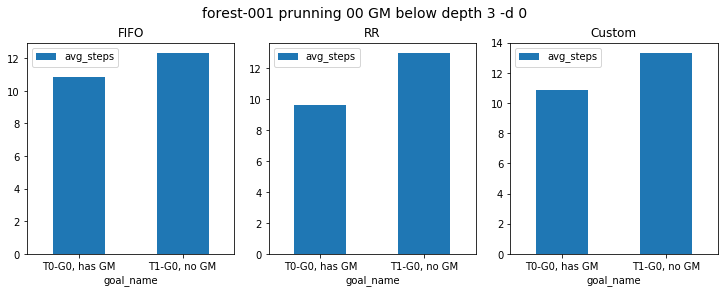

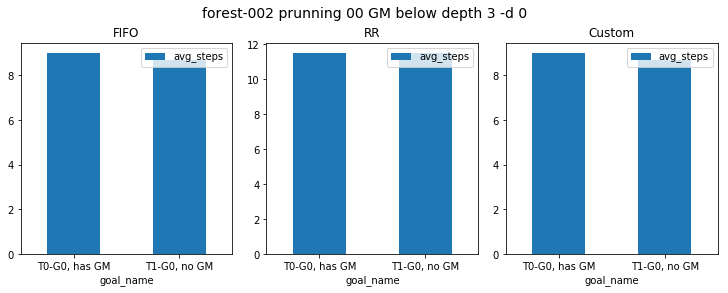

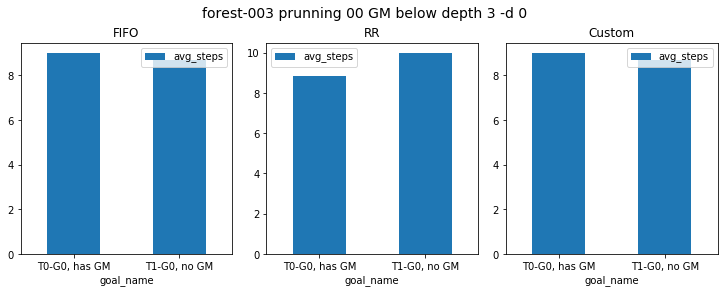

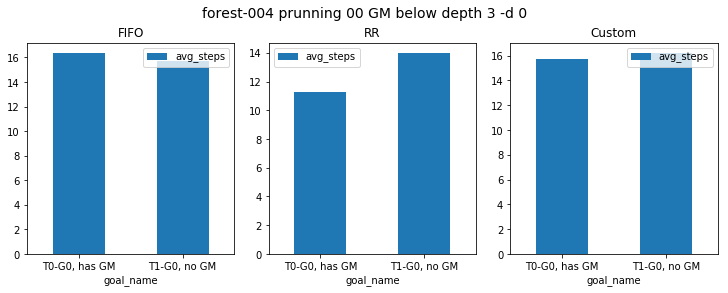

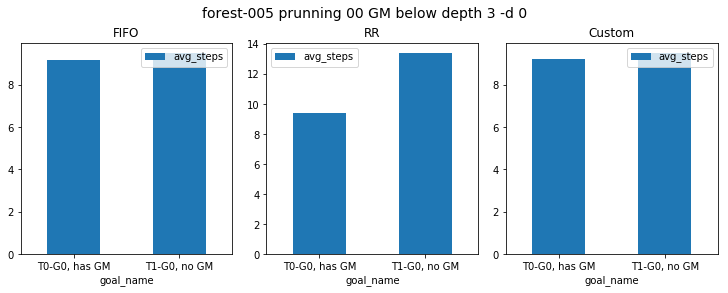

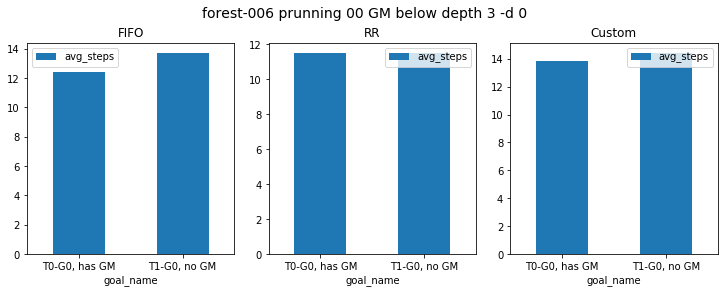

Empty 'DataFrame': no numeric data to plot
forest-007 not found


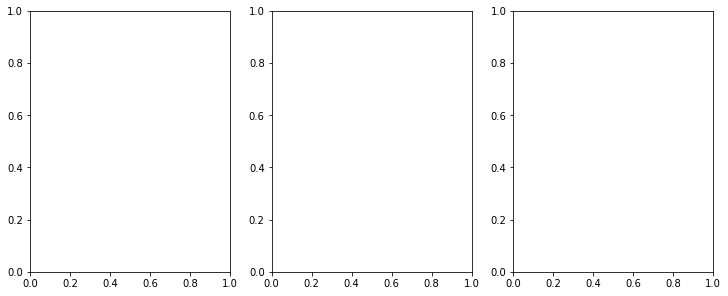

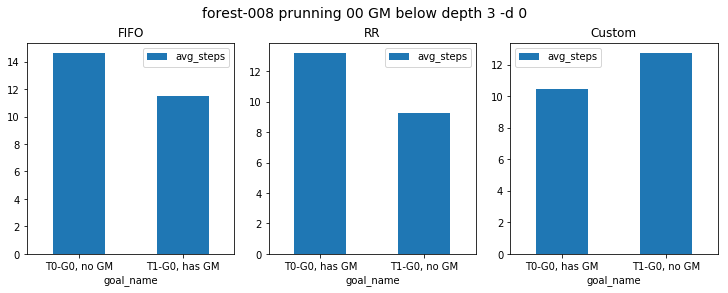

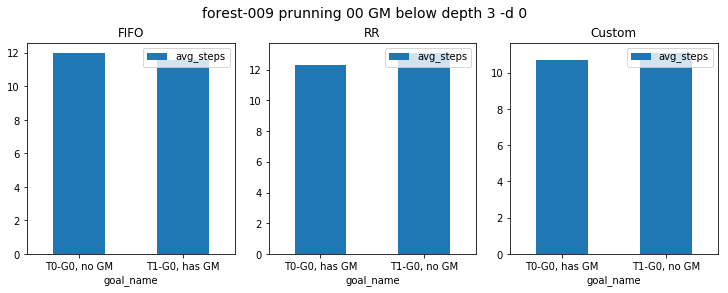

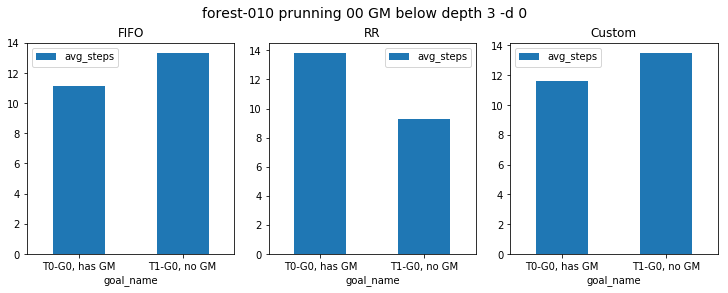

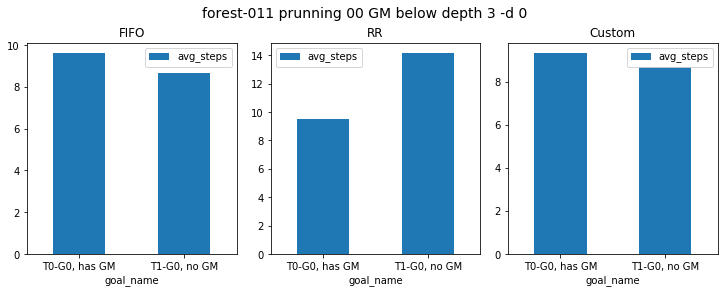

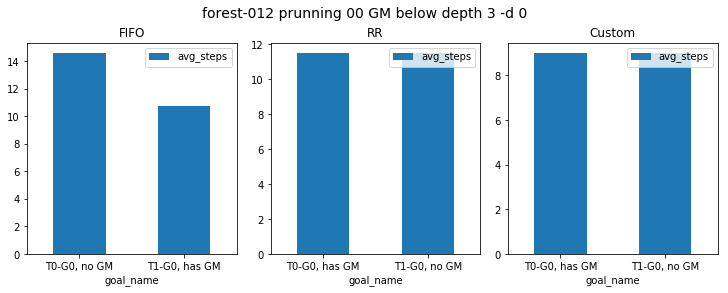

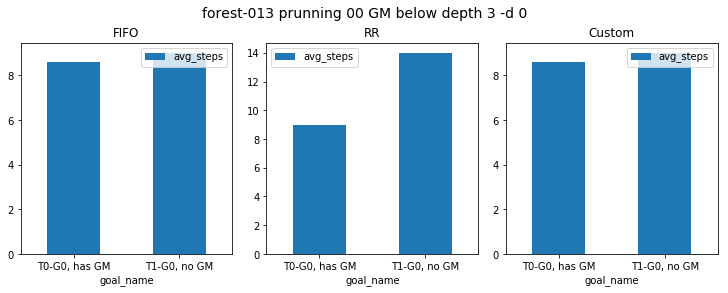

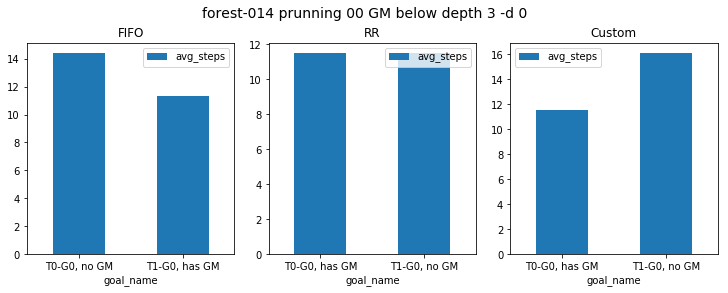

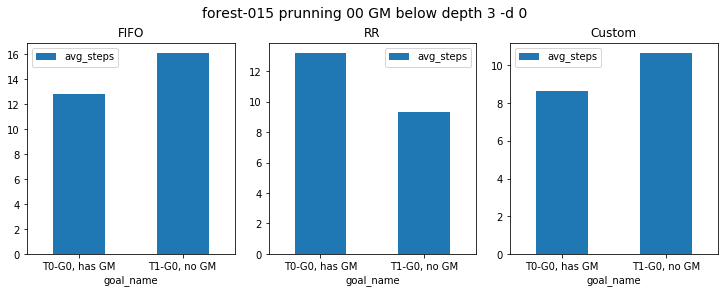

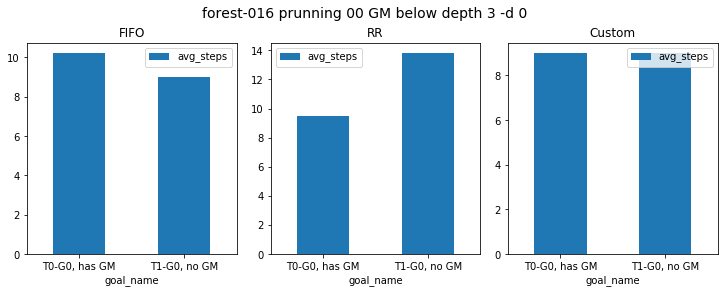

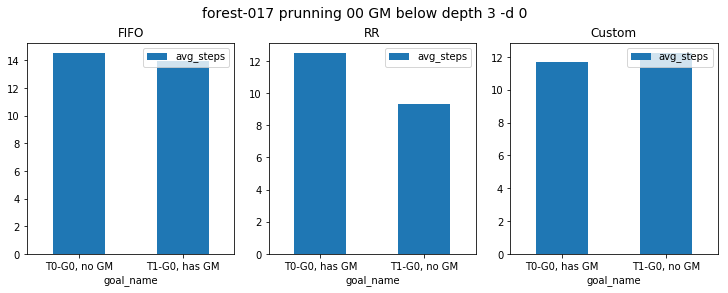

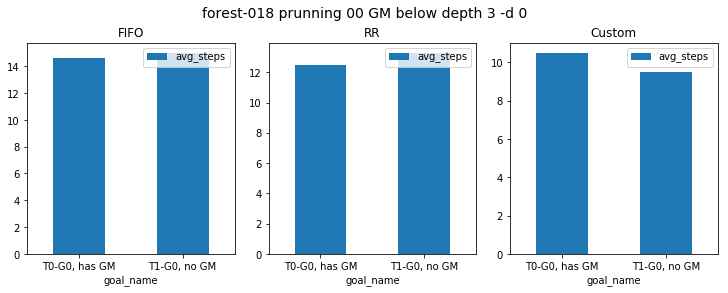

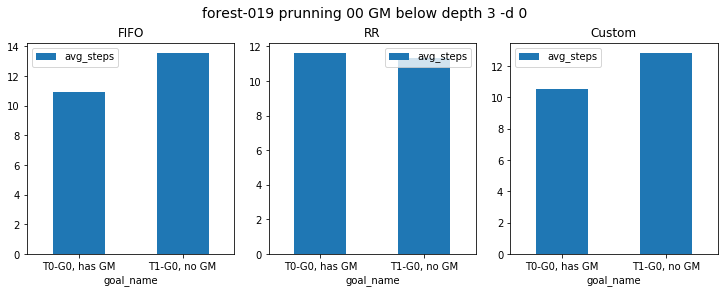

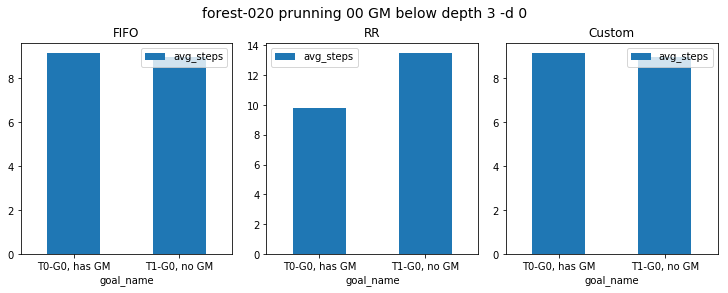

In [ ]:
plot_many4(df00above_00_ff, df00above_00_rr, df00above_00_cus, "FIFO", "RR", "Custom", "above00", "prunning 00 GM below depth 3 -d 0")

In [ ]:
plot_many4(df00bellow_00_ff, df00bellow_00_rr, df00bellow_00_cus,"FIFO", "RR", "Custom", "below00", "prunning 00 GM below depth 3 -d 0")

In [ ]:
plot_many4(df04above_05_ff, df04above_05_rr, df04above_05_cus,"FIFO", "RR", "Custom", "above04", "prunning 04 GM below depth 3 -d 0.5")

In [ ]:
plot_many4(df04bellow_05_ff, df04bellow_05_rr, df04bellow_05_cus, "FIFO", "RR", "Custom", "below04", "prunning 04 GM below depth 3 -d 0.5")

In [ ]:
plot_many4(df75above_05_ff, df75above_05_rr, df75above_05_cus,"FIFO", "RR", "Custom", "above75", "prunning 75 GM below depth 3 -d 0.5")

c:\users\sefira karina\appdata\local\programs\python\python36\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
c:\users\sefira karina\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


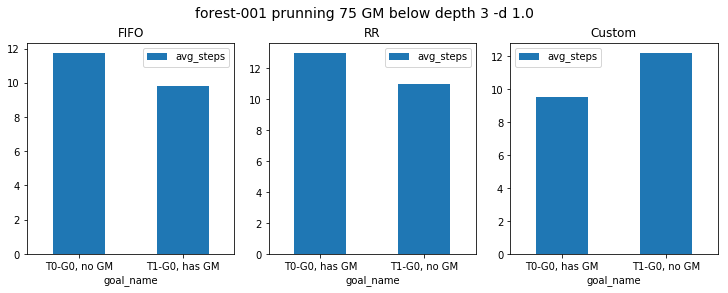

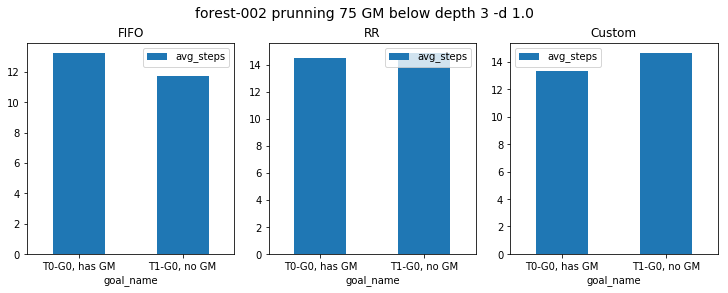

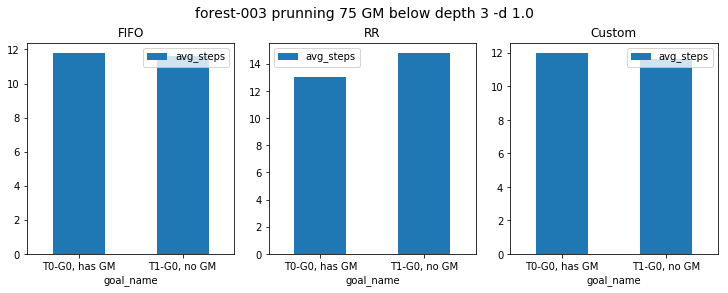

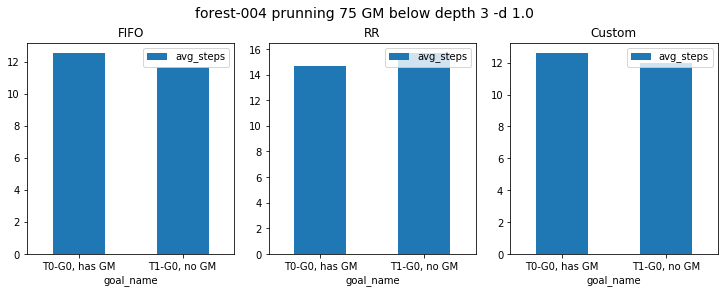

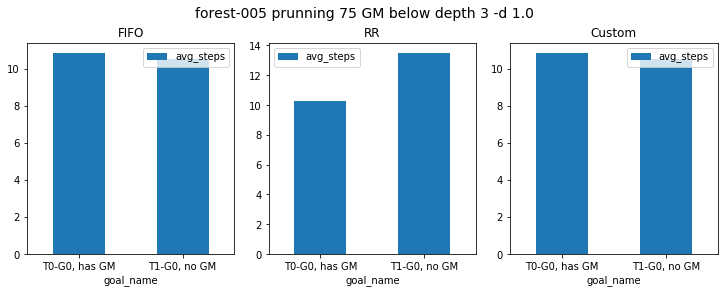

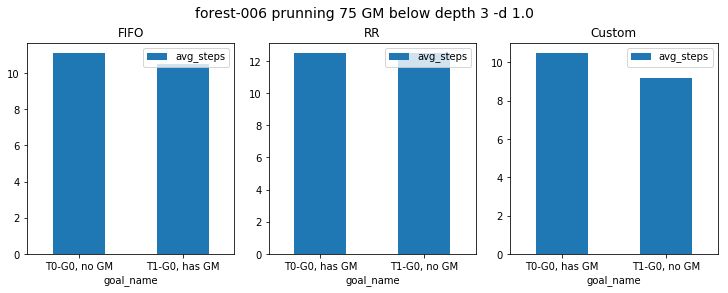

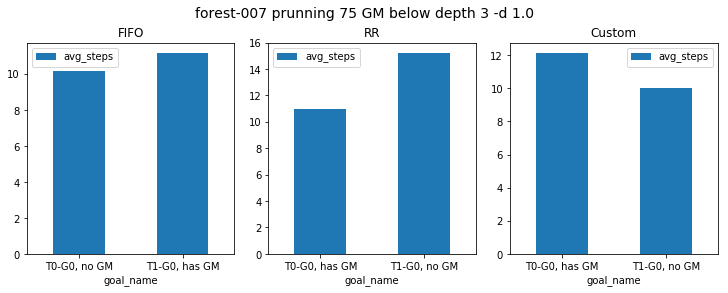

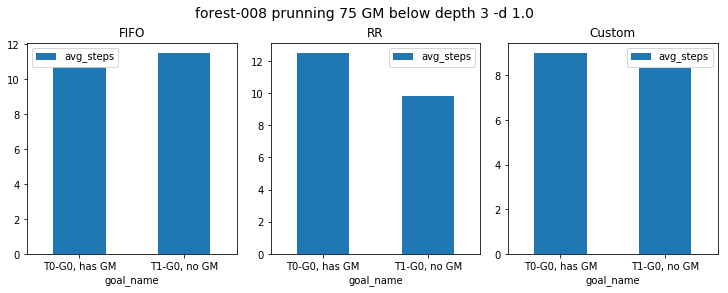

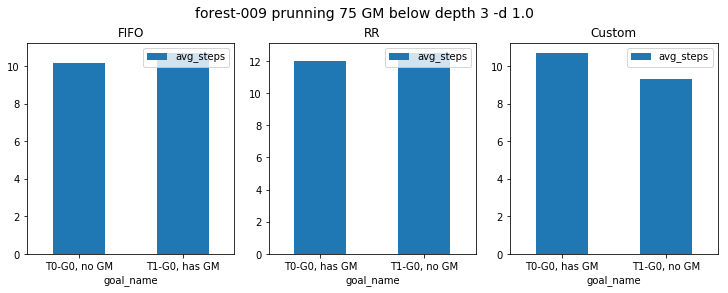

Empty 'DataFrame': no numeric data to plot
forest-010 not found


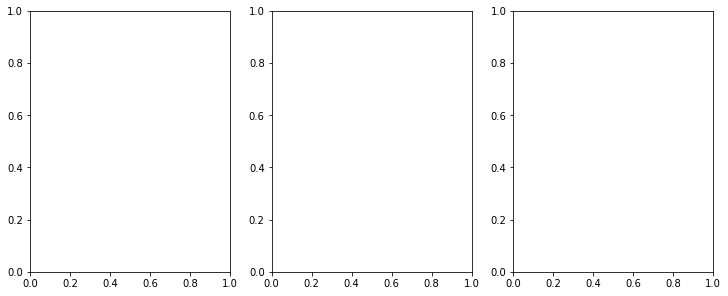

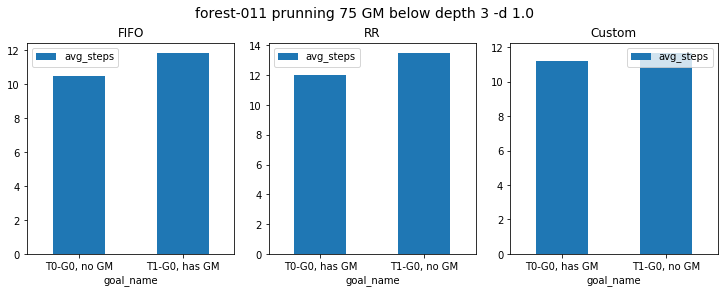

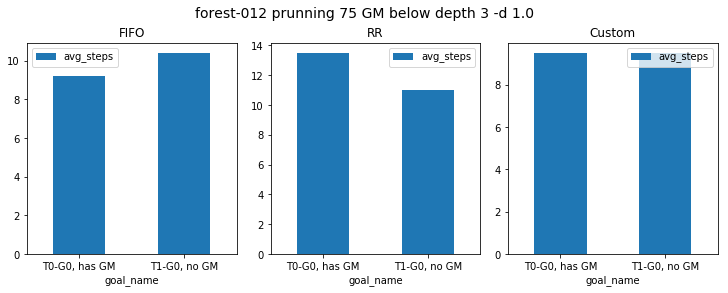

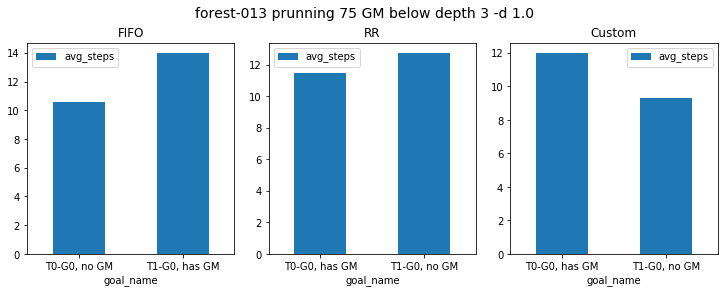

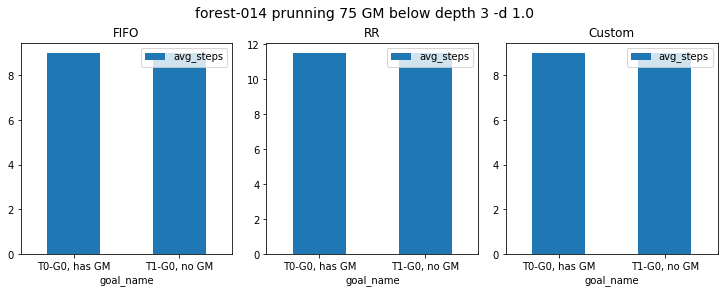

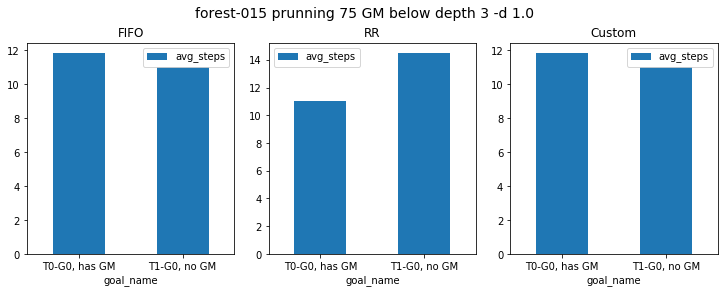

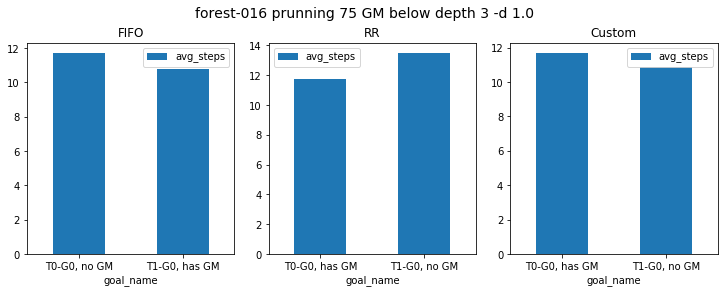

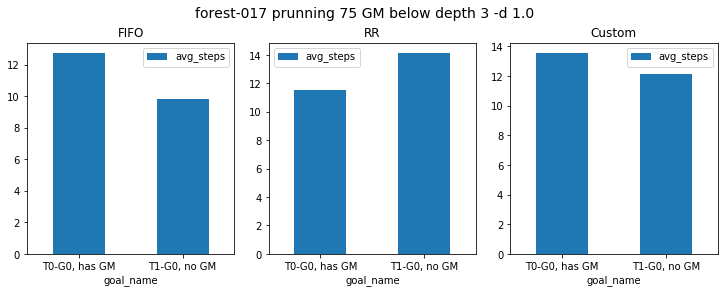

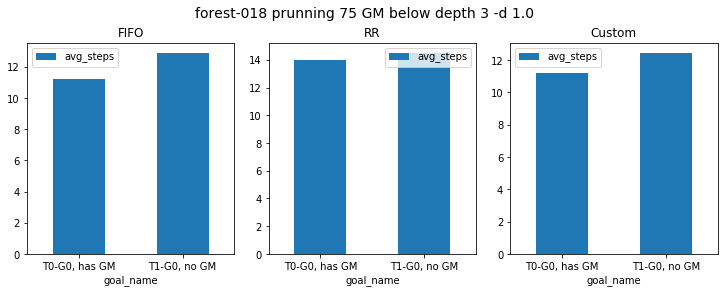

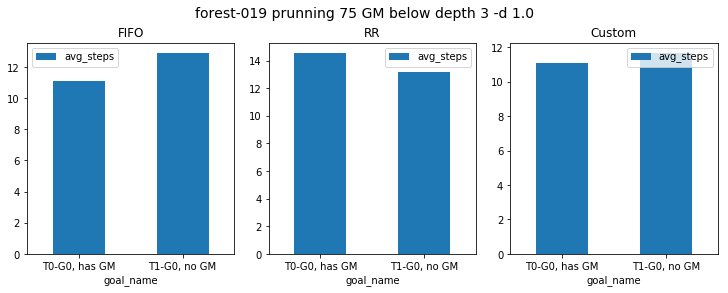

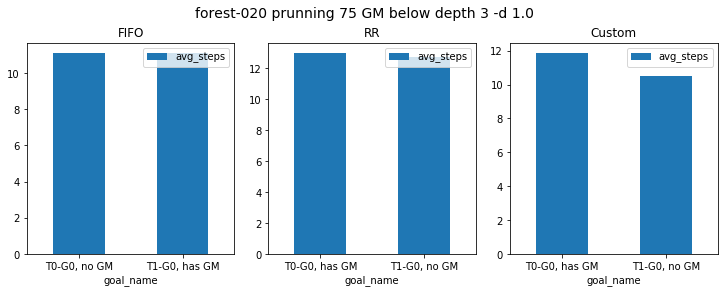

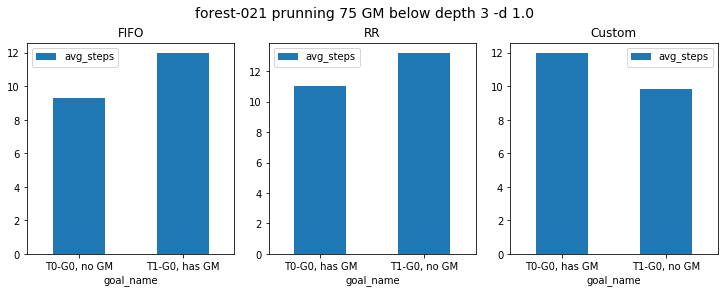

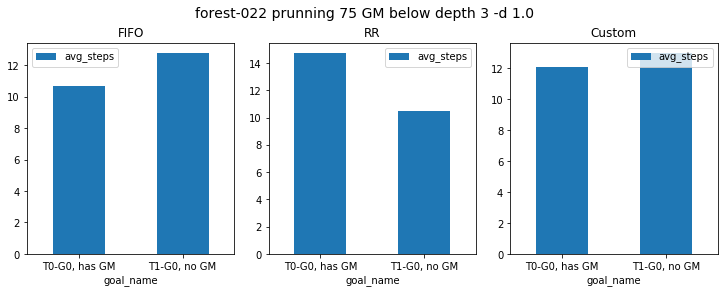

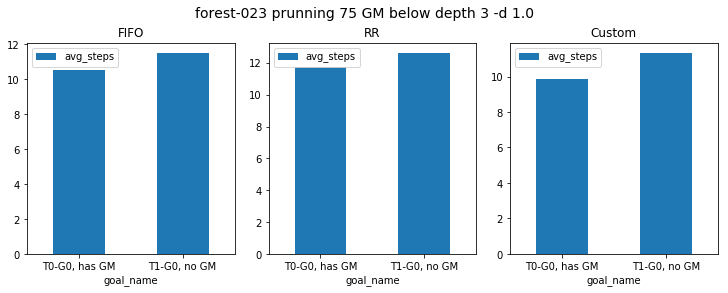

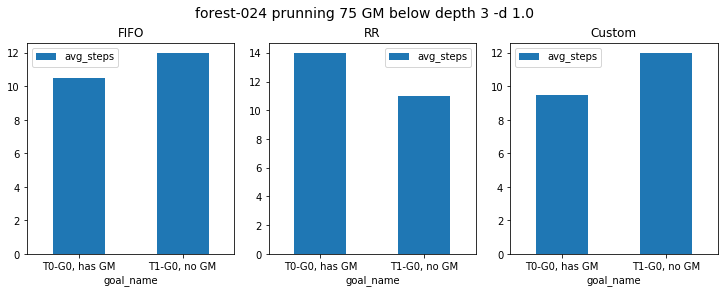

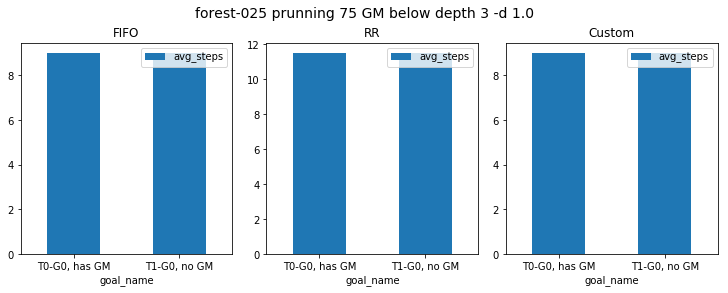

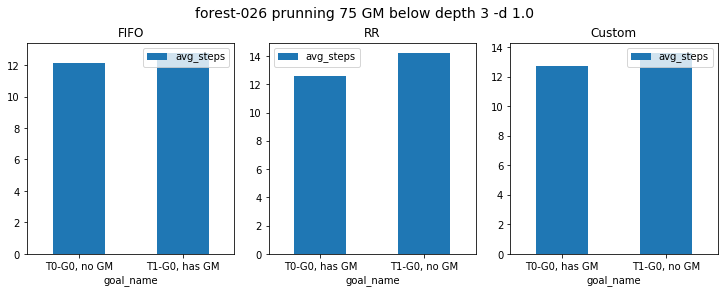

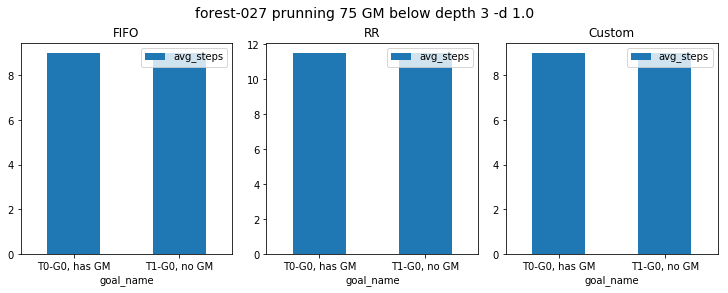

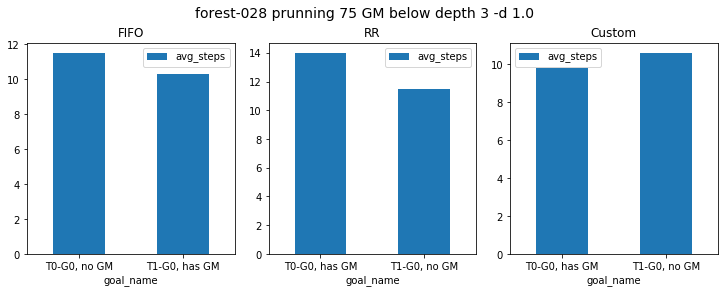

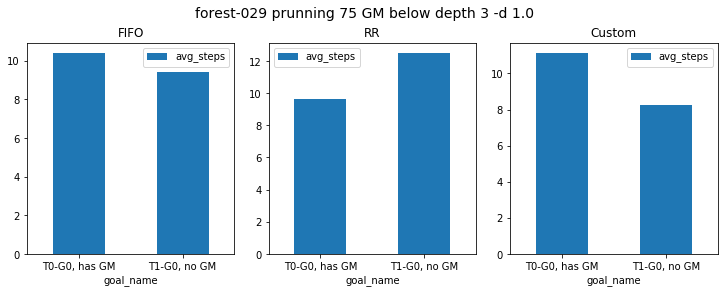

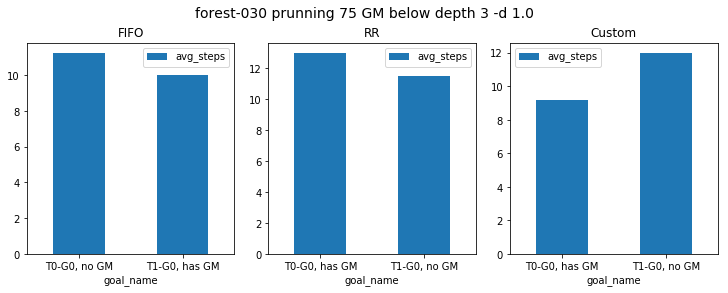

In [166]:
plot_many4(df75bellow_01_ff, df75bellow_01_rr, df75bellow_01_cus,"FIFO", "RR", "Custom", "below75", "prunning 75 GM below depth 3 -d 1.0")

IndexError: list index out of range

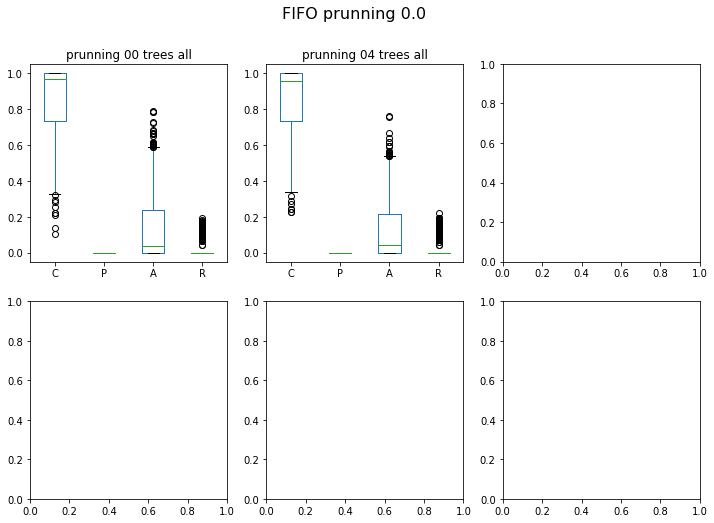

In [36]:
plot_all([df00_all ,df04_all], \
             ['prunning 00 trees all', 'prunning 04 trees all'], "FIFO prunning 0.0")

In [155]:
df75bellow_01_cus['avg_steps'].mean()

10.906692206261171

In [ ]:
df04_all['completed'].mean()

In [ ]:
df00_all['active'].mean()

In [ ]:
df04_all['active'].mean()

In [ ]:
df00_all['failed_by_retries'].mean()

In [ ]:
df04_all['failed_by_retries'].mean()

In [ ]:
plot_all([df00_ff ,df04_ff], \
             ['prunning 00 fifo all depth', 'prunning 04 fifo all depth'], "FIFO prunning 0.0")

In [ ]:
plot_all([df00_rr ,df04_rr], \
             ['prunning 00 rr all depth', 'prunning 04 rr all depth'], "FIFO prunning 0.0")